In [ ]:
## this notebook had a run total run time of 12 hours on a laptop (8th gen i5, 8gb ram, 4gb graphics card) 

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import time

In [2]:
os.getcwd()

'C:\\Users\\Anmol\\Downloads\\DS Files\\Capstone Project\\Project Work\\Notes 2\\Model Building\\Final Models'

In [3]:
os.chdir('C:\\Users\\Anmol\\Downloads\\DS Files\\Capstone Project\\Project Work\\Notes 2\\')

In [4]:
data = pd.read_excel('E_Commerce_Dataset.xlsx', sheet_name='E Comm')
data.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

# 1(a). EDA and Data Pre-Preprocessing

In [5]:
data.shape

(5630, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
CustomerID                     5630 non-null int64
Churn                          5630 non-null int64
Tenure                         5366 non-null float64
PreferredLoginDevice           5630 non-null object
CityTier                       5630 non-null int64
WarehouseToHome                5379 non-null float64
PreferredPaymentMode           5630 non-null object
Gender                         5630 non-null object
HourSpendOnApp                 5375 non-null float64
NumberOfDeviceRegistered       5630 non-null int64
PreferedOrderCat               5630 non-null object
SatisfactionScore              5630 non-null int64
MaritalStatus                  5630 non-null object
NumberOfAddress                5630 non-null int64
Complain                       5630 non-null int64
OrderAmountHikeFromlastYear    5365 non-null float64
CouponUsed                     5374 non-null float64
OrderCount 

In [7]:
data.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [8]:
data.drop('CustomerID', axis=1, inplace=True)

In [9]:
cat =[]
num =[]

for i in data.columns:
    if data[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [10]:
print('cat = ' + str(cat))
print('num = ' + str(num))

cat = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num = ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [11]:
data = data[['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus','Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]

In [12]:
data.head()

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0         Mobile Phone           Debit Card  Female  Laptop & Accessory   
1                Phone                  UPI    Male              Mobile   
2                Phone           Debit Card    Male              Mobile   
3                Phone           Debit Card    Male  Laptop & Accessory   
4                Phone                   CC    Male              Mobile   

  MaritalStatus  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0        Single      1     4.0         3              6.0             3.0   
1        Single      1     NaN         1              8.0             3.0   
2        Single      1     NaN         1             30.0             2.0   
3        Single      1     0.0         3             15.0             2.0   
4        Single      1     0.0         1             12.0             NaN   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                         11.0         1.0         1.0                5.0   
1                         15.0         0.0         1.0                0.0   
2                         14.0         0.0         1.0                3.0   
3                         23.0         0.0         1.0                3.0   
4                         11.0         1.0         1.0                3.0   

   CashbackAmount  
0          159.93  
1          120.90  
2          120.28  
3          134.07  
4          129.60

In [13]:
data.isnull().sum()

PreferredLoginDevice             0
PreferredPaymentMode             0
Gender                           0
PreferedOrderCat                 0
MaritalStatus                    0
Churn                            0
Tenure                         264
CityTier                         0
WarehouseToHome                251
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
SatisfactionScore                0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)

In [15]:
imputer = imputer.fit(data.iloc[:, 5:19])
data.iloc[:, 5:19] = imputer.transform(data.iloc[:, 5:19])

In [16]:
data.isnull().sum()

PreferredLoginDevice           0
PreferredPaymentMode           0
Gender                         0
PreferedOrderCat               0
MaritalStatus                  0
Churn                          0
Tenure                         0
CityTier                       0
WarehouseToHome                0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
SatisfactionScore              0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [17]:
for i in data.columns:
    if data[i].dtype =='object':
        print(i.upper(), ': ', data[i].nunique())
        print(data[i].value_counts().sort_values())
        print('\n')

PREFERREDLOGINDEVICE :  3
Phone           1231
Computer        1634
Mobile Phone    2765
Name: PreferredLoginDevice, dtype: int64


PREFERREDPAYMENTMODE :  7
Cash on Delivery     149
CC                   273
COD                  365
UPI                  414
E wallet             614
Credit Card         1501
Debit Card          2314
Name: PreferredPaymentMode, dtype: int64


GENDER :  2
Female    2246
Male      3384
Name: Gender, dtype: int64


PREFEREDORDERCAT :  6
Others                 264
Grocery                410
Mobile                 809
Fashion                826
Mobile Phone          1271
Laptop & Accessory    2050
Name: PreferedOrderCat, dtype: int64


MARITALSTATUS :  3
Divorced     848
Single      1796
Married     2986
Name: MaritalStatus, dtype: int64




In [18]:
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace({'Mobile Phone':'Phone'})
data['PreferredLoginDevice'].value_counts().sort_values()

Computer    1634
Phone       3996
Name: PreferredLoginDevice, dtype: int64

In [19]:
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace({'Cash on Delivery':'COD', 'Credit Card':'CC', 'E wallet':'UPI', 'Debit Card':'DD'})
data['PreferredPaymentMode'].value_counts().sort_values()

COD     514
UPI    1028
CC     1774
DD     2314
Name: PreferredPaymentMode, dtype: int64

In [20]:
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace({'Mobile Phone':'Mobile', 'Laptop & Accessory':'Laptop'})
data['PreferedOrderCat'].value_counts().sort_values()

Others      264
Grocery     410
Fashion     826
Laptop     2050
Mobile     2080
Name: PreferedOrderCat, dtype: int64

### (b)Data Encoding

In [21]:
data = pd.get_dummies(data, drop_first=True)

In [22]:
data.head()

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    1.0     4.0       3.0              6.0             3.0   
1    1.0     9.0       1.0              8.0             3.0   
2    1.0     9.0       1.0             30.0             2.0   
3    1.0     0.0       3.0             15.0             2.0   
4    1.0     0.0       1.0             12.0             3.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                       3.0                2.0              9.0       1.0   
1                       4.0                3.0              7.0       1.0   
2                       4.0                3.0              6.0       1.0   
3                       4.0                5.0              8.0       0.0   
4                       3.0                5.0              3.0       0.0   

   OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_COD  \
0                         11.0  ...                         0   
1                         15.0  ...                         0   
2                         14.0  ...                         0   
3                         23.0  ...                         0   
4                         11.0  ...                         0   

   PreferredPaymentMode_DD  PreferredPaymentMode_UPI  Gender_Male  \
0                        1                         0            0   
1                        0                         1            1   
2                        1                         0            1   
3                        1                         0            1   
4                        0                         0            1   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop  PreferedOrderCat_Mobile  \
0                         0                        1                        0   
1                         0                        0                        1   
2                         0                        0                        1   
3                         0                        1                        0   
4                         0                        0                        1   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  
0                        0                      0                     1  
1                        0                      0                     1  
2                        0                      0                     1  
3                        0                      0                     1  
4                        0                      0                     1  

[5 rows x 25 columns]

In [23]:
data.shape

(5630, 25)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 25 columns):
Churn                          5630 non-null float64
Tenure                         5630 non-null float64
CityTier                       5630 non-null float64
WarehouseToHome                5630 non-null float64
HourSpendOnApp                 5630 non-null float64
NumberOfDeviceRegistered       5630 non-null float64
SatisfactionScore              5630 non-null float64
NumberOfAddress                5630 non-null float64
Complain                       5630 non-null float64
OrderAmountHikeFromlastYear    5630 non-null float64
CouponUsed                     5630 non-null float64
OrderCount                     5630 non-null float64
DaySinceLastOrder              5630 non-null float64
CashbackAmount                 5630 non-null float64
PreferredLoginDevice_Phone     5630 non-null uint8
PreferredPaymentMode_COD       5630 non-null uint8
PreferredPaymentMode_DD        5630 non-null uint

### (c)Outlier Treatment

[Text(0, 0, 'Churn'),
 Text(0, 0, 'Tenure'),
 Text(0, 0, 'CityTier'),
 Text(0, 0, 'WarehouseToHome'),
 Text(0, 0, 'HourSpendOnApp'),
 Text(0, 0, 'NumberOfDeviceRegistered'),
 Text(0, 0, 'SatisfactionScore'),
 Text(0, 0, 'NumberOfAddress'),
 Text(0, 0, 'Complain'),
 Text(0, 0, 'OrderAmountHikeFromlastYear'),
 Text(0, 0, 'CouponUsed'),
 Text(0, 0, 'OrderCount'),
 Text(0, 0, 'DaySinceLastOrder'),
 Text(0, 0, 'CashbackAmount')]

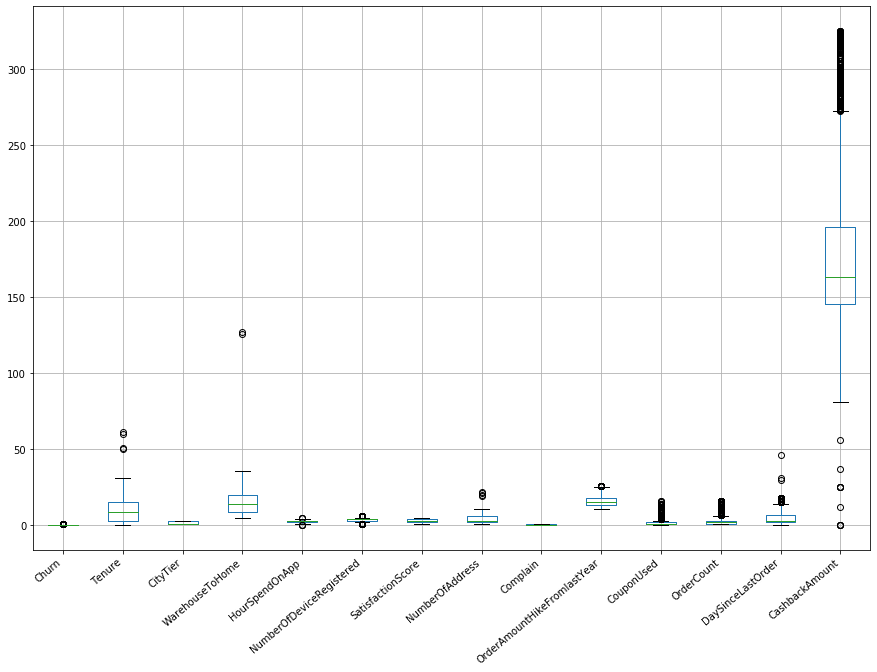

In [25]:
plt.figure(figsize=(15,10))
a = data[num].boxplot()
a.set_xticklabels(a.get_xticklabels() ,rotation=40, ha="right")

In [26]:
num

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [27]:
cols = {'Churn','CityTier','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','Complain'}

In [28]:
num1 = [ele for ele in num if ele not in cols]
print(num1)

['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


[Text(0, 0, 'Tenure'),
 Text(0, 0, 'WarehouseToHome'),
 Text(0, 0, 'NumberOfAddress'),
 Text(0, 0, 'OrderAmountHikeFromlastYear'),
 Text(0, 0, 'CouponUsed'),
 Text(0, 0, 'OrderCount'),
 Text(0, 0, 'DaySinceLastOrder'),
 Text(0, 0, 'CashbackAmount')]

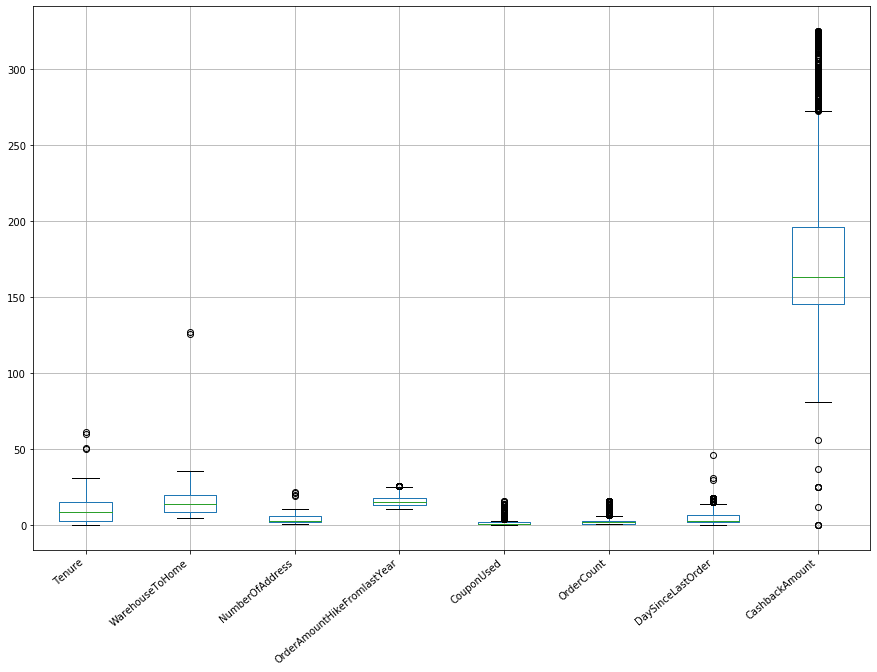

In [29]:
plt.figure(figsize=(15,10))
a = data[num1].boxplot()
a.set_xticklabels(a.get_xticklabels() ,rotation=40, ha="right")

In [30]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR) 
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [31]:
for column in data[num1].columns:
    lr,ur=remove_outliers(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

[Text(0, 0, 'Tenure'),
 Text(0, 0, 'WarehouseToHome'),
 Text(0, 0, 'NumberOfAddress'),
 Text(0, 0, 'OrderAmountHikeFromlastYear'),
 Text(0, 0, 'CouponUsed'),
 Text(0, 0, 'OrderCount'),
 Text(0, 0, 'DaySinceLastOrder'),
 Text(0, 0, 'CashbackAmount')]

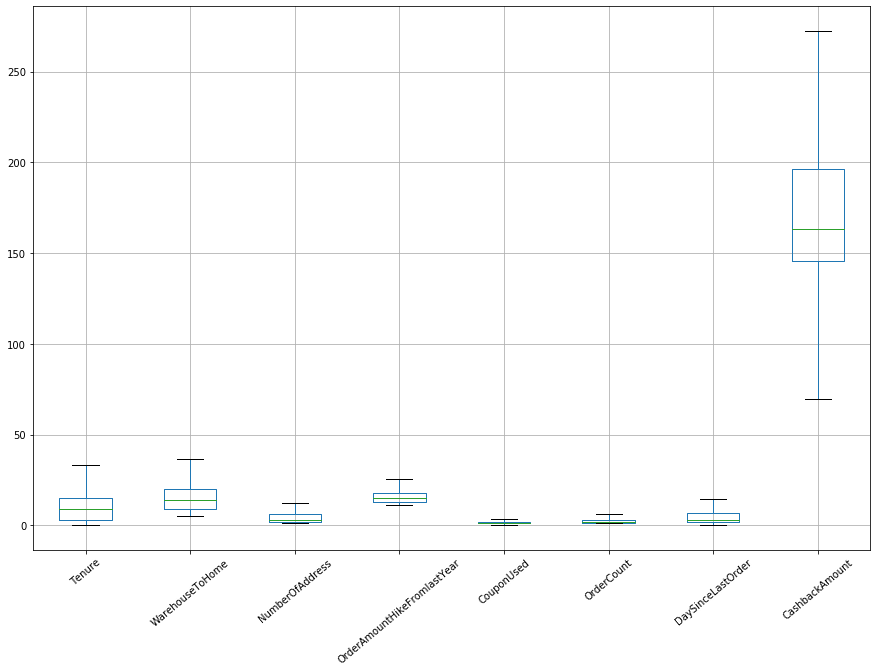

In [32]:
plt.figure(figsize=(15,10))
a = data[num1].boxplot()
a.set_xticklabels(a.get_xticklabels(), rotation=40)

### (d)Scaling (Standard Scaling) 

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
df1 = scaler.fit_transform(data)
df1

array([[ 2.22234528, -0.73795855,  1.46977096, ..., -0.22180771,
        -1.06270855,  1.46107627],
       [ 2.22234528, -0.1348657 , -0.71528595, ..., -0.22180771,
        -1.06270855,  1.46107627],
       [ 2.22234528, -0.1348657 , -0.71528595, ..., -0.22180771,
        -1.06270855,  1.46107627],
       ...,
       [-0.44997508, -1.09981425, -0.71528595, ..., -0.22180771,
         0.94099177, -0.68442697],
       [-0.44997508,  1.55379427,  1.46977096, ..., -0.22180771,
         0.94099177, -0.68442697],
       [-0.44997508, -0.25548427, -0.71528595, ..., -0.22180771,
         0.94099177, -0.68442697]])

In [35]:
df1 = pd.DataFrame(df1, columns= data.columns, index = data.index)
df1.head()

Churn    Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0  2.222345 -0.737959  1.469771        -1.178795        0.092654   
1  2.222345 -0.134866 -0.715286        -0.931534        0.092654   
2  2.222345 -0.134866 -0.715286         1.788340       -1.324850   
3  2.222345 -1.220433  1.469771        -0.066119       -1.324850   
4  2.222345 -1.220433 -0.715286        -0.437011        0.092654   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                  -0.67290          -0.772992         1.875626  1.584290   
1                   0.30375          -0.048392         1.092812  1.584290   
2                   0.30375          -0.048392         0.701405  1.584290   
3                   0.30375           1.400807         1.484219 -0.631198   
4                  -0.67290           1.400807        -0.472817 -0.631198   

   OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_COD  \
0                    -1.304023  ...                 -0.316969   
1                    -0.187486  ...                 -0.316969   
2                    -0.466620  ...                 -0.316969   
3                     2.045589  ...                 -0.316969   
4                    -1.304023  ...                 -0.316969   

   PreferredPaymentMode_DD  PreferredPaymentMode_UPI  Gender_Male  \
0                 1.197087                 -0.472632    -1.227468   
1                -0.835361                  2.115810     0.814685   
2                 1.197087                 -0.472632     0.814685   
3                 1.197087                 -0.472632     0.814685   
4                -0.835361                 -0.472632     0.814685   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop  PreferedOrderCat_Mobile  \
0                 -0.280257                 1.321492                -0.765451   
1                 -0.280257                -0.756720                 1.306419   
2                 -0.280257                -0.756720                 1.306419   
3                 -0.280257                 1.321492                -0.765451   
4                 -0.280257                -0.756720                 1.306419   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  
0                -0.221808              -1.062709              1.461076  
1                -0.221808              -1.062709              1.461076  
2                -0.221808              -1.062709              1.461076  
3                -0.221808              -1.062709              1.461076  
4                -0.221808              -1.062709              1.461076  

[5 rows x 25 columns]

### (e)K-Means Clustering

In [36]:
from sklearn.cluster import KMeans 

In [37]:
wss = []

for i in range(1,8):
    KM = KMeans(n_clusters=i)
    KM.fit(df1)
    wss.append(KM.inertia_)

In [38]:
wss

[140750.00000000015,
 128172.2996167351,
 118920.65167677902,
 113529.43890330866,
 107453.0625020049,
 103324.6460873133,
 99883.8932523023]

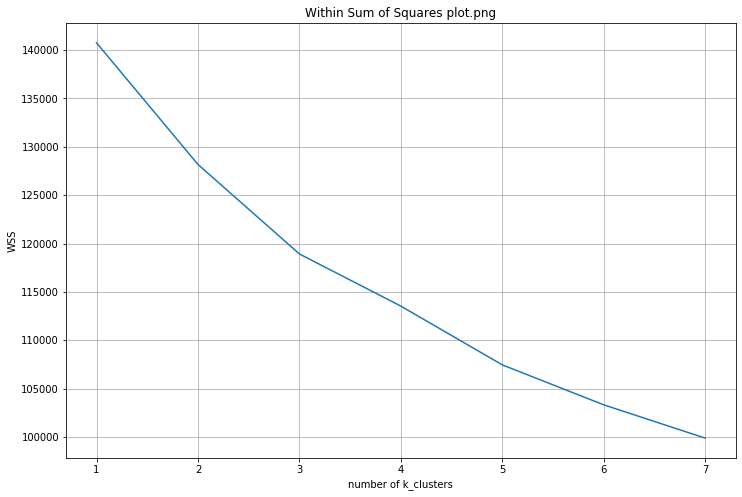

In [39]:
plt.figure(figsize=(12,8))
plt.plot(range(1,8), wss)
plt.title('Within Sum of Squares plot.png')
plt.grid()
#plt.savefig('q1_Within Sum of Squares plot.jpg')
plt.ylabel('WSS')
plt.xlabel('number of k_clusters')
plt.show()

In [40]:
#Performing k-means with 2 clusters
KM = KMeans(n_clusters=2, random_state=1)
KM.fit(df1)

KMeans(n_clusters=2, random_state=1)

In [41]:
labels1 = KM.labels_
labels1

array([1, 0, 0, ..., 1, 1, 1])

### (f)PAM Clustering

In [42]:
from sklearn_extra.cluster import KMedoids
km = KMedoids()

km = KMedoids(n_clusters=2, random_state=0, metric='cityblock' )
km.fit(df1)

KMedoids(metric='cityblock', n_clusters=2, random_state=0)

In [43]:
labels2 = km.fit_predict(df1)
labels2

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
km.inertia_

91663.18365294905

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score

print(silhouette_score(df1, labels2))
print(silhouette_samples(df1, labels2).min())

0.06867201706244075
-0.14567001710507335


In [46]:
df2 = data.copy()

In [47]:
df2['K_Means_clust'] = labels1
df2['PAM_clust'] = labels2

In [48]:
df2.head()

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    1.0     4.0       3.0              6.0             3.0   
1    1.0     9.0       1.0              8.0             3.0   
2    1.0     9.0       1.0             30.0             2.0   
3    1.0     0.0       3.0             15.0             2.0   
4    1.0     0.0       1.0             12.0             3.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                       3.0                2.0              9.0       1.0   
1                       4.0                3.0              7.0       1.0   
2                       4.0                3.0              6.0       1.0   
3                       4.0                5.0              8.0       0.0   
4                       3.0                5.0              3.0       0.0   

   OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_UPI  Gender_Male  \
0                         11.0  ...                         0            0   
1                         15.0  ...                         1            1   
2                         14.0  ...                         0            1   
3                         23.0  ...                         0            1   
4                         11.0  ...                         0            1   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop  PreferedOrderCat_Mobile  \
0                         0                        1                        0   
1                         0                        0                        1   
2                         0                        0                        1   
3                         0                        1                        0   
4                         0                        0                        1   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  \
0                        0                      0                     1   
1                        0                      0                     1   
2                        0                      0                     1   
3                        0                      0                     1   
4                        0                      0                     1   

   K_Means_clust  PAM_clust  
0              1          0  
1              0          1  
2              0          1  
3              1          0  
4              0          1  

[5 rows x 27 columns]

In [49]:
df1['K_Means_clust'] = labels1
df1['PAM_clust'] = labels2

### (g)HeatMap

Text(0.5, 1, 'Heatmap with Lower Diagnal')

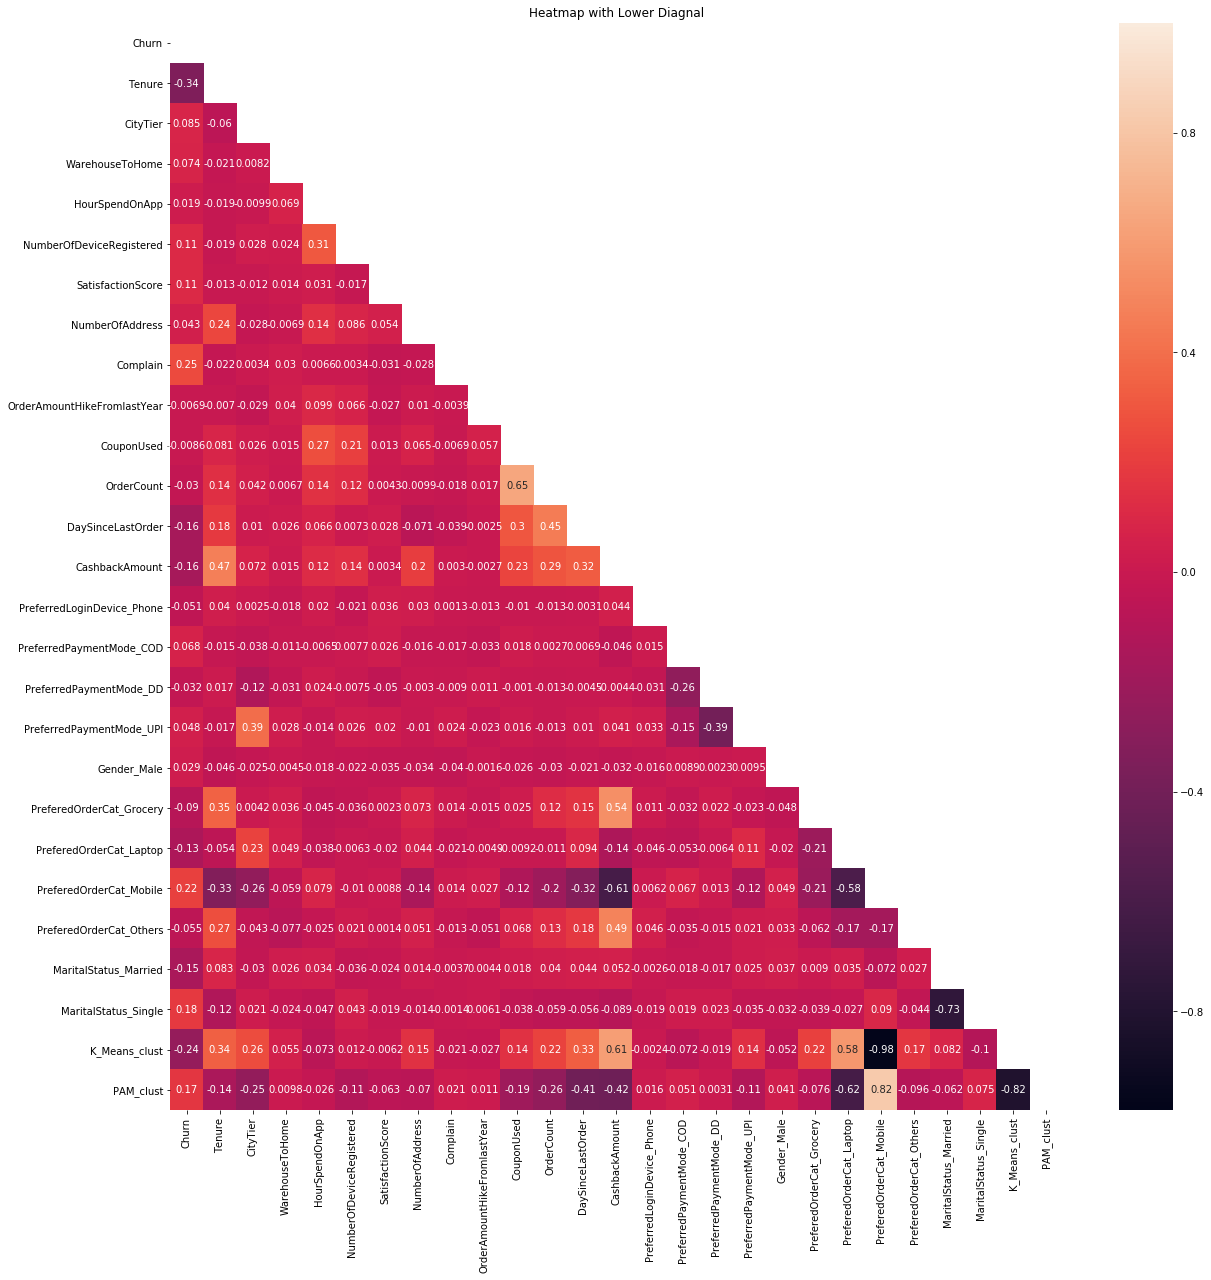

In [50]:
plt.figure(figsize=(20,20))

corr1= df2.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr1)
# using the upper triangle matrix as mask 
sns.heatmap(corr1, annot=True, mask=matrix)

plt.title('Heatmap with Lower Diagnal')

### (h)Multi-Collinearity Check

In [51]:
DATA = df1.copy()
X = DATA.drop('Churn', axis=1)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

In [54]:
vif_data.sort_values(by='VIF', ascending=False)

feature        VIF
20      PreferedOrderCat_Mobile  13.674480
12               CashbackAmount   8.195093
25                    PAM_clust   7.273441
24                K_Means_clust   6.523002
19      PreferedOrderCat_Laptop   4.319426
18     PreferedOrderCat_Grocery   2.246283
23         MaritalStatus_Single   2.160699
22        MaritalStatus_Married   2.138701
21      PreferedOrderCat_Others   2.071346
10                   OrderCount   2.048333
9                    CouponUsed   1.904216
11            DaySinceLastOrder   1.555322
16     PreferredPaymentMode_UPI   1.521714
0                        Tenure   1.466378
3                HourSpendOnApp   1.376756
15      PreferredPaymentMode_DD   1.371124
1                      CityTier   1.308368
4      NumberOfDeviceRegistered   1.214399
14     PreferredPaymentMode_COD   1.187423
6               NumberOfAddress   1.157783
2               WarehouseToHome   1.045454
5             SatisfactionScore   1.038986
8   OrderAmountHikeFromlastYear   1.022243
17                  Gender_Male   1.014671
13   PreferredLoginDevice_Phone   1.011685
7                      Complain   1.008676

# 2.Train Test Splitting and Scaling

In [55]:
# data.to_csv('churn_base.csv', index=False)
# df2.to_csv('churn_clustered.csv', index=False)

In [56]:
data = pd.read_csv('churn_base.csv')
data.head()

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    1.0     4.0       3.0              6.0             3.0   
1    1.0     9.0       1.0              8.0             3.0   
2    1.0     9.0       1.0             30.0             2.0   
3    1.0     0.0       3.0             15.0             2.0   
4    1.0     0.0       1.0             12.0             3.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                       3.0                2.0              9.0       1.0   
1                       4.0                3.0              7.0       1.0   
2                       4.0                3.0              6.0       1.0   
3                       4.0                5.0              8.0       0.0   
4                       3.0                5.0              3.0       0.0   

   OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_COD  \
0                         11.0  ...                         0   
1                         15.0  ...                         0   
2                         14.0  ...                         0   
3                         23.0  ...                         0   
4                         11.0  ...                         0   

   PreferredPaymentMode_DD  PreferredPaymentMode_UPI  Gender_Male  \
0                        1                         0            0   
1                        0                         1            1   
2                        1                         0            1   
3                        1                         0            1   
4                        0                         0            1   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop  PreferedOrderCat_Mobile  \
0                         0                        1                        0   
1                         0                        0                        1   
2                         0                        0                        1   
3                         0                        1                        0   
4                         0                        0                        1   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  
0                        0                      0                     1  
1                        0                      0                     1  
2                        0                      0                     1  
3                        0                      0                     1  
4                        0                      0                     1  

[5 rows x 25 columns]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [58]:
X= data.drop('Churn', axis=1)
y= data['Churn']

In [59]:
#scaling the independent features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.73795855,  1.46977096, -1.17879509, ..., -0.22180771,
        -1.06270855,  1.46107627],
       [-0.1348657 , -0.71528595, -0.93153381, ..., -0.22180771,
        -1.06270855,  1.46107627],
       [-0.1348657 , -0.71528595,  1.78834025, ..., -0.22180771,
        -1.06270855,  1.46107627],
       ...,
       [-1.09981425, -0.71528595, -0.56064189, ..., -0.22180771,
         0.94099177, -0.68442697],
       [ 1.55379427,  1.46977096, -0.80790317, ..., -0.22180771,
         0.94099177, -0.68442697],
       [-0.25548427, -0.71528595, -0.06611933, ..., -0.22180771,
         0.94099177, -0.68442697]])

In [60]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled.head()

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0 -0.737959  1.469771        -1.178795        0.092654   
1 -0.134866 -0.715286        -0.931534        0.092654   
2 -0.134866 -0.715286         1.788340       -1.324850   
3 -1.220433  1.469771        -0.066119       -1.324850   
4 -1.220433 -0.715286        -0.437011        0.092654   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                  -0.67290          -0.772992         1.875626  1.584290   
1                   0.30375          -0.048392         1.092812  1.584290   
2                   0.30375          -0.048392         0.701405  1.584290   
3                   0.30375           1.400807         1.484219 -0.631198   
4                  -0.67290           1.400807        -0.472817 -0.631198   

   OrderAmountHikeFromlastYear  CouponUsed  ...  PreferredPaymentMode_COD  \
0                    -1.304023   -0.411136  ...                 -0.316969   
1                    -0.187486   -1.344668  ...                 -0.316969   
2                    -0.466620   -1.344668  ...                 -0.316969   
3                     2.045589   -1.344668  ...                 -0.316969   
4                    -1.304023   -0.411136  ...                 -0.316969   

   PreferredPaymentMode_DD  PreferredPaymentMode_UPI  Gender_Male  \
0                 1.197087                 -0.472632    -1.227468   
1                -0.835361                  2.115810     0.814685   
2                 1.197087                 -0.472632     0.814685   
3                 1.197087                 -0.472632     0.814685   
4                -0.835361                 -0.472632     0.814685   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop  PreferedOrderCat_Mobile  \
0                 -0.280257                 1.321492                -0.765451   
1                 -0.280257                -0.756720                 1.306419   
2                 -0.280257                -0.756720                 1.306419   
3                 -0.280257                 1.321492                -0.765451   
4                 -0.280257                -0.756720                 1.306419   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  
0                -0.221808              -1.062709              1.461076  
1                -0.221808              -1.062709              1.461076  
2                -0.221808              -1.062709              1.461076  
3                -0.221808              -1.062709              1.461076  
4                -0.221808              -1.062709              1.461076  

[5 rows x 24 columns]

In [61]:
# Concat clustered labels to Training dataset (feature Engineering)
X_scaled['K_Means_clust'] = labels1
X_scaled['PAM_clust'] = labels2

In [62]:
x = X_scaled.copy(deep=True)

In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 26 columns):
Tenure                         5630 non-null float64
CityTier                       5630 non-null float64
WarehouseToHome                5630 non-null float64
HourSpendOnApp                 5630 non-null float64
NumberOfDeviceRegistered       5630 non-null float64
SatisfactionScore              5630 non-null float64
NumberOfAddress                5630 non-null float64
Complain                       5630 non-null float64
OrderAmountHikeFromlastYear    5630 non-null float64
CouponUsed                     5630 non-null float64
OrderCount                     5630 non-null float64
DaySinceLastOrder              5630 non-null float64
CashbackAmount                 5630 non-null float64
PreferredLoginDevice_Phone     5630 non-null float64
PreferredPaymentMode_COD       5630 non-null float64
PreferredPaymentMode_DD        5630 non-null float64
PreferredPaymentMode_UPI       5630 non-null 

In [64]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.30, random_state=1, stratify=y)

# 3.LDA Model

## (a)Base LDA Model

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
mod1 = LinearDiscriminantAnalysis()
mod1.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [66]:
mod1.coef_

array([[-1.22367705e+00,  4.41017797e-01,  2.73888009e-01,
        -4.74954898e-02,  4.03241233e-01,  4.65938872e-01,
         5.91330197e-01,  9.80731615e-01,  2.03497023e-03,
        -2.25917833e-02,  3.34578008e-01, -2.66048257e-01,
        -5.25853945e-01, -1.66049919e-01,  2.59603243e-01,
         1.29999239e-01,  1.54965532e-01,  1.29748074e-01,
         2.56297168e-01, -5.17198635e-01, -2.14857592e+00,
         3.65637408e-01, -6.87067868e-02,  4.87743397e-01,
        -4.27725688e+00,  3.13067061e-01]])

In [67]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, mod1.coef_[0][idx]))

The coefficient for Tenure is -1.223677049375731
The coefficient for CityTier is 0.4410177967682534
The coefficient for WarehouseToHome is 0.27388800875991504
The coefficient for HourSpendOnApp is -0.047495489825034876
The coefficient for NumberOfDeviceRegistered is 0.4032412333700894
The coefficient for SatisfactionScore is 0.4659388716476946
The coefficient for NumberOfAddress is 0.5913301966642233
The coefficient for Complain is 0.9807316150183771
The coefficient for OrderAmountHikeFromlastYear is 0.0020349702325951685
The coefficient for CouponUsed is -0.022591783318600758
The coefficient for OrderCount is 0.3345780077556839
The coefficient for DaySinceLastOrder is -0.26604825688621453
The coefficient for CashbackAmount is -0.5258539446955993
The coefficient for PreferredLoginDevice_Phone is -0.16604991867931437
The coefficient for PreferredPaymentMode_COD is 0.25960324344184443
The coefficient for PreferredPaymentMode_DD is 0.12999923871628927
The coefficient for PreferredPaymentM

In [68]:
print('The intercept for the LDA model is %.3f' %mod1.intercept_)

The intercept for the LDA model is -0.129


In [69]:
train_pred_mod1 = mod1.predict(x_train)
test_pred_mod1 = mod1.predict(x_test)

### (b)Classification Report for Base LDA Model

In [71]:
#training dataset
print(classification_report(y_train, train_pred_mod1))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      3277
         1.0       0.76      0.51      0.61       664

    accuracy                           0.89      3941
   macro avg       0.84      0.74      0.77      3941
weighted avg       0.88      0.89      0.88      3941



In [79]:
#testing dataset
print(classification_report(y_test, test_pred_mod1))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1405
         1.0       0.74      0.46      0.57       284

    accuracy                           0.88      1689
   macro avg       0.82      0.72      0.75      1689
weighted avg       0.87      0.88      0.87      1689



### (c)Confusion Matrix for base LDA Model

Text(0.5, 1, 'confusion matrix for base LDA model on training data')

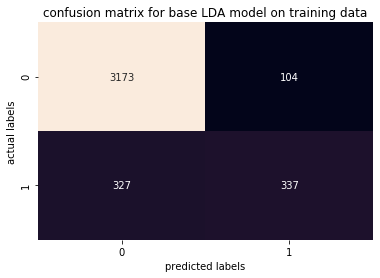

In [72]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod1), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base LDA model on training data')

Text(0.5, 1, 'confusion matrix for base LDA model on testing data')

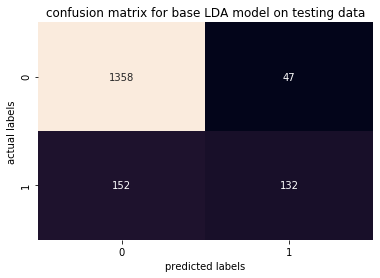

In [73]:
# testing data
sns.heatmap(confusion_matrix(y_test, test_pred_mod1), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base LDA model on testing data')

### (d)Model Score for base LDA Model

In [82]:
# training data
mod1.score(x_train, y_train)

0.890636894189292

In [83]:
# training data
mod1.score(x_train, y_train)

0.890636894189292

### (e)ROC- AUC-Score for base LDA Model

the auc score for mod1 on training dataset is: 0.895


Text(0.5, 1.0, 'ROC curve for base LDA model on training data')

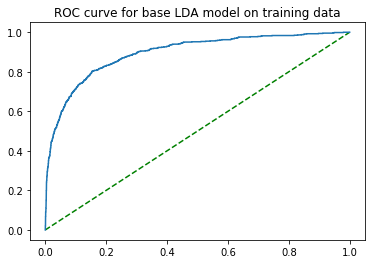

In [70]:
# training data
probs1 = mod1.predict_proba(x_train)
probs1 = probs1[:,1]

auc_score_mod1_train = roc_auc_score(y_train, probs1)
print('the auc score for mod1 on training dataset is: %.3f' %auc_score_mod1_train)

train_tpr_mod1, train_fpr_mod1, train_thresholds_mod1 = roc_curve(y_train,probs1)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod1, train_fpr_mod1)
plt.title('ROC curve for base LDA model on training data')

the auc score for mod1 on testing dataset is: 0.884


Text(0.5, 1.0, 'ROC curve for base LDA model on testing data')

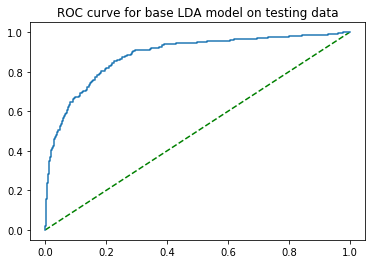

In [71]:
# testing dataset
probs2 = mod1.predict_proba(x_test)
probs2 = probs2[:,1]

auc_score_mod1_test = roc_auc_score(y_test, probs2)
print('the auc score for mod1 on testing dataset is: %.3f' %auc_score_mod1_test)

test_tpr_mod1, test_fpr_mod1, test_thresholds_mod1 = roc_curve(y_test,probs2)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod1, test_fpr_mod1)
plt.title('ROC curve for base LDA model on testing data')

## (f)Tuned LDA Model

In [75]:
from sklearn.model_selection import GridSearchCV

params = {
    'solver' : ['svd', 'lsqr', 'eigen'],
    'tol' : [0.001,0.0001,0.00001]
}
lda_model =  LinearDiscriminantAnalysis()
grid = GridSearchCV(estimator = lda_model, param_grid=params, cv=5, scoring='recall', verbose=3)

In [76]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........................solver=svd, tol=0.001; total time=   0.0s
[CV 2/5] END ..........................solver=svd, tol=0.001; total time=   0.0s
[CV 3/5] END ..........................solver=svd, tol=0.001; total time=   0.0s
[CV 4/5] END ..........................solver=svd, tol=0.001; total time=   0.0s
[CV 5/5] END ..........................solver=svd, tol=0.001; total time=   0.0s
[CV 1/5] END .........................solver=svd, tol=0.0001; total time=   0.0s
[CV 2/5] END .........................solver=svd, tol=0.0001; total time=   0.0s
[CV 3/5] END .........................solver=svd, tol=0.0001; total time=   0.0s
[CV 4/5] END .........................solver=svd, tol=0.0001; total time=   0.0s
[CV 5/5] END .........................solver=svd, tol=0.0001; total time=   0.0s
[CV 1/5] END ..........................solver=svd, tol=1e-05; total time=   0.0s
[CV 2/5] END ..........................solver=svd

In [77]:
print('the time for algo execution is: {}'.format(end-start))

the time for algo execution is: 3.9836323261260986


In [78]:
grid.best_params_

{'solver': 'svd', 'tol': 0.001}

In [79]:
grid.best_estimator_

LinearDiscriminantAnalysis(tol=0.001)

In [72]:
mod2 = LinearDiscriminantAnalysis(tol=0.001, solver='svd')
mod2.fit(x_train, y_train)

LinearDiscriminantAnalysis(tol=0.001)

In [73]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, mod2.coef_[0][idx]))

The coefficient for Tenure is -1.223677049375731
The coefficient for CityTier is 0.4410177967682534
The coefficient for WarehouseToHome is 0.27388800875991504
The coefficient for HourSpendOnApp is -0.047495489825034876
The coefficient for NumberOfDeviceRegistered is 0.4032412333700894
The coefficient for SatisfactionScore is 0.4659388716476946
The coefficient for NumberOfAddress is 0.5913301966642233
The coefficient for Complain is 0.9807316150183771
The coefficient for OrderAmountHikeFromlastYear is 0.0020349702325951685
The coefficient for CouponUsed is -0.022591783318600758
The coefficient for OrderCount is 0.3345780077556839
The coefficient for DaySinceLastOrder is -0.26604825688621453
The coefficient for CashbackAmount is -0.5258539446955993
The coefficient for PreferredLoginDevice_Phone is -0.16604991867931437
The coefficient for PreferredPaymentMode_COD is 0.25960324344184443
The coefficient for PreferredPaymentMode_DD is 0.12999923871628927
The coefficient for PreferredPaymentM

In [74]:
print('The intercept for the LDA model is %.3f' %mod1.intercept_)

The intercept for the LDA model is -0.129


In [75]:
train_pred_mod2 = mod2.predict(x_train)
test_pred_mod2 = mod2.predict(x_test)

### (g)Classification Report for Tuned LDA Model

In [82]:
# training data
print(classification_report(y_train, train_pred_mod2))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      3277
         1.0       0.76      0.51      0.61       664

    accuracy                           0.89      3941
   macro avg       0.84      0.74      0.77      3941
weighted avg       0.88      0.89      0.88      3941



In [83]:
# testing data
print(classification_report(y_test, test_pred_mod2))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1405
         1.0       0.74      0.46      0.57       284

    accuracy                           0.88      1689
   macro avg       0.82      0.72      0.75      1689
weighted avg       0.87      0.88      0.87      1689



### (h)Confusion Matrix for Tuned LDA Model

Text(0.5, 1, 'confusion matrix for tuned LDA model on training data')

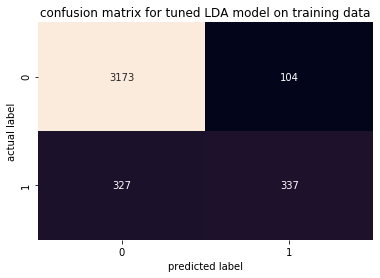

In [78]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod2), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned LDA model on training data')

Text(0.5, 1, 'confusion matrix for tuned LDA model on testing data')

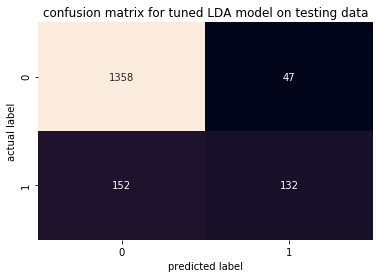

In [79]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod2), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned LDA model on testing data')

### (i)Model Score for Tuned LDA Model

In [86]:
# trianing dataset
mod2.score(x_train , y_train)

0.890636894189292

In [87]:
# testing dataset
mod2.score(x_test, y_test)

0.8821788040260509

### (j)ROC-AUC Score for Tuned LDA Model

the auc score for mod2 on training dataset is: 0.895


Text(0.5, 1.0, 'ROC curve for tuned LDA model on training data')

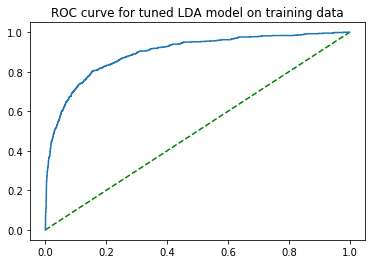

In [76]:
# training data
probs3 = mod2.predict_proba(x_train)
probs3 = probs3[:,1]

auc_score_mod2_train = roc_auc_score(y_train, probs3)
print('the auc score for mod2 on training dataset is: %.3f' %auc_score_mod2_train)

train_tpr_mod2, train_fpr_mod2, train_thresholds_mod2 = roc_curve(y_train, probs3)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod2, train_fpr_mod2)
plt.title('ROC curve for tuned LDA model on training data')

the auc score for mod2 on testing dataset is: 0.884


Text(0.5, 1.0, 'ROC curve for base tuned model on testing data')

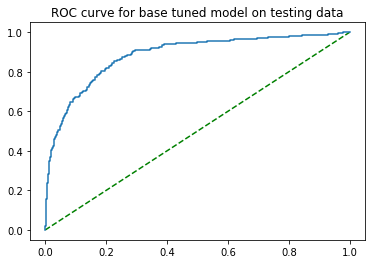

In [77]:
# testing dataset
probs4 = mod2.predict_proba(x_test)
probs4 = probs4[:,1]

auc_score_mod2_test = roc_auc_score(y_test, probs4)
print('the auc score for mod2 on testing dataset is: %.3f' %auc_score_mod2_test)

test_tpr_mod2, test_fpr_mod2, test_thresholds_mod2 = roc_curve(y_test, probs4)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod2, test_fpr_mod2)
plt.title('ROC curve for base tuned model on testing data')

# 4.Logistic Regression

## (a)Base Logistic Regression Model

In [78]:
from sklearn.linear_model import LogisticRegression

mod3 = LogisticRegression( max_iter=1000,random_state=1 )
mod3.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [79]:
train_pred_mod3 = mod3.predict(x_train)
test_pred_mod3 = mod3.predict(x_test)

### (b)Classification Report for Base Logistic Regression Model

In [92]:
#training dataset
print(classification_report(y_train, train_pred_mod3))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      3277
         1.0       0.78      0.53      0.63       664

    accuracy                           0.90      3941
   macro avg       0.84      0.75      0.79      3941
weighted avg       0.89      0.90      0.89      3941



In [93]:
#testing dataset
print(classification_report(y_test, test_pred_mod3))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1405
         1.0       0.76      0.50      0.60       284

    accuracy                           0.89      1689
   macro avg       0.83      0.73      0.77      1689
weighted avg       0.88      0.89      0.88      1689



### (c)Confusion Matrix for Base Logistic Regression Model

Text(0.5, 1, 'confusion matrix for base Logistic Regression model on training data')

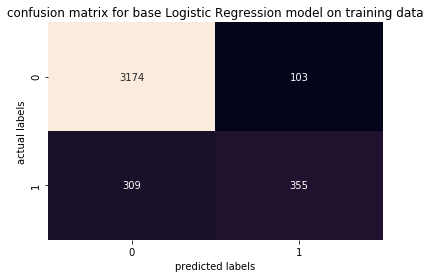

In [82]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod3), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base Logistic Regression model on training data')

Text(0.5, 1, 'confusion matrix for base Logistic Regression model on testing data')

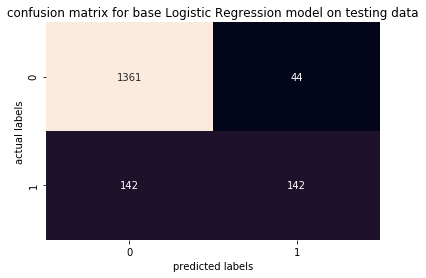

In [83]:
# testing data
sns.heatmap(confusion_matrix(y_test, test_pred_mod3), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base Logistic Regression model on testing data')

### (d)Model Score for Base Logistic Regression Model

In [96]:
# training data
mod3.score(x_train, y_train)

0.8954580055823395

In [97]:
# training data
mod3.score(x_train, y_train)

0.8954580055823395

### (e)ROC-AUC Score for Base Logistic Regression Model

the auc score for mod3 on training dataset is: 0.900


Text(0.5, 1.0, 'ROC curve for base Logistic Regression model on training data')

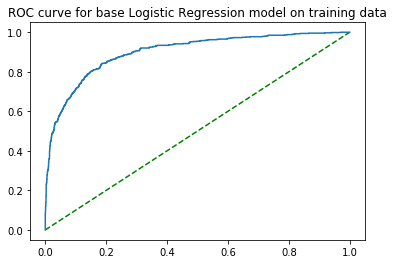

In [80]:
# training dataset
probs5 = mod3.predict_proba(x_train)
probs5 = probs5[:,1]

auc_score_mod3_train = roc_auc_score(y_train, probs5)
print('the auc score for mod3 on training dataset is: %.3f' %auc_score_mod3_train)

train_tpr_mod3, train_fpr_mod3, train_thresholds_mod3 = roc_curve(y_train,probs5)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod3, train_fpr_mod3)
plt.title('ROC curve for base Logistic Regression model on training data')

the auc score for mod3 on testing dataset is: 0.884


Text(0.5, 1.0, 'ROC curve for base Logistic Regression model on testing data')

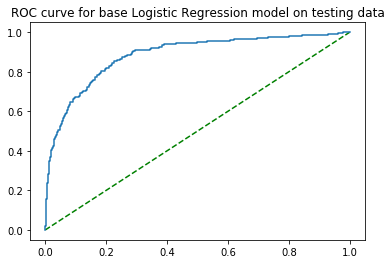

In [81]:
# testing dataset
probs6 = mod3.predict_proba(x_test)
probs6 = probs6[:,1]

auc_score_mod3_test = roc_auc_score(y_test, probs2)
print('the auc score for mod3 on testing dataset is: %.3f' %auc_score_mod3_test)

test_tpr_mod3, test_fpr_mod3, test_thresholds_mod3 = roc_curve(y_test,probs2)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod3, test_fpr_mod3)
plt.title('ROC curve for base Logistic Regression model on testing data')

## (f)Tuned Logistic Regression Model

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol' : [0.01,0.001,0.0001],
    #'penalty': ['l1', 'l2'],
    'max_iter': [1000, 10000],
    'C' : np.logspace(-4,4,10,20),
}
logit_model =  LogisticRegression(max_iter = 50000,random_state=1, class_weight='balanced')
grid = GridSearchCV(estimator = logit_model, param_grid=params, cv=5, scoring='recall', verbose=3)

In [101]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.01; total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.01; total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.01; total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.01; total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.01; total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.001; total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.001; total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.001; total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.001; total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.001; total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.0001; total time=  

[CV 3/5] END C=0.0001, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=10000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=10000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=10000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=10000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=10000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=10000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=10000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=10000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=10000, solver=liblinear, 

[CV 1/5] END C=0.000774263682681127, max_iter=1000, solver=sag, tol=0.01; total time=   0.0s
[CV 2/5] END C=0.000774263682681127, max_iter=1000, solver=sag, tol=0.01; total time=   0.0s
[CV 3/5] END C=0.000774263682681127, max_iter=1000, solver=sag, tol=0.01; total time=   0.0s
[CV 4/5] END C=0.000774263682681127, max_iter=1000, solver=sag, tol=0.01; total time=   0.0s
[CV 5/5] END C=0.000774263682681127, max_iter=1000, solver=sag, tol=0.01; total time=   0.0s
[CV 1/5] END C=0.000774263682681127, max_iter=1000, solver=sag, tol=0.001; total time=   0.0s
[CV 2/5] END C=0.000774263682681127, max_iter=1000, solver=sag, tol=0.001; total time=   0.0s
[CV 3/5] END C=0.000774263682681127, max_iter=1000, solver=sag, tol=0.001; total time=   0.0s
[CV 4/5] END C=0.000774263682681127, max_iter=1000, solver=sag, tol=0.001; total time=   0.0s
[CV 5/5] END C=0.000774263682681127, max_iter=1000, solver=sag, tol=0.001; total time=   0.0s
[CV 1/5] END C=0.000774263682681127, max_iter=1000, solver=sag, t

[CV 1/5] END C=0.000774263682681127, max_iter=10000, solver=sag, tol=0.0001; total time=   0.0s
[CV 2/5] END C=0.000774263682681127, max_iter=10000, solver=sag, tol=0.0001; total time=   0.0s
[CV 3/5] END C=0.000774263682681127, max_iter=10000, solver=sag, tol=0.0001; total time=   0.0s
[CV 4/5] END C=0.000774263682681127, max_iter=10000, solver=sag, tol=0.0001; total time=   0.0s
[CV 5/5] END C=0.000774263682681127, max_iter=10000, solver=sag, tol=0.0001; total time=   0.0s
[CV 1/5] END C=0.000774263682681127, max_iter=10000, solver=saga, tol=0.01; total time=   0.0s
[CV 2/5] END C=0.000774263682681127, max_iter=10000, solver=saga, tol=0.01; total time=   0.0s
[CV 3/5] END C=0.000774263682681127, max_iter=10000, solver=saga, tol=0.01; total time=   0.0s
[CV 4/5] END C=0.000774263682681127, max_iter=10000, solver=saga, tol=0.01; total time=   0.0s
[CV 5/5] END C=0.000774263682681127, max_iter=10000, solver=saga, tol=0.01; total time=   0.0s
[CV 1/5] END C=0.000774263682681127, max_iter

[CV 2/5] END C=0.005994842503189409, max_iter=1000, solver=saga, tol=0.001; total time=   0.0s
[CV 3/5] END C=0.005994842503189409, max_iter=1000, solver=saga, tol=0.001; total time=   0.0s
[CV 4/5] END C=0.005994842503189409, max_iter=1000, solver=saga, tol=0.001; total time=   0.0s
[CV 5/5] END C=0.005994842503189409, max_iter=1000, solver=saga, tol=0.001; total time=   0.0s
[CV 1/5] END C=0.005994842503189409, max_iter=1000, solver=saga, tol=0.0001; total time=   0.0s
[CV 2/5] END C=0.005994842503189409, max_iter=1000, solver=saga, tol=0.0001; total time=   0.0s
[CV 3/5] END C=0.005994842503189409, max_iter=1000, solver=saga, tol=0.0001; total time=   0.0s
[CV 4/5] END C=0.005994842503189409, max_iter=1000, solver=saga, tol=0.0001; total time=   0.0s
[CV 5/5] END C=0.005994842503189409, max_iter=1000, solver=saga, tol=0.0001; total time=   0.0s
[CV 1/5] END C=0.005994842503189409, max_iter=10000, solver=newton-cg, tol=0.01; total time=   0.0s
[CV 2/5] END C=0.005994842503189409, max

[CV 5/5] END C=0.046415888336127774, max_iter=10000, solver=newton-cg, tol=0.001; total time=   0.0s
[CV 1/5] END C=0.046415888336127774, max_iter=10000, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV 2/5] END C=0.046415888336127774, max_iter=10000, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV 3/5] END C=0.046415888336127774, max_iter=10000, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV 4/5] END C=0.046415888336127774, max_iter=10000, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV 5/5] END C=0.046415888336127774, max_iter=10000, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV 1/5] END C=0.046415888336127774, max_iter=10000, solver=lbfgs, tol=0.01; total time=   0.0s
[CV 2/5] END C=0.046415888336127774, max_iter=10000, solver=lbfgs, tol=0.01; total time=   0.0s
[CV 3/5] END C=0.046415888336127774, max_iter=10000, solver=lbfgs, tol=0.01; total time=   0.0s
[CV 4/5] END C=0.046415888336127774, max_iter=10000, solver=lbfgs, tol=0.01; total time=   0.0s
[CV 5

[CV 1/5] END C=0.3593813663804626, max_iter=1000, solver=lbfgs, tol=0.001; total time=   0.0s
[CV 2/5] END C=0.3593813663804626, max_iter=1000, solver=lbfgs, tol=0.001; total time=   0.0s
[CV 3/5] END C=0.3593813663804626, max_iter=1000, solver=lbfgs, tol=0.001; total time=   0.0s
[CV 4/5] END C=0.3593813663804626, max_iter=1000, solver=lbfgs, tol=0.001; total time=   0.0s
[CV 5/5] END C=0.3593813663804626, max_iter=1000, solver=lbfgs, tol=0.001; total time=   0.0s
[CV 1/5] END C=0.3593813663804626, max_iter=1000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 2/5] END C=0.3593813663804626, max_iter=1000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 3/5] END C=0.3593813663804626, max_iter=1000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 4/5] END C=0.3593813663804626, max_iter=1000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 5/5] END C=0.3593813663804626, max_iter=1000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 1/5] END C=0.3593813663804626, max_iter=1000, solve

[CV 2/5] END C=0.3593813663804626, max_iter=10000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 3/5] END C=0.3593813663804626, max_iter=10000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 4/5] END C=0.3593813663804626, max_iter=10000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 5/5] END C=0.3593813663804626, max_iter=10000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 1/5] END C=0.3593813663804626, max_iter=10000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 2/5] END C=0.3593813663804626, max_iter=10000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 3/5] END C=0.3593813663804626, max_iter=10000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 4/5] END C=0.3593813663804626, max_iter=10000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 5/5] END C=0.3593813663804626, max_iter=10000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 1/5] END C=0.3593813663804626, max_iter=10000, solver=liblinear, tol=0.0001; total time=   0.0s
[CV 2/5] END 

[CV 4/5] END C=2.782559402207126, max_iter=1000, solver=liblinear, tol=0.0001; total time=   0.0s
[CV 5/5] END C=2.782559402207126, max_iter=1000, solver=liblinear, tol=0.0001; total time=   0.0s
[CV 1/5] END C=2.782559402207126, max_iter=1000, solver=sag, tol=0.01; total time=   0.0s
[CV 2/5] END C=2.782559402207126, max_iter=1000, solver=sag, tol=0.01; total time=   0.0s
[CV 3/5] END C=2.782559402207126, max_iter=1000, solver=sag, tol=0.01; total time=   0.0s
[CV 4/5] END C=2.782559402207126, max_iter=1000, solver=sag, tol=0.01; total time=   0.0s
[CV 5/5] END C=2.782559402207126, max_iter=1000, solver=sag, tol=0.01; total time=   0.0s
[CV 1/5] END C=2.782559402207126, max_iter=1000, solver=sag, tol=0.001; total time=   0.1s
[CV 2/5] END C=2.782559402207126, max_iter=1000, solver=sag, tol=0.001; total time=   0.1s
[CV 3/5] END C=2.782559402207126, max_iter=1000, solver=sag, tol=0.001; total time=   0.1s
[CV 4/5] END C=2.782559402207126, max_iter=1000, solver=sag, tol=0.001; total tim

[CV 1/5] END C=2.782559402207126, max_iter=10000, solver=sag, tol=0.0001; total time=   0.1s
[CV 2/5] END C=2.782559402207126, max_iter=10000, solver=sag, tol=0.0001; total time=   0.1s
[CV 3/5] END C=2.782559402207126, max_iter=10000, solver=sag, tol=0.0001; total time=   0.1s
[CV 4/5] END C=2.782559402207126, max_iter=10000, solver=sag, tol=0.0001; total time=   0.1s
[CV 5/5] END C=2.782559402207126, max_iter=10000, solver=sag, tol=0.0001; total time=   0.1s
[CV 1/5] END C=2.782559402207126, max_iter=10000, solver=saga, tol=0.01; total time=   0.0s
[CV 2/5] END C=2.782559402207126, max_iter=10000, solver=saga, tol=0.01; total time=   0.1s
[CV 3/5] END C=2.782559402207126, max_iter=10000, solver=saga, tol=0.01; total time=   0.1s
[CV 4/5] END C=2.782559402207126, max_iter=10000, solver=saga, tol=0.01; total time=   0.0s
[CV 5/5] END C=2.782559402207126, max_iter=10000, solver=saga, tol=0.01; total time=   0.0s
[CV 1/5] END C=2.782559402207126, max_iter=10000, solver=saga, tol=0.001; t

[CV 5/5] END C=21.54434690031882, max_iter=1000, solver=saga, tol=0.001; total time=   0.2s
[CV 1/5] END C=21.54434690031882, max_iter=1000, solver=saga, tol=0.0001; total time=   0.2s
[CV 2/5] END C=21.54434690031882, max_iter=1000, solver=saga, tol=0.0001; total time=   0.2s
[CV 3/5] END C=21.54434690031882, max_iter=1000, solver=saga, tol=0.0001; total time=   0.3s
[CV 4/5] END C=21.54434690031882, max_iter=1000, solver=saga, tol=0.0001; total time=   0.3s
[CV 5/5] END C=21.54434690031882, max_iter=1000, solver=saga, tol=0.0001; total time=   0.4s
[CV 1/5] END C=21.54434690031882, max_iter=10000, solver=newton-cg, tol=0.01; total time=   0.0s
[CV 2/5] END C=21.54434690031882, max_iter=10000, solver=newton-cg, tol=0.01; total time=   0.0s
[CV 3/5] END C=21.54434690031882, max_iter=10000, solver=newton-cg, tol=0.01; total time=   0.0s
[CV 4/5] END C=21.54434690031882, max_iter=10000, solver=newton-cg, tol=0.01; total time=   0.0s
[CV 5/5] END C=21.54434690031882, max_iter=10000, solve

[CV 4/5] END C=166.81005372000558, max_iter=1000, solver=newton-cg, tol=0.001; total time=   0.0s
[CV 5/5] END C=166.81005372000558, max_iter=1000, solver=newton-cg, tol=0.001; total time=   0.0s
[CV 1/5] END C=166.81005372000558, max_iter=1000, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV 2/5] END C=166.81005372000558, max_iter=1000, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV 3/5] END C=166.81005372000558, max_iter=1000, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV 4/5] END C=166.81005372000558, max_iter=1000, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV 5/5] END C=166.81005372000558, max_iter=1000, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV 1/5] END C=166.81005372000558, max_iter=1000, solver=lbfgs, tol=0.01; total time=   0.0s
[CV 2/5] END C=166.81005372000558, max_iter=1000, solver=lbfgs, tol=0.01; total time=   0.0s
[CV 3/5] END C=166.81005372000558, max_iter=1000, solver=lbfgs, tol=0.01; total time=   0.0s
[CV 4/5] END C=166.81005372000

[CV 5/5] END C=166.81005372000558, max_iter=10000, solver=lbfgs, tol=0.01; total time=   0.0s
[CV 1/5] END C=166.81005372000558, max_iter=10000, solver=lbfgs, tol=0.001; total time=   0.0s
[CV 2/5] END C=166.81005372000558, max_iter=10000, solver=lbfgs, tol=0.001; total time=   0.0s
[CV 3/5] END C=166.81005372000558, max_iter=10000, solver=lbfgs, tol=0.001; total time=   0.0s
[CV 4/5] END C=166.81005372000558, max_iter=10000, solver=lbfgs, tol=0.001; total time=   0.0s
[CV 5/5] END C=166.81005372000558, max_iter=10000, solver=lbfgs, tol=0.001; total time=   0.0s
[CV 1/5] END C=166.81005372000558, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 2/5] END C=166.81005372000558, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 3/5] END C=166.81005372000558, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 4/5] END C=166.81005372000558, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV 5/5] END C=166.81005372000558, max_iter=100

[CV 1/5] END C=1291.5496650148827, max_iter=1000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 2/5] END C=1291.5496650148827, max_iter=1000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 3/5] END C=1291.5496650148827, max_iter=1000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 4/5] END C=1291.5496650148827, max_iter=1000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 5/5] END C=1291.5496650148827, max_iter=1000, solver=liblinear, tol=0.01; total time=   0.0s
[CV 1/5] END C=1291.5496650148827, max_iter=1000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 2/5] END C=1291.5496650148827, max_iter=1000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 3/5] END C=1291.5496650148827, max_iter=1000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 4/5] END C=1291.5496650148827, max_iter=1000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 5/5] END C=1291.5496650148827, max_iter=1000, solver=liblinear, tol=0.001; total time=   0.0s
[CV 1/5] END C=1291.54966

[CV 3/5] END C=1291.5496650148827, max_iter=10000, solver=liblinear, tol=0.0001; total time=   0.0s
[CV 4/5] END C=1291.5496650148827, max_iter=10000, solver=liblinear, tol=0.0001; total time=   0.0s
[CV 5/5] END C=1291.5496650148827, max_iter=10000, solver=liblinear, tol=0.0001; total time=   0.0s
[CV 1/5] END C=1291.5496650148827, max_iter=10000, solver=sag, tol=0.01; total time=   0.0s
[CV 2/5] END C=1291.5496650148827, max_iter=10000, solver=sag, tol=0.01; total time=   0.0s
[CV 3/5] END C=1291.5496650148827, max_iter=10000, solver=sag, tol=0.01; total time=   0.0s
[CV 4/5] END C=1291.5496650148827, max_iter=10000, solver=sag, tol=0.01; total time=   0.0s
[CV 5/5] END C=1291.5496650148827, max_iter=10000, solver=sag, tol=0.01; total time=   0.0s
[CV 1/5] END C=1291.5496650148827, max_iter=10000, solver=sag, tol=0.001; total time=   0.1s
[CV 2/5] END C=1291.5496650148827, max_iter=10000, solver=sag, tol=0.001; total time=   0.0s
[CV 3/5] END C=1291.5496650148827, max_iter=10000, sol

[CV 2/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.01; total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.01; total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.01; total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.01; total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.001; total time=   0.1s
[CV 2/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.001; total time=   0.2s
[CV 3/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.001; total time=   0.2s
[CV 4/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.001; total time=   0.1s
[CV 5/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.001; total time=   0.2s
[CV 1/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.0001; total time=   0.2s
[CV 2/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.0001; total time=   0.3s
[CV 3/5] END C=10000.0, max_iter=1000, solver=saga, tol=0.0001; total time=   0.3s
[CV 4/5] END C=10

In [102]:
print('the time for algo execution is: {}'.format(end-start))

the time for algo execution is: 149.22951436042786


In [103]:
grid.best_params_

{'C': 0.0001, 'max_iter': 1000, 'solver': 'liblinear', 'tol': 0.01}

In [104]:
grid.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', max_iter=1000,
                   random_state=1, solver='liblinear', tol=0.01)

In [82]:
mod4 = LogisticRegression(C=0.0001, class_weight='balanced', max_iter=1000,
                   random_state=1, solver='liblinear', tol=0.01)
mod4.fit(x_train, y_train)

LogisticRegression(C=0.0001, class_weight='balanced', max_iter=1000,
                   random_state=1, solver='liblinear', tol=0.01)

In [83]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, mod4.coef_[0][idx]))

The coefficient for Tenure is -0.07179796568792644
The coefficient for CityTier is 0.023682922762207095
The coefficient for WarehouseToHome is 0.017681901492437636
The coefficient for HourSpendOnApp is 0.006710246606233879
The coefficient for NumberOfDeviceRegistered is 0.02587902738319166
The coefficient for SatisfactionScore is 0.02742527714835885
The coefficient for NumberOfAddress is 0.013809796256897532
The coefficient for Complain is 0.059130662051315
The coefficient for OrderAmountHikeFromlastYear is -0.0015411328086210039
The coefficient for CouponUsed is 0.002836466334587235
The coefficient for OrderCount is -0.00037362267178171673
The coefficient for DaySinceLastOrder is -0.030909664737511527
The coefficient for CashbackAmount is -0.027036064674578423
The coefficient for PreferredLoginDevice_Phone is -0.012339338658738468
The coefficient for PreferredPaymentMode_COD is 0.013332996077746807
The coefficient for PreferredPaymentMode_DD is -0.005046724679485768
The coefficient fo

In [84]:
mod4.intercept_

array([-0.00635553])

In [85]:
train_pred_mod4 = mod4.predict(x_train)
test_pred_mod4 = mod4.predict(x_test)

### (g)Classification Report for Tuned Logistic Regression Model

In [109]:
# training data
print(classification_report(y_train, train_pred_mod4))

              precision    recall  f1-score   support

         0.0       0.96      0.62      0.76      3277
         1.0       0.32      0.86      0.46       664

    accuracy                           0.66      3941
   macro avg       0.64      0.74      0.61      3941
weighted avg       0.85      0.66      0.71      3941



In [110]:
# testing data
print(classification_report(y_test, test_pred_mod4))

              precision    recall  f1-score   support

         0.0       0.96      0.63      0.76      1405
         1.0       0.32      0.86      0.46       284

    accuracy                           0.67      1689
   macro avg       0.64      0.74      0.61      1689
weighted avg       0.85      0.67      0.71      1689



### (h)Confusion Matrix for Tuned LDA Model

Text(0.5, 1, 'confusion matrix for tuned Logistic Regression model on training data')

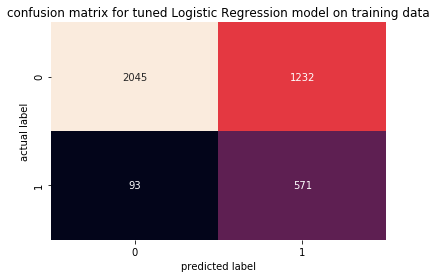

In [88]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod4), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned Logistic Regression model on training data')

Text(0.5, 1, 'confusion matrix for tuned Logistic Regression model on testing data')

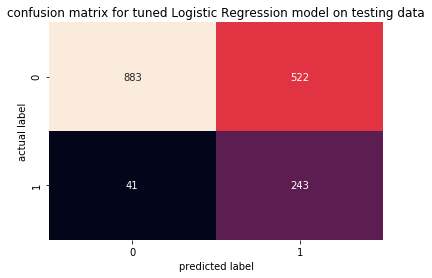

In [93]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod4), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned Logistic Regression model on testing data')

### (i)Model Score for Tuned Logistic Regression Model 

In [113]:
# trianing dataset
mod4.score(x_train , y_train)

0.6637909160111647

In [114]:
# testing dataset
mod4.score(x_test, y_test)

0.6666666666666666

### (j)ROC-AUC Score for Tuned Logistic Regression Model

the auc score for mod4 on training dataset is: 0.849


Text(0.5, 1.0, 'ROC curve for tuned Logistic Regression model on training data')

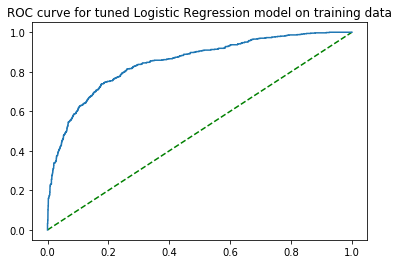

In [86]:
# training dataset
probs7 = mod4.predict_proba(x_train)
probs7 = probs7[:,1]

auc_score_mod4_train = roc_auc_score(y_train, probs7)
print('the auc score for mod4 on training dataset is: %.3f' %auc_score_mod4_train)

train_tpr_mod4, train_fpr_mod4, train_thresholds_mod4 = roc_curve(y_train, probs7)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod4, train_fpr_mod4)
plt.title('ROC curve for tuned Logistic Regression model on training data')

the auc score for mod4 on testing dataset is: 0.846


Text(0.5, 1.0, 'ROC curve for tuned Logistic Regression model on testing data')

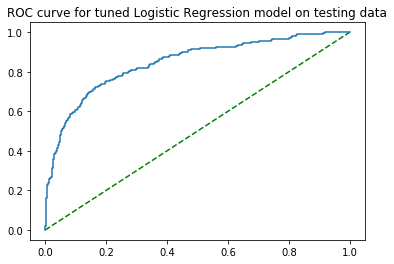

In [87]:
# testing dataset
probs8 = mod4.predict_proba(x_test)
probs8 = probs8[:,1]

auc_score_mod4_test = roc_auc_score(y_test, probs8)
print('the auc score for mod4 on testing dataset is: %.3f' %auc_score_mod4_test)

test_tpr_mod4, test_fpr_mod4, test_thresholds_mod4 = roc_curve(y_test, probs8)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod4, test_fpr_mod4)
plt.title('ROC curve for tuned Logistic Regression model on testing data')

## (k)Statsmodel Approach

In [65]:
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

In [66]:
import statsmodels.formula.api as SM

In [67]:
train_data.columns

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_DD',
       'PreferredPaymentMode_UPI', 'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'K_Means_clust', 'PAM_clust', 'Churn'],
      dtype='object')

In [68]:
f1 = 'Churn ~ Tenure + CityTier + WarehouseToHome + HourSpendOnApp + NumberOfDeviceRegistered + SatisfactionScore +NumberOfAddress + Complain + OrderAmountHikeFromlastYear + CouponUsed + OrderCount +DaySinceLastOrder + CashbackAmount + PreferredLoginDevice_Phone + PreferredPaymentMode_COD + PreferredPaymentMode_DD + PreferredPaymentMode_UPI + Gender_Male + PreferedOrderCat_Grocery + PreferedOrderCat_Laptop + PreferedOrderCat_Mobile + PreferedOrderCat_Others +MaritalStatus_Married +MaritalStatus_Single + K_Means_clust +PAM_clust'

In [69]:
# Logistic Regression Model - Model 1
model_1 = SM.logit(formula = f1, data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.271223
         Iterations 8


In [75]:
print(model_1.summary2())

                               Results: Logit
Model:                  Logit               Pseudo R-squared:    0.402      
Dependent Variable:     Churn               AIC:                 2191.7823  
Date:                   2021-01-21 11:42    BIC:                 2361.3204  
No. Observations:       3941                Log-Likelihood:      -1068.9    
Df Model:               26                  LL-Null:             -1787.1    
Df Residuals:           3914                LLR p-value:         4.6430e-287
Converged:              1.0000              Scale:               1.0000     
No. Iterations:         8.0000                                              
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                   -1.0608   0.4524  -2.3450 0.0190 -1.9474 -0.1742
Tenure                      -1

# 5. ADABoost

## (a)BASE ADABOOST MODEL

In [88]:
from sklearn.ensemble import AdaBoostClassifier

mod5 = AdaBoostClassifier(n_estimators=100,random_state=1)
mod5.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [89]:
mod5.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [90]:
train_pred_mod5 = mod5.predict(x_train)
test_pred_mod5 = mod5.predict(x_test)

### (b)Classification Report for Base ADABoost Model

In [119]:
#training dataset
print(classification_report(y_train, train_pred_mod5))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      3277
         1.0       0.78      0.62      0.69       664

    accuracy                           0.91      3941
   macro avg       0.85      0.79      0.82      3941
weighted avg       0.90      0.91      0.90      3941



In [120]:
#testing dataset
print(classification_report(y_test, test_pred_mod5))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1405
         1.0       0.75      0.58      0.65       284

    accuracy                           0.90      1689
   macro avg       0.83      0.77      0.80      1689
weighted avg       0.89      0.90      0.89      1689



### (c)Confusion Matrix fob Base ADABoost Model

Text(0.5, 1, 'confusion matrix for base ADABoost model on training data')

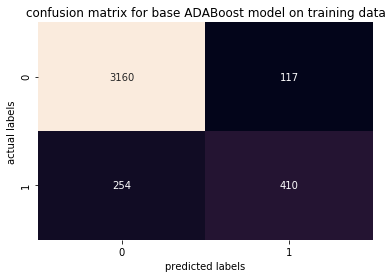

In [94]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod5), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base ADABoost model on training data')

Text(0.5, 1, 'confusion matrix for base Logistic Regression model on testning data')

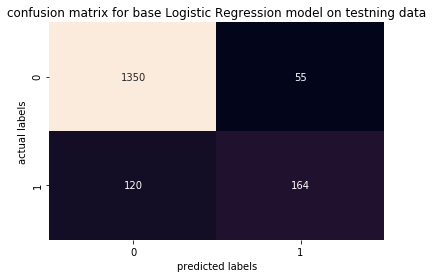

In [95]:
# testing data
sns.heatmap(confusion_matrix(y_test, test_pred_mod5), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base Logistic Regression model on testning data')

### (d)Model Score for Base AdaBoost Model

In [123]:
# training data
mod5.score(x_train, y_train)

0.9058614564831261

In [124]:
# testing data
mod5.score(x_test, y_test)

0.896388395500296

### (e)ROC-AUC Score for base ADABoost Model

the auc score for mod5 on training dataset is: 0.937


Text(0.5, 1.0, 'ROC curve for base ADABoost model on training data')

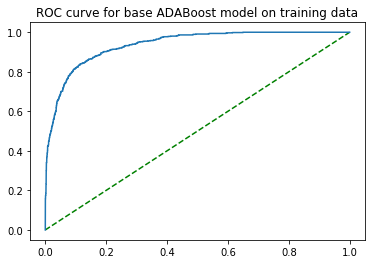

In [91]:
# training dataset
probs9 = mod5.predict_proba(x_train)
probs9 = probs9[:,1]

auc_score_mod5_train = roc_auc_score(y_train, probs9)
print('the auc score for mod5 on training dataset is: %.3f' %auc_score_mod5_train)

train_tpr_mod5, train_fpr_mod5, train_thresholds_mod5 = roc_curve(y_train,probs9)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod5, train_fpr_mod5)
plt.title('ROC curve for base ADABoost model on training data')

the auc score for mod5 on testing dataset is: 0.920


Text(0.5, 1.0, 'ROC curve for base ADABoost model on testing data')

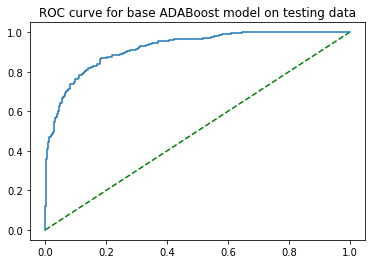

In [92]:
# testing dataset
probs10 = mod5.predict_proba(x_test)
probs10 = probs10[:,1]

auc_score_mod5_test = roc_auc_score(y_test, probs10)
print('the auc score for mod5 on testing dataset is: %.3f' %auc_score_mod5_test)

test_tpr_mod5, test_fpr_mod5, test_thresholds_mod5 = roc_curve(y_test,probs10)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod5, test_fpr_mod5)
plt.title('ROC curve for base ADABoost model on testing data')

## (f)Tuned ADABoost Model

In [127]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [500,600,700,800,900,1000,1100,1200,1300],
    'algorithm' : ['SAMME', 'SAMME.R'],
    'learning_rate' : [0.01,0.05,0.1,0.2,0.3,0.5]
   }
ada =  AdaBoostClassifier(random_state = 1)
grid = GridSearchCV(estimator = ada, param_grid=params, cv=5, scoring='recall', verbose=3)

In [128]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=500; total time=   2.9s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=500; total time=   2.9s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=500; total time=   3.1s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=500; total time=   2.9s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=500; total time=   2.9s
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=600; total time=   3.5s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=600; total time=   3.6s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=600; total time=   3.6s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=600; total time=   3.5s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=600; total time=   3.5s
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=700;

[CV 5/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=500; total time=   2.9s
[CV 1/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=600; total time=   3.5s
[CV 2/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=600; total time=   3.4s
[CV 3/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=600; total time=   3.4s
[CV 4/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=600; total time=   3.6s
[CV 5/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=600; total time=   3.5s
[CV 1/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=700; total time=   4.1s
[CV 2/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=700; total time=   4.1s
[CV 3/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=700; total time=   4.2s
[CV 4/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=700; total time=   4.0s
[CV 5/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=700; total time=   4.1s
[CV 1/5] END algorithm=SAMME, learning_rate=0.1, n_est

[CV 5/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=600; total time=   3.6s
[CV 1/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=700; total time=   4.2s
[CV 2/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=700; total time=   4.1s
[CV 3/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=700; total time=   2.7s
[CV 4/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=700; total time=   2.8s
[CV 5/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=700; total time=   4.1s
[CV 1/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=800; total time=   3.2s
[CV 2/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=800; total time=   3.5s
[CV 3/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=800; total time=   4.7s
[CV 4/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=800; total time=   3.1s
[CV 5/5] END algorithm=SAMME, learning_rate=0.3, n_estimators=800; total time=   3.7s
[CV 1/5] END algorithm=SAMME, learning_rate=0.3, n_est

[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=700; total time=   5.0s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=800; total time=   5.7s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=800; total time=   5.8s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=800; total time=   5.8s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=800; total time=   6.0s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=800; total time=   6.0s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=900; total time=   6.9s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=900; total time=   6.9s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=900; total time=   6.7s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=900; total time=   6.5s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=900; total time=   6.6s
[CV 1/5] END algorith

[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=800; total time=   5.5s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=800; total time=   5.7s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=800; total time=   6.0s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=800; total time=   6.1s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=900; total time=   4.6s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=900; total time=   5.6s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=900; total time=   4.6s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=900; total time=   3.6s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=900; total time=   6.3s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=1000; total time=   7.0s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=1000; total time=   4.3s
[CV 3/5] END algorithm=SAMME.R

[CV 5/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=800; total time=   5.7s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=900; total time=   6.5s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=900; total time=   3.6s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=900; total time=   4.7s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=900; total time=   5.2s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=900; total time=   3.7s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=1000; total time=   7.3s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=1000; total time=   7.1s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=1000; total time=   6.9s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=1000; total time=   6.3s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.3, n_estimators=1000; total time=   4.9s
[CV 1/5] END algorithm=SAMM

In [129]:
print('the time for algo execution is: {}'.format(end-start))

the time for algo execution is: 2973.5708208084106


In [130]:
grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 1300}

In [131]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.5, n_estimators=1300, random_state=1)

In [93]:
mod6 = AdaBoostClassifier(learning_rate=0.5, n_estimators=1300, random_state=1)
mod6.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=1300, random_state=1)

In [94]:
train_pred_mod6 = mod6.predict(x_train)
test_pred_mod6 = mod6.predict(x_test)

### (g)Classification Report for tuned ADABoost Model

In [134]:
# training data
print(classification_report(y_train, train_pred_mod6))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      3277
         1.0       0.78      0.64      0.70       664

    accuracy                           0.91      3941
   macro avg       0.86      0.80      0.83      3941
weighted avg       0.90      0.91      0.91      3941



In [135]:
# testing data
print(classification_report(y_test, test_pred_mod6))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1405
         1.0       0.75      0.60      0.67       284

    accuracy                           0.90      1689
   macro avg       0.84      0.78      0.80      1689
weighted avg       0.89      0.90      0.89      1689



### (h)Confusion Matrix for tuned ADABoost Model

Text(0.5, 1, 'confusion matrix for tuned ADABoost model on training data')

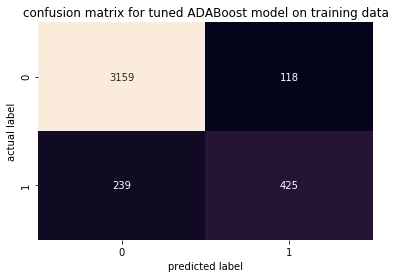

In [98]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod6), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned ADABoost model on training data')

Text(0.5, 1, 'confusion matrix for tuned ADABoost model on testing data')

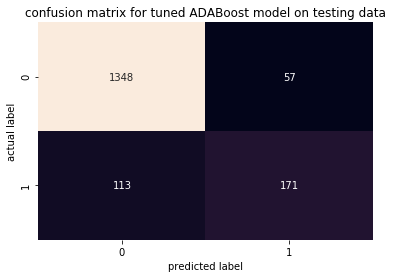

In [99]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod6), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned ADABoost model on testing data')

### (i)Model Score for Tuned ADABoost Model

In [138]:
# trianing dataset
mod6.score(x_train , y_train)

0.9094138543516874

In [139]:
# testing dataset
mod6.score(x_test, y_test)

0.8993487270574304

### (j)ROC-AUC Score for Tuned ADABoost Model

the auc score for mod6 on training dataset is: 0.951


Text(0.5, 1.0, 'ROC curve for tuned ADABoost model on training data')

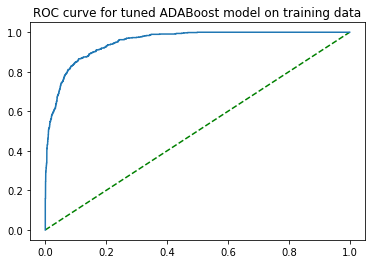

In [95]:
# training dataset
probs11 = mod6.predict_proba(x_train)
probs11 = probs11[:,1]

auc_score_mod6_train = roc_auc_score(y_train, probs11)
print('the auc score for mod6 on training dataset is: %.3f' %auc_score_mod6_train)

train_tpr_mod6, train_fpr_mod6, train_thresholds_mod6 = roc_curve(y_train, probs11)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod6, train_fpr_mod6)
plt.title('ROC curve for tuned ADABoost model on training data')

the auc score for mod6 on testing dataset is: 0.933


Text(0.5, 1.0, 'ROC curve for tuned ADABoost model on testing data')

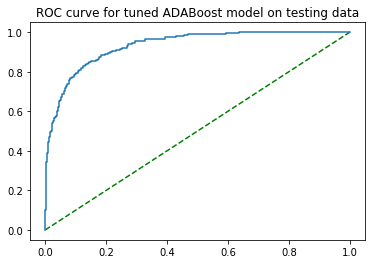

In [96]:
# testing dataset
probs12 = mod6.predict_proba(x_test)
probs12 = probs12[:,1]

auc_score_mod6_test = roc_auc_score(y_test, probs12)
print('the auc score for mod6 on testing dataset is: %.3f' %auc_score_mod6_test)

test_tpr_mod6, test_fpr_mod6, test_thresholds_mod6 = roc_curve(y_test, probs12)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod6, test_fpr_mod6)
plt.title('ROC curve for tuned ADABoost model on testing data')

# 6. Support Vector Machines

## (a)Base Model

In [97]:
from sklearn import svm
mod7 = svm.SVC(random_state=1, probability=True)
mod7.fit(x_train, y_train)

SVC(probability=True, random_state=1)

In [98]:
# 0 means correctly fitted and 1 means otherwise
mod7.fit_status_

0

In [99]:
mod7.intercept_

array([-0.17381292])

In [100]:
mod7.n_support_

array([753, 556])

In [101]:
train_pred_mod7 = mod7.predict(x_train)
test_pred_mod7 = mod7.predict(x_test)

### (b)Classification Report for Base SVM Model

In [144]:
# training dataset
print(classification_report(y_train, train_pred_mod7))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      3277
         1.0       0.95      0.68      0.79       664

    accuracy                           0.94      3941
   macro avg       0.94      0.84      0.88      3941
weighted avg       0.94      0.94      0.94      3941



In [145]:
# test data
print(classification_report(y_test, test_pred_mod7))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1405
         1.0       0.89      0.58      0.70       284

    accuracy                           0.92      1689
   macro avg       0.91      0.78      0.83      1689
weighted avg       0.92      0.92      0.91      1689



### (c)Confusion Matrix for base SVM model

Text(0.5, 1, 'confusion matrix for base SVM model on training data')

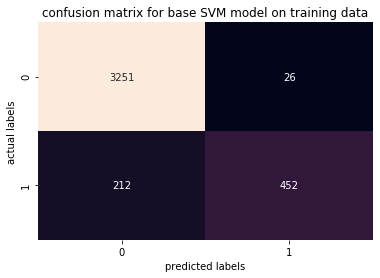

In [105]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod7), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base SVM model on training data')

Text(0.5, 1, 'confusion matrix for base SVM model on testing data')

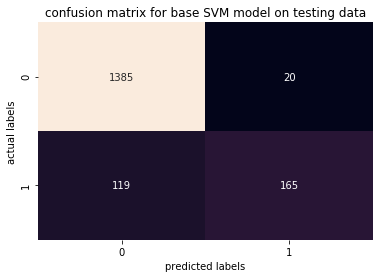

In [106]:
# testing data
sns.heatmap(confusion_matrix(y_test, test_pred_mod7), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base SVM model on testing data')

### (d)Model Score for Base SVM Model

In [148]:
# training data
mod7.score(x_train, y_train)

0.9396092362344582

In [149]:
# training data
mod7.score(x_train, y_train)

0.9396092362344582

### (e)ROC-AUC Score for base SVM Model

the auc score for mod7 on training dataset is: 0.963


Text(0.5, 1.0, 'ROC curve for base SVM model on training data')

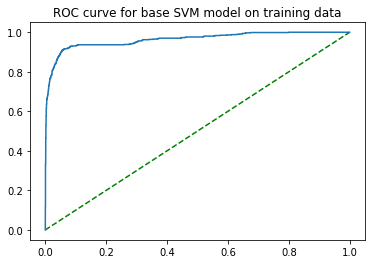

In [102]:
# training dataset
probs13 = mod7.predict_proba(x_train)
probs13 = probs13[:,1]

auc_score_mod7_train = roc_auc_score(y_train, probs13)
print('the auc score for mod7 on training dataset is: %.3f' %auc_score_mod7_train)

train_tpr_mod7, train_fpr_mod7, train_thresholds_mod7 = roc_curve(y_train,probs13)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod7, train_fpr_mod7)
plt.title('ROC curve for base SVM model on training data')

the auc score for mod7 on testing dataset is: 0.934


Text(0.5, 1.0, 'ROC curve for base SVM model on testing data')

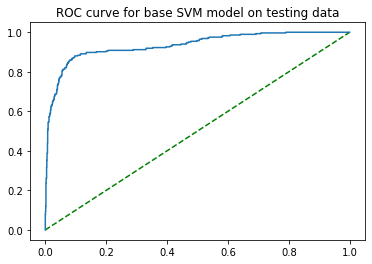

In [103]:
# testing dataset
probs14 = mod7.predict_proba(x_test)
probs14 = probs14[:,1]

auc_score_mod7_test = roc_auc_score(y_test, probs14)
print('the auc score for mod7 on testing dataset is: %.3f' %auc_score_mod7_test)

test_tpr_mod7, test_fpr_mod7, test_thresholds_mod7 = roc_curve(y_test,probs14)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod7, test_fpr_mod7)
plt.title('ROC curve for base SVM model on testing data')

## (f)Tuned SVM Model

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

params = {
    'C' : [0.001, 0.01, 0.1, 1, 10],
     'gamma' : [0.001, 0.01, 0.1, 1]
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'tol' : [0.01,0.001,0.0001],
    }

svm =svm.SVC(verbose=True, probability=True,max_iter=-1)
grid = GridSearchCV(estimator = svm, param_grid=params, cv=5, scoring='recall', verbose=3)

In [153]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[LibSVM][CV 1/5] END ..C=0.001, gamma=0.001, kernel=linear, tol=0.01; total time=   1.7s
[LibSVM][CV 2/5] END ..C=0.001, gamma=0.001, kernel=linear, tol=0.01; total time=   1.7s
[LibSVM][CV 3/5] END ..C=0.001, gamma=0.001, kernel=linear, tol=0.01; total time=   1.6s
[LibSVM][CV 4/5] END ..C=0.001, gamma=0.001, kernel=linear, tol=0.01; total time=   1.7s
[LibSVM][CV 5/5] END ..C=0.001, gamma=0.001, kernel=linear, tol=0.01; total time=   1.6s
[LibSVM][CV 1/5] END .C=0.001, gamma=0.001, kernel=linear, tol=0.001; total time=   1.7s
[LibSVM][CV 2/5] END .C=0.001, gamma=0.001, kernel=linear, tol=0.001; total time=   1.7s
[LibSVM][CV 3/5] END .C=0.001, gamma=0.001, kernel=linear, tol=0.001; total time=   1.6s
[LibSVM][CV 4/5] END .C=0.001, gamma=0.001, kernel=linear, tol=0.001; total time=   1.6s
[LibSVM][CV 5/5] END .C=0.001, gamma=0.001, kernel=linear, tol=0.001; total time=   1.7s
[LibSVM][CV 1/5] END C=0.001, gamma=0.001, ker

[LibSVM][CV 3/5] END ......C=0.001, gamma=0.01, kernel=rbf, tol=0.01; total time=   2.6s
[LibSVM][CV 4/5] END ......C=0.001, gamma=0.01, kernel=rbf, tol=0.01; total time=   2.5s
[LibSVM][CV 5/5] END ......C=0.001, gamma=0.01, kernel=rbf, tol=0.01; total time=   2.5s
[LibSVM][CV 1/5] END .....C=0.001, gamma=0.01, kernel=rbf, tol=0.001; total time=   2.9s
[LibSVM][CV 2/5] END .....C=0.001, gamma=0.01, kernel=rbf, tol=0.001; total time=   2.8s
[LibSVM][CV 3/5] END .....C=0.001, gamma=0.01, kernel=rbf, tol=0.001; total time=   2.8s
[LibSVM][CV 4/5] END .....C=0.001, gamma=0.01, kernel=rbf, tol=0.001; total time=   2.8s
[LibSVM][CV 5/5] END .....C=0.001, gamma=0.01, kernel=rbf, tol=0.001; total time=   2.9s
[LibSVM][CV 1/5] END ....C=0.001, gamma=0.01, kernel=rbf, tol=0.0001; total time=   3.1s
[LibSVM][CV 2/5] END ....C=0.001, gamma=0.01, kernel=rbf, tol=0.0001; total time=   3.2s
[LibSVM][CV 3/5] END ....C=0.001, gamma=0.01, kernel=rbf, tol=0.0001; total time=   2.9s
[LibSVM][CV 4/5] END 

[LibSVM][CV 2/5] END .....C=0.01, gamma=0.001, kernel=rbf, tol=0.001; total time=   1.7s
[LibSVM][CV 3/5] END .....C=0.01, gamma=0.001, kernel=rbf, tol=0.001; total time=   2.8s
[LibSVM][CV 4/5] END .....C=0.01, gamma=0.001, kernel=rbf, tol=0.001; total time=   2.8s
[LibSVM][CV 5/5] END .....C=0.01, gamma=0.001, kernel=rbf, tol=0.001; total time=   2.9s
[LibSVM][CV 1/5] END ....C=0.01, gamma=0.001, kernel=rbf, tol=0.0001; total time=   3.0s
[LibSVM][CV 2/5] END ....C=0.01, gamma=0.001, kernel=rbf, tol=0.0001; total time=   2.9s
[LibSVM][CV 3/5] END ....C=0.01, gamma=0.001, kernel=rbf, tol=0.0001; total time=   2.9s
[LibSVM][CV 4/5] END ....C=0.01, gamma=0.001, kernel=rbf, tol=0.0001; total time=   2.9s
[LibSVM][CV 5/5] END ....C=0.01, gamma=0.001, kernel=rbf, tol=0.0001; total time=   2.9s
[LibSVM][CV 1/5] END ..C=0.01, gamma=0.001, kernel=sigmoid, tol=0.01; total time=   2.1s
[LibSVM][CV 2/5] END ..C=0.01, gamma=0.001, kernel=sigmoid, tol=0.01; total time=   2.1s
[LibSVM][CV 3/5] END 

[LibSVM][CV 1/5] END ........C=0.01, gamma=1, kernel=rbf, tol=0.0001; total time=   5.2s
[LibSVM][CV 2/5] END ........C=0.01, gamma=1, kernel=rbf, tol=0.0001; total time=   5.5s
[LibSVM][CV 3/5] END ........C=0.01, gamma=1, kernel=rbf, tol=0.0001; total time=   7.0s
[LibSVM][CV 4/5] END ........C=0.01, gamma=1, kernel=rbf, tol=0.0001; total time=   7.5s
[LibSVM][CV 5/5] END ........C=0.01, gamma=1, kernel=rbf, tol=0.0001; total time=   7.5s
[LibSVM][CV 1/5] END ......C=0.01, gamma=1, kernel=sigmoid, tol=0.01; total time=   3.4s
[LibSVM][CV 2/5] END ......C=0.01, gamma=1, kernel=sigmoid, tol=0.01; total time=   3.6s
[LibSVM][CV 3/5] END ......C=0.01, gamma=1, kernel=sigmoid, tol=0.01; total time=   3.5s
[LibSVM][CV 4/5] END ......C=0.01, gamma=1, kernel=sigmoid, tol=0.01; total time=   3.4s
[LibSVM][CV 5/5] END ......C=0.01, gamma=1, kernel=sigmoid, tol=0.01; total time=   3.4s
[LibSVM][CV 1/5] END .....C=0.01, gamma=1, kernel=sigmoid, tol=0.001; total time=   3.4s
[LibSVM][CV 2/5] END 

[LibSVM][CV 5/5] END .......C=0.1, gamma=0.1, kernel=rbf, tol=0.0001; total time=   4.5s
[LibSVM][CV 1/5] END .....C=0.1, gamma=0.1, kernel=sigmoid, tol=0.01; total time=   2.5s
[LibSVM][CV 2/5] END .....C=0.1, gamma=0.1, kernel=sigmoid, tol=0.01; total time=   2.6s
[LibSVM][CV 3/5] END .....C=0.1, gamma=0.1, kernel=sigmoid, tol=0.01; total time=   2.6s
[LibSVM][CV 4/5] END .....C=0.1, gamma=0.1, kernel=sigmoid, tol=0.01; total time=   2.5s
[LibSVM][CV 5/5] END .....C=0.1, gamma=0.1, kernel=sigmoid, tol=0.01; total time=   2.5s
[LibSVM][CV 1/5] END ....C=0.1, gamma=0.1, kernel=sigmoid, tol=0.001; total time=   2.5s
[LibSVM][CV 2/5] END ....C=0.1, gamma=0.1, kernel=sigmoid, tol=0.001; total time=   2.6s
[LibSVM][CV 3/5] END ....C=0.1, gamma=0.1, kernel=sigmoid, tol=0.001; total time=   2.7s
[LibSVM][CV 4/5] END ....C=0.1, gamma=0.1, kernel=sigmoid, tol=0.001; total time=   2.6s
[LibSVM][CV 5/5] END ....C=0.1, gamma=0.1, kernel=sigmoid, tol=0.001; total time=   2.5s
[LibSVM][CV 1/5] END 

[LibSVM][CV 4/5] END ......C=1, gamma=0.01, kernel=sigmoid, tol=0.01; total time=   2.3s
[LibSVM][CV 5/5] END ......C=1, gamma=0.01, kernel=sigmoid, tol=0.01; total time=   2.3s
[LibSVM][CV 1/5] END .....C=1, gamma=0.01, kernel=sigmoid, tol=0.001; total time=   2.3s
[LibSVM][CV 2/5] END .....C=1, gamma=0.01, kernel=sigmoid, tol=0.001; total time=   2.4s
[LibSVM][CV 3/5] END .....C=1, gamma=0.01, kernel=sigmoid, tol=0.001; total time=   2.4s
[LibSVM][CV 4/5] END .....C=1, gamma=0.01, kernel=sigmoid, tol=0.001; total time=   2.4s
[LibSVM][CV 5/5] END .....C=1, gamma=0.01, kernel=sigmoid, tol=0.001; total time=   2.4s
[LibSVM][CV 1/5] END ....C=1, gamma=0.01, kernel=sigmoid, tol=0.0001; total time=   2.3s
[LibSVM][CV 2/5] END ....C=1, gamma=0.01, kernel=sigmoid, tol=0.0001; total time=   2.4s
[LibSVM][CV 3/5] END ....C=1, gamma=0.01, kernel=sigmoid, tol=0.0001; total time=   2.4s
[LibSVM][CV 4/5] END ....C=1, gamma=0.01, kernel=sigmoid, tol=0.0001; total time=   2.3s
[LibSVM][CV 5/5] END 

[LibSVM][CV 3/5] END ...C=10, gamma=0.001, kernel=sigmoid, tol=0.001; total time=   2.3s
[LibSVM][CV 4/5] END ...C=10, gamma=0.001, kernel=sigmoid, tol=0.001; total time=   2.3s
[LibSVM][CV 5/5] END ...C=10, gamma=0.001, kernel=sigmoid, tol=0.001; total time=   2.4s
[LibSVM][CV 1/5] END ..C=10, gamma=0.001, kernel=sigmoid, tol=0.0001; total time=   2.3s
[LibSVM][CV 2/5] END ..C=10, gamma=0.001, kernel=sigmoid, tol=0.0001; total time=   2.3s
[LibSVM][CV 3/5] END ..C=10, gamma=0.001, kernel=sigmoid, tol=0.0001; total time=   2.3s
[LibSVM][CV 4/5] END ..C=10, gamma=0.001, kernel=sigmoid, tol=0.0001; total time=   2.3s
[LibSVM][CV 5/5] END ..C=10, gamma=0.001, kernel=sigmoid, tol=0.0001; total time=   2.3s
[LibSVM][CV 1/5] END ......C=10, gamma=0.01, kernel=linear, tol=0.01; total time=  10.0s
[LibSVM][CV 2/5] END ......C=10, gamma=0.01, kernel=linear, tol=0.01; total time=  10.0s
[LibSVM][CV 3/5] END ......C=10, gamma=0.01, kernel=linear, tol=0.01; total time=  10.4s
[LibSVM][CV 4/5] END 

[LibSVM][CV 2/5] END ......C=10, gamma=1, kernel=sigmoid, tol=0.0001; total time=   2.7s
[LibSVM][CV 3/5] END ......C=10, gamma=1, kernel=sigmoid, tol=0.0001; total time=   2.6s
[LibSVM][CV 4/5] END ......C=10, gamma=1, kernel=sigmoid, tol=0.0001; total time=   2.5s
[LibSVM][CV 5/5] END ......C=10, gamma=1, kernel=sigmoid, tol=0.0001; total time=   2.4s
[LibSVM]

In [154]:
print('the time for algo execution is: {}'.format(end-start))

the time for algo execution is: 3771.081269264221


In [155]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'tol': 0.01}

In [156]:
grid.best_estimator_

SVC(C=10, gamma=0.1, probability=True, tol=0.01, verbose=True)

In [174]:
from sklearn import svm

mod8 = svm.SVC(C=10, gamma=0.1, probability=True, tol=0.01, verbose=True, kernel='rbf')
mod8.fit(x_train, y_train)

[LibSVM]

SVC(C=10, gamma=0.1, probability=True, tol=0.01, verbose=True)

In [175]:
# 0 means correctly fitted and 1 means otherwise
mod8.fit_status_

0

In [176]:
train_pred_mod8 = mod8.predict(x_train)
test_pred_mod8 = mod8.predict(x_test)

### (g)Classification Report for tuned SVM Model

In [177]:
# training data
print(classification_report(y_train, train_pred_mod8))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [178]:
# testing data
print(classification_report(y_test, test_pred_mod8))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1405
         1.0       0.97      0.92      0.94       284

    accuracy                           0.98      1689
   macro avg       0.98      0.96      0.97      1689
weighted avg       0.98      0.98      0.98      1689



### (h)Confusion Matrix for tuned SVM Model

Text(0.5, 1, 'confusion matrix for tuned SVM model on training data')

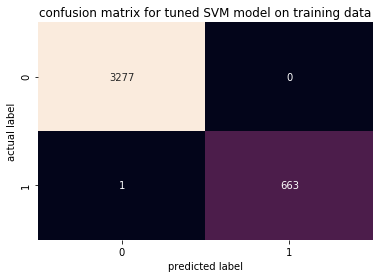

In [179]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod8), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned SVM model on training data')

Text(0.5, 1, 'confusion matrix for tuned SVM model on testing data')

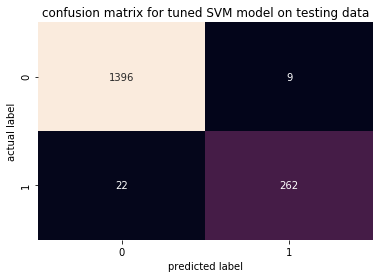

In [180]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod8), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned SVM model on testing data')

### (i)Model Score for tuned SVM Model

In [181]:
# trianing dataset
mod8.score(x_train , y_train)

0.9997462572951028

In [182]:
# testing dataset
mod8.score(x_test, y_test)

0.9816459443457667

### (j)ROC-AUC Score for tuned SVM Model

the auc score for mod8 on training dataset is: 1.000


Text(0.5, 1.0, 'ROC curve for tuned SVM model on training data')

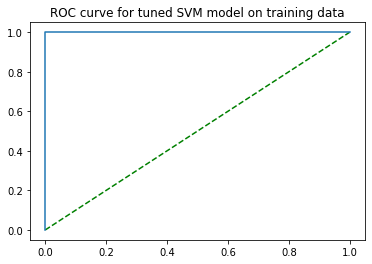

In [107]:
# training dataset
probs15 = mod8.predict_proba(x_train)
probs15 = probs15[:,1]

auc_score_mod8_train = roc_auc_score(y_train, probs15)
print('the auc score for mod8 on training dataset is: %.3f' %auc_score_mod8_train)

train_tpr_mod8, train_fpr_mod8, train_thresholds_mod8 = roc_curve(y_train, probs15)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod8, train_fpr_mod8)
plt.title('ROC curve for tuned SVM model on training data')

the auc score for mod8 on testing dataset is: 0.996


Text(0.5, 1.0, 'ROC curve for tuned SVM model on testing data')

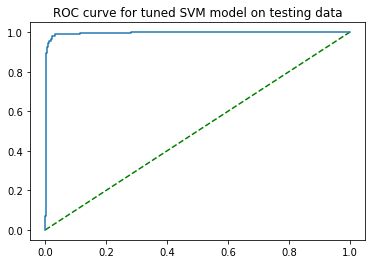

In [108]:
# training dataset
probs16 = mod8.predict_proba(x_test)
probs16 = probs16[:,1]

auc_score_mod8_test = roc_auc_score(y_test, probs16)
print('the auc score for mod8 on testing dataset is: %.3f' %auc_score_mod8_test)

test_tpr_mod8, test_fpr_mod8, test_thresholds_mod8 = roc_curve(y_test, probs16)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod8, test_fpr_mod8)
plt.title('ROC curve for tuned SVM model on testing data')

# 7. Naive Bayes Model

## (a) Gaussian Naive Bayes Model

In [110]:
from sklearn.naive_bayes import GaussianNB
mod9 = GaussianNB()
mod9.fit(x_train, y_train)

GaussianNB()

In [111]:
train_pred_mod9 = mod9.predict(x_train)
test_pred_mod9 = mod9.predict(x_test)

### (b)Classification Report for GNB model

In [169]:
#training data
print(classification_report(y_train, train_pred_mod9))

              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83      3277
         1.0       0.36      0.69      0.47       664

    accuracy                           0.74      3941
   macro avg       0.64      0.72      0.65      3941
weighted avg       0.83      0.74      0.77      3941



In [170]:
#testing data
print(classification_report(y_test, test_pred_mod9))

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.83      1405
         1.0       0.37      0.71      0.49       284

    accuracy                           0.75      1689
   macro avg       0.65      0.73      0.66      1689
weighted avg       0.83      0.75      0.78      1689



### (c)Confusion Matrix for GNB

Text(0.5, 1, 'confusion matrix for GNB model on training data')

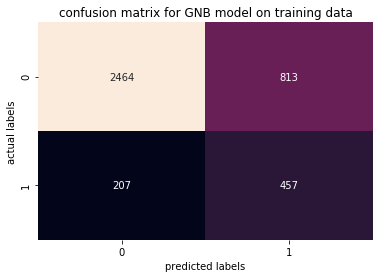

In [116]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod9), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for GNB model on training data')

Text(0.5, 1, 'confusion matrix for GNB model on testing data')

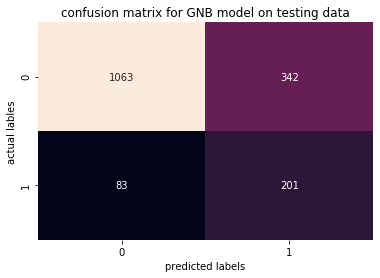

In [117]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod9), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual lables')
plt.title('confusion matrix for GNB model on testing data')

### (d)Model Score for GNB Model

In [173]:
#training data
print(mod9.score(x_train, y_train))

0.7411824410048211


In [174]:
#testing data
print(mod9.score(x_test, y_test))

0.7483718176435761


### (e)ROC-AUC score for GNB Model

the auc score for mod9 on training dataset is: 0.800


Text(0.5, 1.0, 'ROC curve for GNB model on training data')

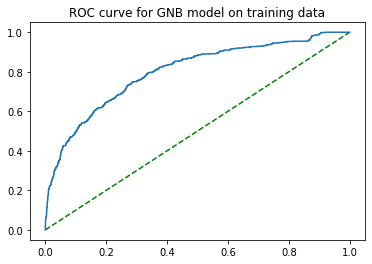

In [112]:
# training dataset
probs17 = mod9.predict_proba(x_train)
probs17 = probs17[:,1]

auc_score_mod9_train = roc_auc_score(y_train, probs17)
print('the auc score for mod9 on training dataset is: %.3f' %auc_score_mod9_train)

train_tpr_mod9, train_fpr_mod9, train_thresholds_mod9 = roc_curve(y_train,probs17)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod9, train_fpr_mod9)
plt.title('ROC curve for GNB model on training data')

the auc score for mod9 on testing dataset is: 0.819


Text(0.5, 1.0, 'ROC curve for GNB model on testing data')

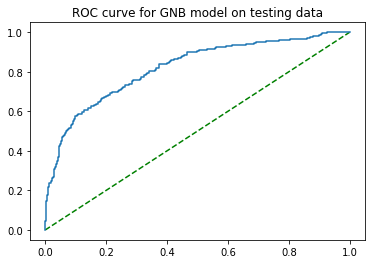

In [113]:
# testing dataset
probs18 = mod9.predict_proba(x_test)
probs18 = probs18[:,1]

auc_score_mod9_test = roc_auc_score(y_test, probs18)
print('the auc score for mod9 on testing dataset is: %.3f' %auc_score_mod9_test)

test_tpr_mod9, test_fpr_mod9, test_thresholds_mod9 = roc_curve(y_test,probs18)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod9, test_fpr_mod9)
plt.title('ROC curve for GNB model on testing data')

# 8. CART (Decision Tree)

## (a)Base Model

In [118]:
from sklearn.tree import DecisionTreeClassifier

mod11 = DecisionTreeClassifier(random_state=1, criterion='gini')
mod11.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [119]:
mod11.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [120]:
mod11.get_depth()

16

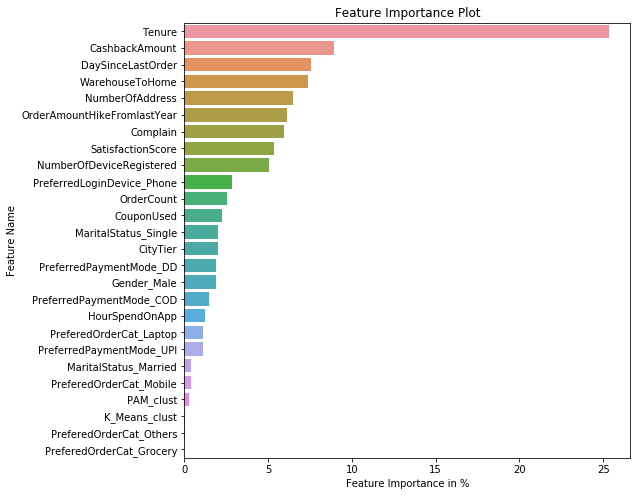

In [185]:
p = pd.DataFrame(mod11.feature_importances_*100, index=x_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(p[0], p.index,)
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
#plt.savefig('q2_Feature Importance of Variables for CART Model.png')
plt.show()

In [122]:
train_pred_mod11 = mod11.predict(x_train)
test_pred_mod11 = mod11.predict(x_test)

### (b)Classification Report for base CART Model

In [192]:
#training data
print(classification_report(y_train, train_pred_mod11))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [193]:
#testing data
print(classification_report(y_test, test_pred_mod11))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1405
         1.0       0.88      0.88      0.88       284

    accuracy                           0.96      1689
   macro avg       0.93      0.93      0.93      1689
weighted avg       0.96      0.96      0.96      1689



### (c)Confusion Matrix for base Confusion Matrix

Text(0.5, 1, 'confusion matrix for base CART model on training data')

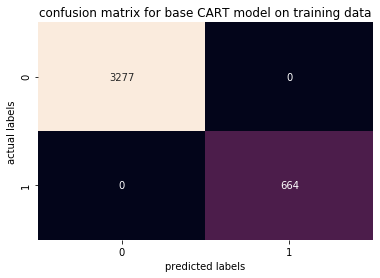

In [126]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod11), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base CART model on training data')

Text(0.5, 1, 'confusion matrix for base CART model on testing data')

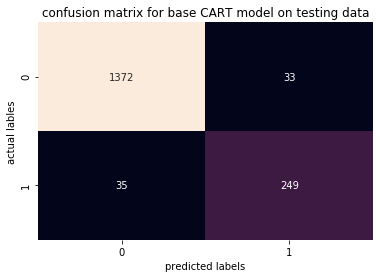

In [127]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod11), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual lables')
plt.title('confusion matrix for base CART model on testing data')

### (d)Model Score for base CART Model

In [196]:
#training data
print(mod11.score(x_train, y_train))

1.0


In [197]:
#testing data
print(mod11.score(x_test, y_test))

0.9597394908229722


### (e)ROC-AUC Score for base CART Model

the auc score for mod11 on training dataset is: 1.000


Text(0.5, 1.0, 'ROC curve for base CART model on training data')

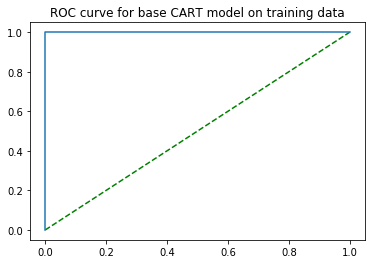

In [123]:
# training dataset
probs21= mod11.predict_proba(x_train)
probs21 = probs21[:,1]

auc_score_mod11_train = roc_auc_score(y_train, probs21)
print('the auc score for mod11 on training dataset is: %.3f'%auc_score_mod11_train)

mod11_train_tpr, mod11_train_fpr, mod11_train_thresholds = roc_curve(y_train, probs21)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(mod11_train_tpr, mod11_train_fpr)
plt.title('ROC curve for base CART model on training data')

the auc score for mod11 on the testing dataset is: 0.927


Text(0.5, 1.0, 'ROC curve for base CART model on testing data')

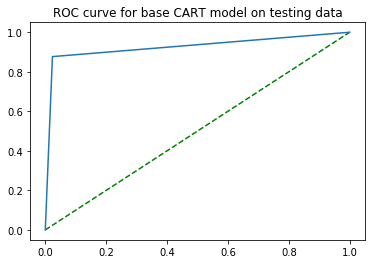

In [124]:
# testing dataset
probs22 = mod11.predict_proba(x_test)
probs22 = probs22[:,1]

auc_score_mod11_test = roc_auc_score(y_test, probs22)
print('the auc score for mod11 on the testing dataset is: %.3f' %auc_score_mod11_test)

mod11_test_tpr, mod11_test_fpr, mod11_thresholds = roc_curve(y_test, probs22)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(mod11_test_tpr, mod11_test_fpr)
plt.title('ROC curve for base CART model on testing data')

## (f)Tuned CART Model

In [200]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion' : ['gini', 'entropy']
    'max_depth' : [6,7,8,9,10,11],
    'min_samples_leaf' : [15,20,25,30,35,40,45,50,55,60,65,70],
    'min_samples_split' : [25,30,35,40,45,50,60,70,80,90,100],
    }

dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=dt_model, param_grid=params, cv=5, scoring='recall', verbose=3)

In [201]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1584 candidates, totalling 7920 fits
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=15, min_samples_split=30; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=20, m

[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=30, m

[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=35, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=35, m

[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=45, m

[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=50, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=50, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=50, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=50, m

[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=60, m

[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=65, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=65, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=65, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=65, m

[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=15, m

[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=20, m

[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=30, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=30, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=30, m

[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=35, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=35, m

[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=45, m

[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=50, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=50, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=50, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=50, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=50, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=50, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=50, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=50, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=50, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=50, m

[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=60, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=60, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=60, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=60, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=60, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=60, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=60, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=60, min_samples_split=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=60, min_samples_split=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=60, m

[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=65, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=65, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=65, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=65, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=65, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=65, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=65, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=65, min_samples_split=90; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=65, min_samples_split=90; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=65, m

[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=15, m

[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=20, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=20, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=20, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=20, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=20, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=20, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=20, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=20, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=20, min_samples_split=90; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=20, m

[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=30, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=30, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=30, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=30, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=30, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=30, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=30, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=30, m

[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=35, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=35, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=35, m

[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=45, m

[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=50, m

[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=60, m

[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=65, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=65, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=65, m

[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=15

[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=20, m

[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=30, m

[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=35, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=35, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=35, m

[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=45, m

[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=50, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=50, m

[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=55, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=55, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=55, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=55, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=6

[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=65, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=65, m

[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=70, min_samples_split=90; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=70, min_samples_split=90; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_le

[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_

[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=35, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=35, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=35, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=35, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=35, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=35, min_samples_split=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=35, min_samples_split=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=35, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=35, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_

[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=40, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=40, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=40, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=40, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=40, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=40, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=40, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=40, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=40, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_

[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=50, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=50, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=50, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=50, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_

[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=55, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=55, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=55, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=55, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=55, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=55, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=55, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=55, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=55, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_

[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=60, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=65, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=65, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=65, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=65, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=65, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=65, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=65, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=65, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples

[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=70, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=70, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=70, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=70, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=70, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=70, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=70, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=70, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=70, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_

[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=15, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=15, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=20, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=20, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=20, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=20, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=20, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=20, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=20, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_sample

[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=25, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=25, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=25, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=25, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=25, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=25, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=25, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=25, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=25, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_

[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=30, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=30, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=30, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=30, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=30, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=35, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=35, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=35, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=35, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_sam

[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=40, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=40, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=40, min_samples_split=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=40, min_samples_split=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=40, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_

[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=45, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=45, min_samples_split=90; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=45, min_samples_split=90; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=45, min_samples_split=90; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=45, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=45, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=45, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=45, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=45, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_sam

[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=55, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=55, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=55, min_samples_split=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=55, min_samples_split=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=55, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=55, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=55, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=55, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=55, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_

[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=60, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=60, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=60, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=60, min_samples_split=90; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=60, min_samples_split=90; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=60, min_samples_split=90; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=60, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=60, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=60, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_sampl

[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=70, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=70, min_samples_split=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=70, min_samples_split=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=70, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=70, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=70, min_samples_split=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=70, min_samples_split=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=70, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=70, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_

[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=15, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=15, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=15, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=15, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=15, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=15, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=15, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=15, min_samples_split=90; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=15, min_samples_split=90; total time=   0.0s
[CV 5/5] END criterion=entropy, max_d

[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=25, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=25, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=25, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=25, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=25, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=25, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=25, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=25, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=25, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_d

[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=30, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=30, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=30, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=30, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=30, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=30, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=30, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=30, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=30, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=entropy, max_d

[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=40, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=40, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=40, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=40, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=40, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=40, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=40, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=40, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=40, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=entropy, max_d

[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=45, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=45, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=45, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=45, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=45, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=45, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=45, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=45, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=45, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=entropy, max_d

[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=50, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=50, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=50, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=55, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=55, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=55, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=55, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=55, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=55, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=entropy, ma

[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=60, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=60, min_samples_split=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=60, min_samples_split=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=60, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=60, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=60, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=60, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=60, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=60, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=entropy, max_d

[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=65, min_samples_split=90; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=65, min_samples_split=90; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=65, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=65, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=65, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=65, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=65, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=70, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=70, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, 

[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_d

[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, min_samples_split=90; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, min_samples_split=90; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, min_samples_split=90; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max

[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, min_samples_split=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, min_samples_split=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, min_samples_split=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, min_samples_split=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_d

[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=35, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=35, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=35, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=35, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=35, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=35, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=35, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=35, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=35, min_samples_split=90; total time=   0.0s
[CV 4/5] END criterion=entropy, max_d

[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=45, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=45, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=45, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_d

[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=55, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=60, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=60, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=entropy, max_

[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=65, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=65, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=entropy, max_d

[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=70, min_samples_split=90; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=70, min_samples_split=90; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=70, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, 

[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=25, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=25, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=25, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=25, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=25, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=25, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=25, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=25, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=25, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=entropy, max_d

[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=35, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=35, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=35, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=35, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=35, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=35, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=35, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=35, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=35, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=entropy, max_d

[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_d

[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=entropy, max_d

[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=60, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=60, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=60, min_samples_split=90; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=60, min_samples_split=90; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=60, min_samples_split=90; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=60, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=60, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=60, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=60, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=entropy, m

[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=70, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=70, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=70, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=70, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=70, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=70, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=70, min_samples_split=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=70, min_samples_split=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=70, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_d

[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=entropy, max_d

[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=30, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=30, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=30, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=30, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=entropy, max_d

[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=35, min_samples_split=90; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=35, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=35, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=35, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=35, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=35, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=40, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=40, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=40, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=entropy, 

[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=45, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=45, min_samples_split=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=45, min_samples_split=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=45, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=45, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=45, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=45, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=45, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=45, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=entropy, max_d

[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=50, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=50, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=50, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=50, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=50, min_samples_split=90; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=50, min_samples_split=90; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=50, min_samples_split=90; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=50, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=50, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max

[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=60, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=60, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=60, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=60, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=60, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=60, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=60, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=60, min_samples_split=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=60, min_samples_split=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_d

[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=65, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=65, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=65, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=65, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=65, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=65, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=65, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=65, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=65, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=entropy, max_d

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=entro

[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=entro

[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=30, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=30, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=entro

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=35, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=35, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=35, min_samples_split=50; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=35, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=35, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=35, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=35, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=entro

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=40, min_samples_split=90; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=40, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=40, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=40, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=40, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=40, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=45, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=

[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=50, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=50, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=50, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=50, min_samples_split=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=50, min_samples_split=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=50, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=50, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=50, min_samples_split=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=50, min_samples_split=45; total time=   0.0s
[CV 5/5] END criterion=entro

[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=55, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=55, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=55, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=55, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=55, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=55, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=55, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=55, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=55, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=entro

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=65, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=65, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=65, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=65, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=65, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=65, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=65, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=65, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=65, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=entro

[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=70, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=70, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=70, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=70, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=70, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=70, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=70, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=70, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=70, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=entro

[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=15, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=15, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=15, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=15, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=20, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=20, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=20, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=20, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=20, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=e

[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=50; total time=   0.0s
[CV 2/5] END criterion=entro

[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=30, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=30, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=30, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=30, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=30, min_samples_split=80; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=30, min_samples_split=80; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=30, min_samples_split=80; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=30, min_samples_split=90; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=30, min_samples_split=90; total time=   0.0s
[CV 3/5] END criterion=entro

[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=40, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=40, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=40, min_samples_split=35; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=40, min_samples_split=35; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=40, min_samples_split=35; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=40, min_samples_split=35; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV 4/5] END criterion=entro

[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=45, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=45, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=45, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=45, min_samples_split=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=45, min_samples_split=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=45, min_samples_split=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=45, min_samples_split=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=45, min_samples_split=80; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=45, min_samples_split=80; total time=   0.0s
[CV 3/5] END criterion=entro

[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=55, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=55, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=55, min_samples_split=25; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=55, min_samples_split=30; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=55, min_samples_split=30; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=55, min_samples_split=30; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=55, min_samples_split=30; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=55, min_samples_split=30; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=55, min_samples_split=35; total time=   0.0s
[CV 2/5] END criterion=entro

[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=60, min_samples_split=50; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=60, min_samples_split=50; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=60, min_samples_split=50; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=60, min_samples_split=60; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=60, min_samples_split=60; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=60, min_samples_split=60; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=60, min_samples_split=60; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=60, min_samples_split=60; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=60, min_samples_split=70; total time=   0.0s
[CV 2/5] END criterion=entro

[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=65, min_samples_split=100; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=65, min_samples_split=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=65, min_samples_split=100; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=65, min_samples_split=100; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=65, min_samples_split=100; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=70, min_samples_split=25; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=70, min_samples_split=25; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=70, min_samples_split=25; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=70, min_samples_split=25; total time=   0.0s
[CV 5/5] END criterion=

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [15, 20, 25, 30, 35, 40, 45, 50,
                                              55, 60, 65, 70],
                         'min_samples_split': [25, 30, 35, 40, 45, 50, 60, 70,
                                               80, 90, 100]},
             scoring='recall', verbose=3)

In [202]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 15,
 'min_samples_split': 25}

In [203]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=15,
                       min_samples_split=25, random_state=1)

In [125]:
mod12 = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=15,
                       min_samples_split=25, random_state=1)
mod12.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=15,
                       min_samples_split=25, random_state=1)

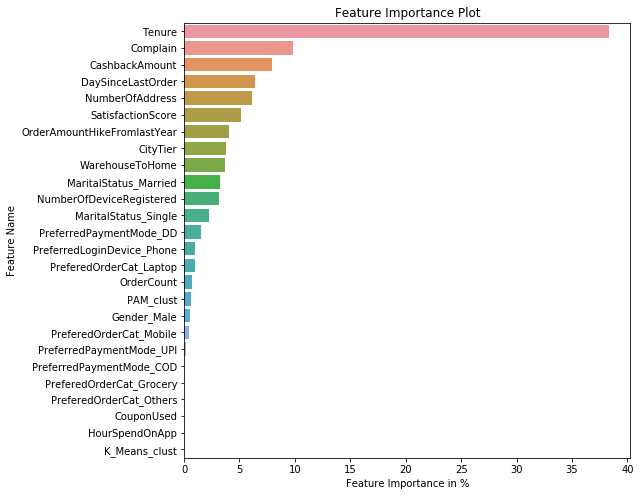

In [186]:
p = pd.DataFrame(mod12.feature_importances_*100, index=x_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(p[0], p.index,)
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
#plt.savefig('q2_Feature Importance of Variables for CART Model.png')
plt.show()

In [127]:
train_pred_mod12 = mod12.predict(x_train)
test_pred_mod12 = mod12.predict(x_test)

### (g)Classification Report for Tuned CART Model

In [207]:
# training data
print(classification_report(y_train, train_pred_mod12))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      3277
         1.0       0.81      0.70      0.75       664

    accuracy                           0.92      3941
   macro avg       0.87      0.84      0.85      3941
weighted avg       0.92      0.92      0.92      3941



In [208]:
# testing data
print(classification_report(y_test, test_pred_mod12))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      1405
         1.0       0.73      0.62      0.67       284

    accuracy                           0.90      1689
   macro avg       0.83      0.79      0.81      1689
weighted avg       0.89      0.90      0.90      1689



### (h)Confusion Matrix for Tuned CART Model

Text(0.5, 1, 'confusion matrix for tuned CART model on training data')

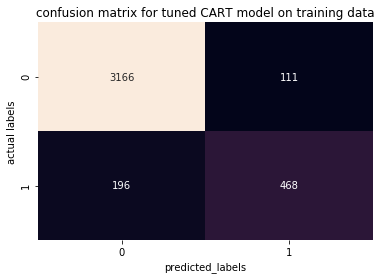

In [130]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod12), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted_labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for tuned CART model on training data')

Text(0.5, 1, 'confusion matrix for tuned CART model on testing data')

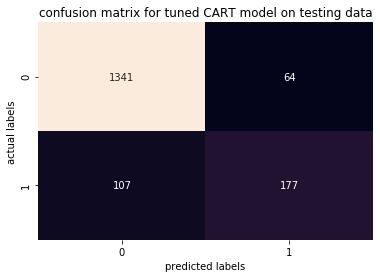

In [131]:
# testing datax
sns.heatmap(confusion_matrix(y_test, test_pred_mod12), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for tuned CART model on testing data')

### (i)Model Score for Tuned CART Model

In [211]:
# training dataset
print(mod12.score(x_train, y_train))

0.9221009895965491


In [212]:
# testing dataset
print(mod12.score(x_test, y_test))

0.8987566607460036


### (j)ROC-AUC Score for tuned CART Model

the auc score for model2 on training dataset is: 0.967


Text(0.5, 1.0, 'ROC curve for tuned CART model on training data')

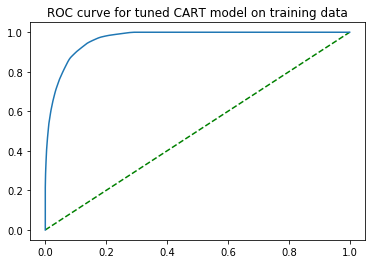

In [128]:
# training dataset
probs23 = mod12.predict_proba(x_train)
probs23 = probs23[:,1]

auc_score_mod12_train = roc_auc_score(y_train, probs23)
print('the auc score for model2 on training dataset is: %.3f' %auc_score_mod12_train)

train_tpr_mod12, train_fpr_mod12, train_thresholds_mod12 = roc_curve(y_train, probs23)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod12, train_fpr_mod12)
plt.title('ROC curve for tuned CART model on training data')

the auc score for model12 on testing dataset is: 0.928


Text(0.5, 1.0, 'ROC curve for tuned CART model on testing data')

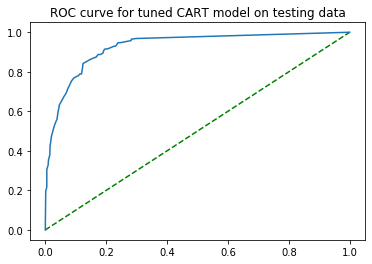

In [129]:
# testing dataset
probs24 = mod12.predict_proba(x_test)
probs24 = probs24[:,1]

auc_score_mod12_test = roc_auc_score(y_test, probs24)
print('the auc score for model12 on testing dataset is: %.3f' %auc_score_mod12_test)

test_tpr_mod12, test_fpr_mod12, test_thresholds_mod12 = roc_curve(y_test, probs24)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod12, test_fpr_mod12)
plt.title('ROC curve for tuned CART model on testing data')

# 9. Random Forest Model

## (a)Base RFCL Model

In [130]:
from sklearn.ensemble import RandomForestClassifier

mod13 = RandomForestClassifier(random_state=1)
mod13.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

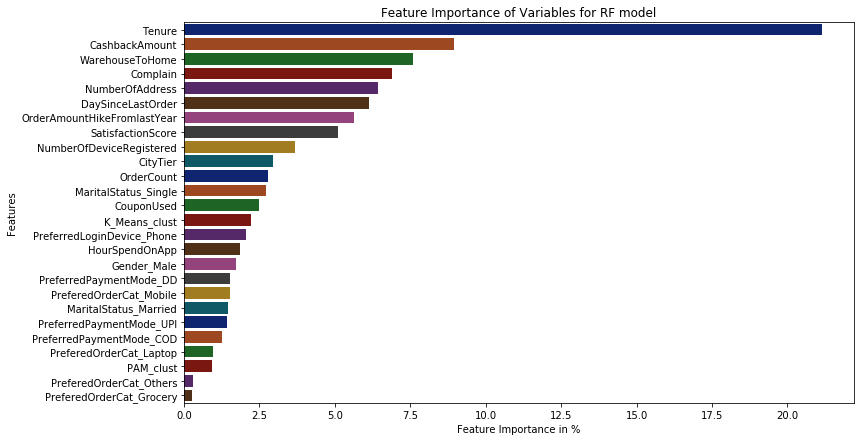

In [216]:
x=pd.DataFrame(mod13.feature_importances_*100,index=x_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance of Variables for RF model')
#plt.savefig('q2_Feature Importance of Variables for RF model.png')
plt.show()

In [131]:
train_pred_mod13 = mod13.predict(x_train) 
test_pred_mod13 = mod13.predict(x_test)

### (b)Classification Report for base RFCL Model

In [218]:
# training data
print(classification_report(y_train, train_pred_mod13))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [219]:
# testing data
print(classification_report(y_test, test_pred_mod13))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1405
         1.0       0.96      0.82      0.89       284

    accuracy                           0.96      1689
   macro avg       0.96      0.91      0.93      1689
weighted avg       0.96      0.96      0.96      1689



### (c)Confusion Matrix for base RFCL Model

Text(0.5, 1, 'confusion matrix for base RFCL model on training data')

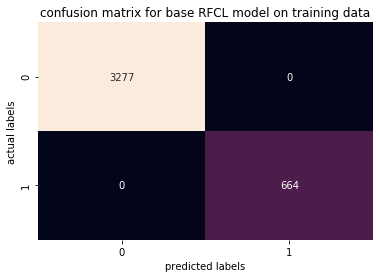

In [134]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod13), annot=True, fmt='d', cbar=False)
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base RFCL model on training data')

Text(0.5, 1, 'confusion matrix for base RFCL model on testing data')

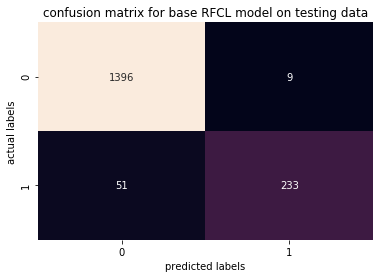

In [135]:
# testing data
sns.heatmap(confusion_matrix(y_test, test_pred_mod13), annot=True, fmt='d', cbar=False)
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base RFCL model on testing data')

### (d)Model Score for base RFCL Model

In [222]:
# training data
mod13.score(x_train, y_train)

1.0

In [223]:
# testing data
mod13.score(x_test, y_test)

0.9644760213143873

### (e)ROC AUC Score for base RFCL Model

the auc score for mod 13 on training data is: 1.000


Text(0.5, 1.0, 'ROC curve for base RFCL model on training data')

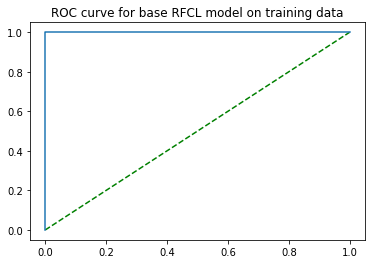

In [132]:
# training dataset
probs25 = mod13.predict_proba(x_train)
probs25 = probs25[:,1]

auc_score_mod13_train = roc_auc_score(y_train, probs25)
print('the auc score for mod 13 on training data is: %.3f' %auc_score_mod13_train)

train_tpr_mod13, train_fpr_mod13, train_thresholds_mod13 = roc_curve(y_train, probs25)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod13, train_fpr_mod13)
plt.title('ROC curve for base RFCL model on training data')

the auc score for mod13 on testing data is : 0.994


Text(0.5, 1.0, 'ROC curve for base RFCL model on testing data')

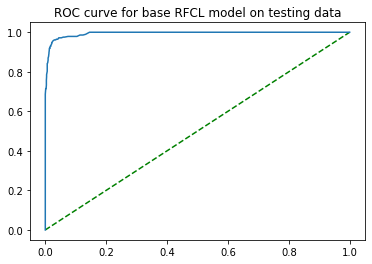

In [133]:
# testing dataset
probs26 = mod13.predict_proba(x_test)
probs26 = probs26[:,1]

auc_score_mod13_test = roc_auc_score(y_test, probs26)
print('the auc score for mod13 on testing data is : %.3f' %auc_score_mod13_test)

test_tpr_mod13, test_fpr_mod13, test_thresholds_mod13 = roc_curve(y_test, probs26)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod13, test_fpr_mod13)
plt.title('ROC curve for base RFCL model on testing data')

## (f)Tuned RFCL Model

In [226]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [7,8,9,10],
    'max_features': [14,15,16,17,18],
    'min_samples_leaf': [15,20,25,30],
    #'min_samples_split': [60,65,70],
    'n_estimators' : [401,501,601,701,801],
}

rfcl = RandomForestClassifier()
grid = GridSearchCV(estimator=rfcl, param_grid=params, cv=5, scoring='recall', verbose=3)

In [227]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()
print(f"the runtime for algo is: {end-start}")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END max_depth=7, max_features=14, min_samples_leaf=15, n_estimators=401; total time=   3.3s
[CV 2/5] END max_depth=7, max_features=14, min_samples_leaf=15, n_estimators=401; total time=   3.4s
[CV 3/5] END max_depth=7, max_features=14, min_samples_leaf=15, n_estimators=401; total time=   3.3s
[CV 4/5] END max_depth=7, max_features=14, min_samples_leaf=15, n_estimators=401; total time=   3.3s
[CV 5/5] END max_depth=7, max_features=14, min_samples_leaf=15, n_estimators=401; total time=   3.3s
[CV 1/5] END max_depth=7, max_features=14, min_samples_leaf=15, n_estimators=501; total time=   4.1s
[CV 2/5] END max_depth=7, max_features=14, min_samples_leaf=15, n_estimators=501; total time=   4.2s
[CV 3/5] END max_depth=7, max_features=14, min_samples_leaf=15, n_estimators=501; total time=   4.1s
[CV 4/5] END max_depth=7, max_features=14, min_samples_leaf=15, n_estimators=501; total time=   4.1s
[CV 5/5] END max_depth=7, m

[CV 2/5] END max_depth=7, max_features=14, min_samples_leaf=30, n_estimators=501; total time=   3.9s
[CV 3/5] END max_depth=7, max_features=14, min_samples_leaf=30, n_estimators=501; total time=   3.9s
[CV 4/5] END max_depth=7, max_features=14, min_samples_leaf=30, n_estimators=501; total time=   4.0s
[CV 5/5] END max_depth=7, max_features=14, min_samples_leaf=30, n_estimators=501; total time=   3.9s
[CV 1/5] END max_depth=7, max_features=14, min_samples_leaf=30, n_estimators=601; total time=   4.7s
[CV 2/5] END max_depth=7, max_features=14, min_samples_leaf=30, n_estimators=601; total time=   4.7s
[CV 3/5] END max_depth=7, max_features=14, min_samples_leaf=30, n_estimators=601; total time=   4.7s
[CV 4/5] END max_depth=7, max_features=14, min_samples_leaf=30, n_estimators=601; total time=   4.8s
[CV 5/5] END max_depth=7, max_features=14, min_samples_leaf=30, n_estimators=601; total time=   4.7s
[CV 1/5] END max_depth=7, max_features=14, min_samples_leaf=30, n_estimators=701; total tim

[CV 4/5] END max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=601; total time=   5.2s
[CV 5/5] END max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=601; total time=   5.5s
[CV 1/5] END max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=701; total time=   6.1s
[CV 2/5] END max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=701; total time=   6.4s
[CV 3/5] END max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=701; total time=   6.3s
[CV 4/5] END max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=701; total time=   6.3s
[CV 5/5] END max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=701; total time=   6.3s
[CV 1/5] END max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=801; total time=   7.0s
[CV 2/5] END max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=801; total time=   7.1s
[CV 3/5] END max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=801; total tim

[CV 1/5] END max_depth=7, max_features=16, min_samples_leaf=20, n_estimators=801; total time=   7.4s
[CV 2/5] END max_depth=7, max_features=16, min_samples_leaf=20, n_estimators=801; total time=   7.4s
[CV 3/5] END max_depth=7, max_features=16, min_samples_leaf=20, n_estimators=801; total time=   7.4s
[CV 4/5] END max_depth=7, max_features=16, min_samples_leaf=20, n_estimators=801; total time=   7.4s
[CV 5/5] END max_depth=7, max_features=16, min_samples_leaf=20, n_estimators=801; total time=   8.0s
[CV 1/5] END max_depth=7, max_features=16, min_samples_leaf=25, n_estimators=401; total time=   3.7s
[CV 2/5] END max_depth=7, max_features=16, min_samples_leaf=25, n_estimators=401; total time=   3.6s
[CV 3/5] END max_depth=7, max_features=16, min_samples_leaf=25, n_estimators=401; total time=   3.6s
[CV 4/5] END max_depth=7, max_features=16, min_samples_leaf=25, n_estimators=401; total time=   3.6s
[CV 5/5] END max_depth=7, max_features=16, min_samples_leaf=25, n_estimators=401; total tim

[CV 3/5] END max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=401; total time=   3.8s
[CV 4/5] END max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=401; total time=   3.9s
[CV 5/5] END max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=401; total time=   3.8s
[CV 1/5] END max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=501; total time=   4.8s
[CV 2/5] END max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=501; total time=   5.0s
[CV 3/5] END max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=501; total time=   5.0s
[CV 4/5] END max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=501; total time=   4.8s
[CV 5/5] END max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=501; total time=   4.8s
[CV 1/5] END max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=601; total time=   5.8s
[CV 2/5] END max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=601; total tim

[CV 5/5] END max_depth=7, max_features=18, min_samples_leaf=15, n_estimators=501; total time=   5.1s
[CV 1/5] END max_depth=7, max_features=18, min_samples_leaf=15, n_estimators=601; total time=   6.1s
[CV 2/5] END max_depth=7, max_features=18, min_samples_leaf=15, n_estimators=601; total time=   6.3s
[CV 3/5] END max_depth=7, max_features=18, min_samples_leaf=15, n_estimators=601; total time=   6.1s
[CV 4/5] END max_depth=7, max_features=18, min_samples_leaf=15, n_estimators=601; total time=   6.1s
[CV 5/5] END max_depth=7, max_features=18, min_samples_leaf=15, n_estimators=601; total time=   6.3s
[CV 1/5] END max_depth=7, max_features=18, min_samples_leaf=15, n_estimators=701; total time=   7.2s
[CV 2/5] END max_depth=7, max_features=18, min_samples_leaf=15, n_estimators=701; total time=   7.3s
[CV 3/5] END max_depth=7, max_features=18, min_samples_leaf=15, n_estimators=701; total time=   7.4s
[CV 4/5] END max_depth=7, max_features=18, min_samples_leaf=15, n_estimators=701; total tim

[CV 2/5] END max_depth=7, max_features=18, min_samples_leaf=30, n_estimators=701; total time=   6.9s
[CV 3/5] END max_depth=7, max_features=18, min_samples_leaf=30, n_estimators=701; total time=   6.7s
[CV 4/5] END max_depth=7, max_features=18, min_samples_leaf=30, n_estimators=701; total time=   6.8s
[CV 5/5] END max_depth=7, max_features=18, min_samples_leaf=30, n_estimators=701; total time=   7.0s
[CV 1/5] END max_depth=7, max_features=18, min_samples_leaf=30, n_estimators=801; total time=   7.8s
[CV 2/5] END max_depth=7, max_features=18, min_samples_leaf=30, n_estimators=801; total time=   7.8s
[CV 3/5] END max_depth=7, max_features=18, min_samples_leaf=30, n_estimators=801; total time=   7.7s
[CV 4/5] END max_depth=7, max_features=18, min_samples_leaf=30, n_estimators=801; total time=   7.8s
[CV 5/5] END max_depth=7, max_features=18, min_samples_leaf=30, n_estimators=801; total time=   7.8s
[CV 1/5] END max_depth=8, max_features=14, min_samples_leaf=15, n_estimators=401; total tim

[CV 4/5] END max_depth=8, max_features=14, min_samples_leaf=25, n_estimators=801; total time=   6.9s
[CV 5/5] END max_depth=8, max_features=14, min_samples_leaf=25, n_estimators=801; total time=   6.8s
[CV 1/5] END max_depth=8, max_features=14, min_samples_leaf=30, n_estimators=401; total time=   3.4s
[CV 2/5] END max_depth=8, max_features=14, min_samples_leaf=30, n_estimators=401; total time=   3.5s
[CV 3/5] END max_depth=8, max_features=14, min_samples_leaf=30, n_estimators=401; total time=   3.3s
[CV 4/5] END max_depth=8, max_features=14, min_samples_leaf=30, n_estimators=401; total time=   3.3s
[CV 5/5] END max_depth=8, max_features=14, min_samples_leaf=30, n_estimators=401; total time=   3.3s
[CV 1/5] END max_depth=8, max_features=14, min_samples_leaf=30, n_estimators=501; total time=   4.1s
[CV 2/5] END max_depth=8, max_features=14, min_samples_leaf=30, n_estimators=501; total time=   4.2s
[CV 3/5] END max_depth=8, max_features=14, min_samples_leaf=30, n_estimators=501; total tim

[CV 1/5] END max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=501; total time=   4.4s
[CV 2/5] END max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=501; total time=   4.5s
[CV 3/5] END max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=501; total time=   4.5s
[CV 4/5] END max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=501; total time=   4.5s
[CV 5/5] END max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=501; total time=   4.5s
[CV 1/5] END max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=601; total time=   5.4s
[CV 2/5] END max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=601; total time=   5.3s
[CV 3/5] END max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=601; total time=   5.2s
[CV 4/5] END max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=601; total time=   5.3s
[CV 5/5] END max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=601; total tim

[CV 3/5] END max_depth=8, max_features=16, min_samples_leaf=20, n_estimators=601; total time=   5.8s
[CV 4/5] END max_depth=8, max_features=16, min_samples_leaf=20, n_estimators=601; total time=   5.8s
[CV 5/5] END max_depth=8, max_features=16, min_samples_leaf=20, n_estimators=601; total time=   5.8s
[CV 1/5] END max_depth=8, max_features=16, min_samples_leaf=20, n_estimators=701; total time=   6.8s
[CV 2/5] END max_depth=8, max_features=16, min_samples_leaf=20, n_estimators=701; total time=   7.3s
[CV 3/5] END max_depth=8, max_features=16, min_samples_leaf=20, n_estimators=701; total time=   6.8s
[CV 4/5] END max_depth=8, max_features=16, min_samples_leaf=20, n_estimators=701; total time=   6.9s
[CV 5/5] END max_depth=8, max_features=16, min_samples_leaf=20, n_estimators=701; total time=   6.8s
[CV 1/5] END max_depth=8, max_features=16, min_samples_leaf=20, n_estimators=801; total time=   7.9s
[CV 2/5] END max_depth=8, max_features=16, min_samples_leaf=20, n_estimators=801; total tim

[CV 5/5] END max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=701; total time=   7.5s
[CV 1/5] END max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=801; total time=   8.7s
[CV 2/5] END max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=801; total time=   8.6s
[CV 3/5] END max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=801; total time=   8.3s
[CV 4/5] END max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=801; total time=   8.4s
[CV 5/5] END max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=801; total time=   8.4s
[CV 1/5] END max_depth=8, max_features=17, min_samples_leaf=20, n_estimators=401; total time=   4.0s
[CV 2/5] END max_depth=8, max_features=17, min_samples_leaf=20, n_estimators=401; total time=   4.0s
[CV 3/5] END max_depth=8, max_features=17, min_samples_leaf=20, n_estimators=401; total time=   4.0s
[CV 4/5] END max_depth=8, max_features=17, min_samples_leaf=20, n_estimators=401; total tim

[CV 2/5] END max_depth=8, max_features=18, min_samples_leaf=15, n_estimators=401; total time=   4.6s
[CV 3/5] END max_depth=8, max_features=18, min_samples_leaf=15, n_estimators=401; total time=   4.5s
[CV 4/5] END max_depth=8, max_features=18, min_samples_leaf=15, n_estimators=401; total time=   4.5s
[CV 5/5] END max_depth=8, max_features=18, min_samples_leaf=15, n_estimators=401; total time=   4.6s
[CV 1/5] END max_depth=8, max_features=18, min_samples_leaf=15, n_estimators=501; total time=   5.6s
[CV 2/5] END max_depth=8, max_features=18, min_samples_leaf=15, n_estimators=501; total time=   5.8s
[CV 3/5] END max_depth=8, max_features=18, min_samples_leaf=15, n_estimators=501; total time=   6.1s
[CV 4/5] END max_depth=8, max_features=18, min_samples_leaf=15, n_estimators=501; total time=   5.5s
[CV 5/5] END max_depth=8, max_features=18, min_samples_leaf=15, n_estimators=501; total time=   5.7s
[CV 1/5] END max_depth=8, max_features=18, min_samples_leaf=15, n_estimators=601; total tim

[CV 4/5] END max_depth=8, max_features=18, min_samples_leaf=30, n_estimators=501; total time=   5.0s
[CV 5/5] END max_depth=8, max_features=18, min_samples_leaf=30, n_estimators=501; total time=   5.0s
[CV 1/5] END max_depth=8, max_features=18, min_samples_leaf=30, n_estimators=601; total time=   6.1s
[CV 2/5] END max_depth=8, max_features=18, min_samples_leaf=30, n_estimators=601; total time=   6.0s
[CV 3/5] END max_depth=8, max_features=18, min_samples_leaf=30, n_estimators=601; total time=   6.0s
[CV 4/5] END max_depth=8, max_features=18, min_samples_leaf=30, n_estimators=601; total time=   6.2s
[CV 5/5] END max_depth=8, max_features=18, min_samples_leaf=30, n_estimators=601; total time=   6.1s
[CV 1/5] END max_depth=8, max_features=18, min_samples_leaf=30, n_estimators=701; total time=   7.0s
[CV 2/5] END max_depth=8, max_features=18, min_samples_leaf=30, n_estimators=701; total time=   7.1s
[CV 3/5] END max_depth=8, max_features=18, min_samples_leaf=30, n_estimators=701; total tim

[CV 1/5] END max_depth=9, max_features=14, min_samples_leaf=25, n_estimators=701; total time=   6.0s
[CV 2/5] END max_depth=9, max_features=14, min_samples_leaf=25, n_estimators=701; total time=   6.3s
[CV 3/5] END max_depth=9, max_features=14, min_samples_leaf=25, n_estimators=701; total time=   6.1s
[CV 4/5] END max_depth=9, max_features=14, min_samples_leaf=25, n_estimators=701; total time=   6.1s
[CV 5/5] END max_depth=9, max_features=14, min_samples_leaf=25, n_estimators=701; total time=   6.0s
[CV 1/5] END max_depth=9, max_features=14, min_samples_leaf=25, n_estimators=801; total time=   6.9s
[CV 2/5] END max_depth=9, max_features=14, min_samples_leaf=25, n_estimators=801; total time=   7.1s
[CV 3/5] END max_depth=9, max_features=14, min_samples_leaf=25, n_estimators=801; total time=   7.1s
[CV 4/5] END max_depth=9, max_features=14, min_samples_leaf=25, n_estimators=801; total time=   7.1s
[CV 5/5] END max_depth=9, max_features=14, min_samples_leaf=25, n_estimators=801; total tim

[CV 3/5] END max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=801; total time=   3.6s
[CV 4/5] END max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=801; total time=   4.6s
[CV 5/5] END max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=801; total time=   5.2s
[CV 1/5] END max_depth=9, max_features=15, min_samples_leaf=25, n_estimators=401; total time=   1.9s
[CV 2/5] END max_depth=9, max_features=15, min_samples_leaf=25, n_estimators=401; total time=   3.2s
[CV 3/5] END max_depth=9, max_features=15, min_samples_leaf=25, n_estimators=401; total time=   1.6s
[CV 4/5] END max_depth=9, max_features=15, min_samples_leaf=25, n_estimators=401; total time=   3.3s
[CV 5/5] END max_depth=9, max_features=15, min_samples_leaf=25, n_estimators=401; total time=   1.8s
[CV 1/5] END max_depth=9, max_features=15, min_samples_leaf=25, n_estimators=501; total time=   3.6s
[CV 2/5] END max_depth=9, max_features=15, min_samples_leaf=25, n_estimators=501; total tim

[CV 5/5] END max_depth=9, max_features=16, min_samples_leaf=20, n_estimators=401; total time=   3.0s
[CV 1/5] END max_depth=9, max_features=16, min_samples_leaf=20, n_estimators=501; total time=   3.6s
[CV 2/5] END max_depth=9, max_features=16, min_samples_leaf=20, n_estimators=501; total time=   4.9s
[CV 3/5] END max_depth=9, max_features=16, min_samples_leaf=20, n_estimators=501; total time=   5.0s
[CV 4/5] END max_depth=9, max_features=16, min_samples_leaf=20, n_estimators=501; total time=   5.1s
[CV 5/5] END max_depth=9, max_features=16, min_samples_leaf=20, n_estimators=501; total time=   5.0s
[CV 1/5] END max_depth=9, max_features=16, min_samples_leaf=20, n_estimators=601; total time=   6.2s
[CV 2/5] END max_depth=9, max_features=16, min_samples_leaf=20, n_estimators=601; total time=   6.2s
[CV 3/5] END max_depth=9, max_features=16, min_samples_leaf=20, n_estimators=601; total time=   4.6s
[CV 4/5] END max_depth=9, max_features=16, min_samples_leaf=20, n_estimators=601; total tim

[CV 2/5] END max_depth=9, max_features=17, min_samples_leaf=15, n_estimators=601; total time=   6.3s
[CV 3/5] END max_depth=9, max_features=17, min_samples_leaf=15, n_estimators=601; total time=   6.3s
[CV 4/5] END max_depth=9, max_features=17, min_samples_leaf=15, n_estimators=601; total time=   3.8s
[CV 5/5] END max_depth=9, max_features=17, min_samples_leaf=15, n_estimators=601; total time=   6.3s
[CV 1/5] END max_depth=9, max_features=17, min_samples_leaf=15, n_estimators=701; total time=   7.1s
[CV 2/5] END max_depth=9, max_features=17, min_samples_leaf=15, n_estimators=701; total time=   5.1s
[CV 3/5] END max_depth=9, max_features=17, min_samples_leaf=15, n_estimators=701; total time=   7.4s
[CV 4/5] END max_depth=9, max_features=17, min_samples_leaf=15, n_estimators=701; total time=   5.1s
[CV 5/5] END max_depth=9, max_features=17, min_samples_leaf=15, n_estimators=701; total time=   5.8s
[CV 1/5] END max_depth=9, max_features=17, min_samples_leaf=15, n_estimators=801; total tim

[CV 4/5] END max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=701; total time=   7.0s
[CV 5/5] END max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=701; total time=   7.1s
[CV 1/5] END max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=801; total time=   8.3s
[CV 2/5] END max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=801; total time=   8.5s
[CV 3/5] END max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=801; total time=   6.7s
[CV 4/5] END max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=801; total time=   8.1s
[CV 5/5] END max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=801; total time=   6.7s
[CV 1/5] END max_depth=9, max_features=18, min_samples_leaf=15, n_estimators=401; total time=   4.6s
[CV 2/5] END max_depth=9, max_features=18, min_samples_leaf=15, n_estimators=401; total time=   4.6s
[CV 3/5] END max_depth=9, max_features=18, min_samples_leaf=15, n_estimators=401; total tim

[CV 1/5] END max_depth=9, max_features=18, min_samples_leaf=30, n_estimators=401; total time=   3.6s
[CV 2/5] END max_depth=9, max_features=18, min_samples_leaf=30, n_estimators=401; total time=   2.3s
[CV 3/5] END max_depth=9, max_features=18, min_samples_leaf=30, n_estimators=401; total time=   4.3s
[CV 4/5] END max_depth=9, max_features=18, min_samples_leaf=30, n_estimators=401; total time=   4.3s
[CV 5/5] END max_depth=9, max_features=18, min_samples_leaf=30, n_estimators=401; total time=   4.5s
[CV 1/5] END max_depth=9, max_features=18, min_samples_leaf=30, n_estimators=501; total time=   5.1s
[CV 2/5] END max_depth=9, max_features=18, min_samples_leaf=30, n_estimators=501; total time=   5.3s
[CV 3/5] END max_depth=9, max_features=18, min_samples_leaf=30, n_estimators=501; total time=   5.4s
[CV 4/5] END max_depth=9, max_features=18, min_samples_leaf=30, n_estimators=501; total time=   5.7s
[CV 5/5] END max_depth=9, max_features=18, min_samples_leaf=30, n_estimators=501; total tim

[CV 2/5] END max_depth=10, max_features=14, min_samples_leaf=25, n_estimators=501; total time=   4.7s
[CV 3/5] END max_depth=10, max_features=14, min_samples_leaf=25, n_estimators=501; total time=   4.6s
[CV 4/5] END max_depth=10, max_features=14, min_samples_leaf=25, n_estimators=501; total time=   4.5s
[CV 5/5] END max_depth=10, max_features=14, min_samples_leaf=25, n_estimators=501; total time=   4.4s
[CV 1/5] END max_depth=10, max_features=14, min_samples_leaf=25, n_estimators=601; total time=   5.4s
[CV 2/5] END max_depth=10, max_features=14, min_samples_leaf=25, n_estimators=601; total time=   5.4s
[CV 3/5] END max_depth=10, max_features=14, min_samples_leaf=25, n_estimators=601; total time=   5.4s
[CV 4/5] END max_depth=10, max_features=14, min_samples_leaf=25, n_estimators=601; total time=   5.5s
[CV 5/5] END max_depth=10, max_features=14, min_samples_leaf=25, n_estimators=601; total time=   5.2s
[CV 1/5] END max_depth=10, max_features=14, min_samples_leaf=25, n_estimators=701;

[CV 3/5] END max_depth=10, max_features=15, min_samples_leaf=20, n_estimators=601; total time=   4.2s
[CV 4/5] END max_depth=10, max_features=15, min_samples_leaf=20, n_estimators=601; total time=   4.3s
[CV 5/5] END max_depth=10, max_features=15, min_samples_leaf=20, n_estimators=601; total time=   5.6s
[CV 1/5] END max_depth=10, max_features=15, min_samples_leaf=20, n_estimators=701; total time=   6.1s
[CV 2/5] END max_depth=10, max_features=15, min_samples_leaf=20, n_estimators=701; total time=   4.4s
[CV 3/5] END max_depth=10, max_features=15, min_samples_leaf=20, n_estimators=701; total time=   4.0s
[CV 4/5] END max_depth=10, max_features=15, min_samples_leaf=20, n_estimators=701; total time=   6.4s
[CV 5/5] END max_depth=10, max_features=15, min_samples_leaf=20, n_estimators=701; total time=   6.6s
[CV 1/5] END max_depth=10, max_features=15, min_samples_leaf=20, n_estimators=801; total time=   7.4s
[CV 2/5] END max_depth=10, max_features=15, min_samples_leaf=20, n_estimators=801;

[CV 4/5] END max_depth=10, max_features=16, min_samples_leaf=15, n_estimators=701; total time=   5.9s
[CV 5/5] END max_depth=10, max_features=16, min_samples_leaf=15, n_estimators=701; total time=   5.8s
[CV 1/5] END max_depth=10, max_features=16, min_samples_leaf=15, n_estimators=801; total time=   5.5s
[CV 2/5] END max_depth=10, max_features=16, min_samples_leaf=15, n_estimators=801; total time=   8.1s
[CV 3/5] END max_depth=10, max_features=16, min_samples_leaf=15, n_estimators=801; total time=   8.2s
[CV 4/5] END max_depth=10, max_features=16, min_samples_leaf=15, n_estimators=801; total time=   8.2s
[CV 5/5] END max_depth=10, max_features=16, min_samples_leaf=15, n_estimators=801; total time=   8.1s
[CV 1/5] END max_depth=10, max_features=16, min_samples_leaf=20, n_estimators=401; total time=   3.8s
[CV 2/5] END max_depth=10, max_features=16, min_samples_leaf=20, n_estimators=401; total time=   2.8s
[CV 3/5] END max_depth=10, max_features=16, min_samples_leaf=20, n_estimators=401;

[CV 5/5] END max_depth=10, max_features=16, min_samples_leaf=30, n_estimators=801; total time=   7.1s
[CV 1/5] END max_depth=10, max_features=17, min_samples_leaf=15, n_estimators=401; total time=   1.9s
[CV 2/5] END max_depth=10, max_features=17, min_samples_leaf=15, n_estimators=401; total time=   4.1s
[CV 3/5] END max_depth=10, max_features=17, min_samples_leaf=15, n_estimators=401; total time=   2.2s
[CV 4/5] END max_depth=10, max_features=17, min_samples_leaf=15, n_estimators=401; total time=   3.7s
[CV 5/5] END max_depth=10, max_features=17, min_samples_leaf=15, n_estimators=401; total time=   4.2s
[CV 1/5] END max_depth=10, max_features=17, min_samples_leaf=15, n_estimators=501; total time=   5.3s
[CV 2/5] END max_depth=10, max_features=17, min_samples_leaf=15, n_estimators=501; total time=   5.3s
[CV 3/5] END max_depth=10, max_features=17, min_samples_leaf=15, n_estimators=501; total time=   5.4s
[CV 4/5] END max_depth=10, max_features=17, min_samples_leaf=15, n_estimators=501;

[CV 1/5] END max_depth=10, max_features=17, min_samples_leaf=30, n_estimators=501; total time=   4.8s
[CV 2/5] END max_depth=10, max_features=17, min_samples_leaf=30, n_estimators=501; total time=   4.8s
[CV 3/5] END max_depth=10, max_features=17, min_samples_leaf=30, n_estimators=501; total time=   5.0s
[CV 4/5] END max_depth=10, max_features=17, min_samples_leaf=30, n_estimators=501; total time=   4.9s
[CV 5/5] END max_depth=10, max_features=17, min_samples_leaf=30, n_estimators=501; total time=   4.8s
[CV 1/5] END max_depth=10, max_features=17, min_samples_leaf=30, n_estimators=601; total time=   5.9s
[CV 2/5] END max_depth=10, max_features=17, min_samples_leaf=30, n_estimators=601; total time=   5.8s
[CV 3/5] END max_depth=10, max_features=17, min_samples_leaf=30, n_estimators=601; total time=   5.9s
[CV 4/5] END max_depth=10, max_features=17, min_samples_leaf=30, n_estimators=601; total time=   5.9s
[CV 5/5] END max_depth=10, max_features=17, min_samples_leaf=30, n_estimators=601;

[CV 2/5] END max_depth=10, max_features=18, min_samples_leaf=25, n_estimators=601; total time=   6.3s
[CV 3/5] END max_depth=10, max_features=18, min_samples_leaf=25, n_estimators=601; total time=   6.2s
[CV 4/5] END max_depth=10, max_features=18, min_samples_leaf=25, n_estimators=601; total time=   6.3s
[CV 5/5] END max_depth=10, max_features=18, min_samples_leaf=25, n_estimators=601; total time=   6.2s
[CV 1/5] END max_depth=10, max_features=18, min_samples_leaf=25, n_estimators=701; total time=   7.3s
[CV 2/5] END max_depth=10, max_features=18, min_samples_leaf=25, n_estimators=701; total time=   4.8s
[CV 3/5] END max_depth=10, max_features=18, min_samples_leaf=25, n_estimators=701; total time=   4.8s
[CV 4/5] END max_depth=10, max_features=18, min_samples_leaf=25, n_estimators=701; total time=   7.2s
[CV 5/5] END max_depth=10, max_features=18, min_samples_leaf=25, n_estimators=701; total time=   7.4s
[CV 1/5] END max_depth=10, max_features=18, min_samples_leaf=25, n_estimators=801;

In [228]:
grid.best_params_

{'max_depth': 9,
 'max_features': 16,
 'min_samples_leaf': 15,
 'n_estimators': 401}

In [229]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, max_features=16, min_samples_leaf=15,
                       n_estimators=401)

In [134]:
mod14 = RandomForestClassifier(max_depth=9, max_features=16, min_samples_leaf=15,
                       n_estimators=401, random_state=1)
mod14.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_features=16, min_samples_leaf=15,
                       n_estimators=401, random_state=1)

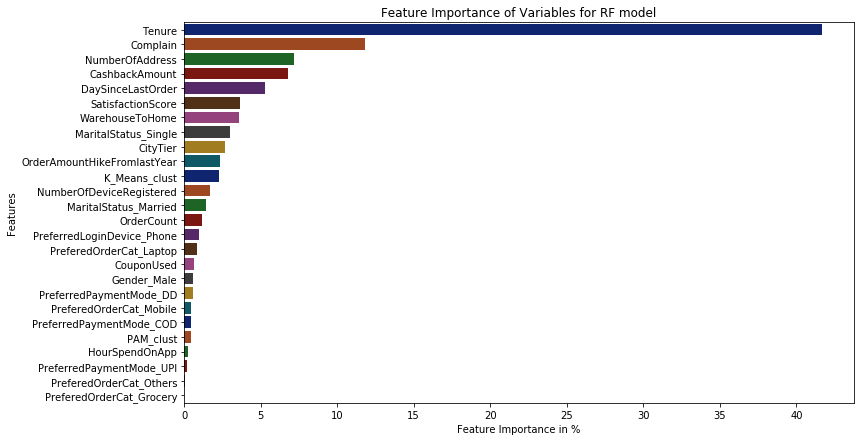

In [148]:
x=pd.DataFrame(mod14.feature_importances_*100,index=x_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance of Variables for RF model')
#plt.savefig('q2_Feature Importance of Variables for RF model.png')
plt.show()

In [135]:
train_pred_mod14 = mod14.predict(x_train)
test_pred_mod14 = mod14.predict(x_test)

### (g)Classification Report for Tuned RFCL Model

In [150]:
# training dataset
print(classification_report(y_train, train_pred_mod14))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      3277
         1.0       0.86      0.66      0.74       664

    accuracy                           0.92      3941
   macro avg       0.90      0.82      0.85      3941
weighted avg       0.92      0.92      0.92      3941



In [151]:
# testing dataset
print(classification_report(y_test, test_pred_mod14))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1405
         1.0       0.81      0.59      0.68       284

    accuracy                           0.91      1689
   macro avg       0.87      0.78      0.81      1689
weighted avg       0.90      0.91      0.90      1689



### (h)Confusion Matrix for Tuned RFCL Model

Text(0.5, 1, 'confusion matrix for tuned RFCL model on training data')

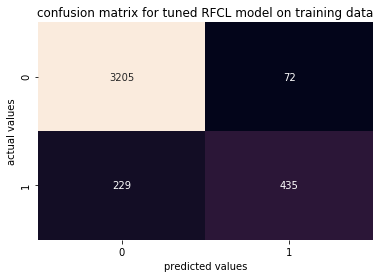

In [152]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod14), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('confusion matrix for tuned RFCL model on training data')

Text(0.5, 1, 'confusion matrix for tuned RFCL model on testing data')

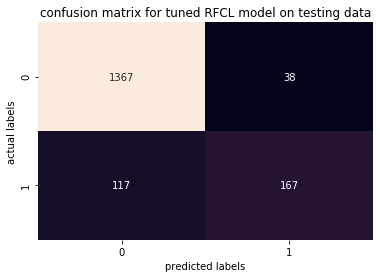

In [153]:
# testing data
sns.heatmap(confusion_matrix(y_test, test_pred_mod14), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for tuned RFCL model on testing data')

### (i)Model Score for Tuned RFCL Model

In [326]:
# training data
mod14.score(x_train, y_train)

0.9264146155798021

In [327]:
mod14.score(x_test, y_test)

0.9123741859088218

### (j)ROC-AUC Score for Tuned RFCL Model

the auc score for mod14 on training dataset is: 0.966


Text(0.5, 1.0, 'ROC curve for tuned RFCL model on training data')

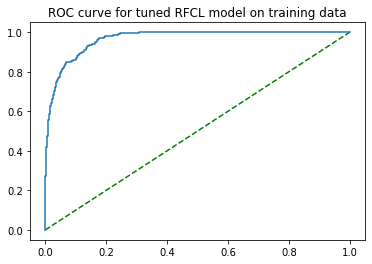

In [136]:
# training dataset
probs27 = mod14.predict_proba(x_train)
probs27 = probs27[:,1]

auc_score_mod14_train = roc_auc_score(y_train, probs27)
print('the auc score for mod14 on training dataset is: %.3f' %auc_score_mod14_train)

train_tpr_mod14, train_fpr_mod14, train_thresholds_mod14 = roc_curve(y_train, probs27)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod14, train_fpr_mod14)
plt.title('ROC curve for tuned RFCL model on training data')

the auc score for mod14 on testing dataset is: 0.945


Text(0.5, 1.0, 'ROC curve for tuned RFCL model on testing data')

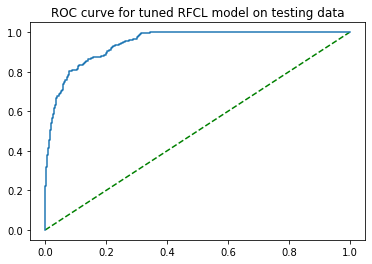

In [137]:
# testing dataset
probs28 = mod14.predict_proba(x_test)
probs28 = probs28[:,1]

auc_score_mod14_test = roc_auc_score(y_test, probs28)
print('the auc score for mod14 on testing dataset is: %.3f' %auc_score_mod14_test)

test_tpr_mod14, test_fpr_mod14, test_thresholds_mod14 = roc_curve(y_test, probs28)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod14, test_fpr_mod14)
plt.title('ROC curve for tuned RFCL model on testing data')

# 10. K-Nearest Neighbours Model

## (a)Base KNN Model

In [138]:
from sklearn.neighbors import KNeighborsClassifier

mod15 = KNeighborsClassifier()
mod15.fit(x_train,y_train)

KNeighborsClassifier()

In [139]:
train_pred_mod15 = mod15.predict(x_train)
test_pred_mod15 = mod15.predict(x_test)

### (b)Classification Report for Base KNN Model

In [243]:
#training dataset
print(classification_report(y_train, train_pred_mod15))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3277
         1.0       0.96      0.84      0.89       664

    accuracy                           0.97      3941
   macro avg       0.96      0.92      0.94      3941
weighted avg       0.97      0.97      0.97      3941



In [244]:
#testing dataset
print(classification_report(y_test, test_pred_mod15))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1405
         1.0       0.85      0.56      0.68       284

    accuracy                           0.91      1689
   macro avg       0.89      0.77      0.81      1689
weighted avg       0.91      0.91      0.90      1689



### (c)Confusion Matrix for Base KNN Model

Text(0.5, 1, 'confusion matrix for base KNN model on training data')

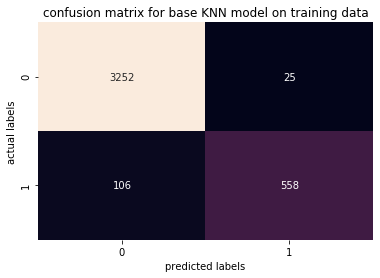

In [156]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod15), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base KNN model on training data')

Text(0.5, 1, 'confusion matrix for base KNN model on testing data')

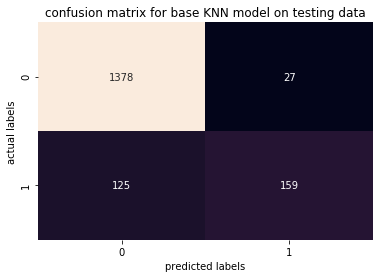

In [157]:
# testing data
sns.heatmap(confusion_matrix(y_test, test_pred_mod15), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base KNN model on testing data')

### (d)Model Score for Base KNN Model

In [247]:
# training data
mod15.score(x_train, y_train)

0.9667597056584624

In [248]:
# training data
mod15.score(x_train, y_train)

0.9667597056584624

### (e)ROC-AUC Score for Base KNN Model

the auc score for mod15 on training dataset is: 0.992


Text(0.5, 1.0, 'ROC curve for base KNN model on training data')

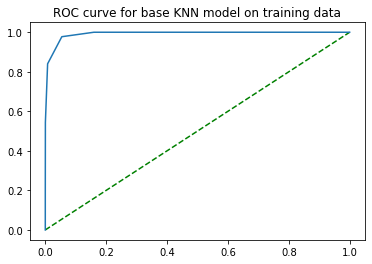

In [140]:
# training dataset
probs29 = mod15.predict_proba(x_train)
probs29 = probs29[:,1]

auc_score_mod15_train = roc_auc_score(y_train, probs29)
print('the auc score for mod15 on training dataset is: %.3f' %auc_score_mod15_train)

train_tpr_mod15, train_fpr_mod15, train_thresholds_mod15 = roc_curve(y_train,probs29)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod15, train_fpr_mod15)
plt.title('ROC curve for base KNN model on training data')

the auc score for mod15 on testing dataset is: 0.955


Text(0.5, 1.0, 'ROC curve for base KNN model on testing data')

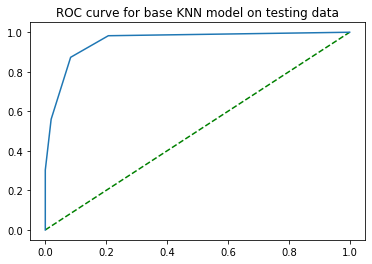

In [141]:
# testing dataset
probs30 = mod15.predict_proba(x_test)
probs30 = probs30[:,1]

auc_score_mod15_test = roc_auc_score(y_test, probs30)
print('the auc score for mod15 on testing dataset is: %.3f' %auc_score_mod15_test)

test_tpr_mod15, test_fpr_mod15, test_thresholds_mod15 = roc_curve(y_test,probs30)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod15, test_fpr_mod15)
plt.title('ROC curve for base KNN model on testing data')

## (f)Tuned KNN Model

In [251]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors' : [2,3,5,7,],  #9,11
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [15,20,25,30,35],
    'metric' :['minkowski','euclidean','manhattan','chebyshev']
    }
knn_model =  KNeighborsClassifier(n_jobs=-1)
grid = GridSearchCV(estimator = knn_model, param_grid=params, cv=5, scoring='recall', verbose=3)

In [252]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV 1/5] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.4s
[CV 2/5] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_siz

[CV 4/5] END algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=15, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=15, metric=manhattan, n_neighbors=2, weights=uniform; total 

[CV 2/5] END algorithm=auto, leaf_size=15, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=15, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=15, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=15, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=15, metric=chebyshev, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=15, metric=chebyshev, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=15, metric=chebyshev, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=15, metric=chebyshev, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=15, metric=chebyshev, n_neighbors=7, weights=uniform; total t

[CV 5/5] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, weights=distance; total t

[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=5, weights=uniform; total 

[CV 1/5] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.2s
[CV 2/5] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=3, weights=uniform; total 

[CV 4/5] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=25, metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=25, metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=25, metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=25, metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=25, metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=25, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=25, metric=chebyshev, n_neighbors=2, weights=distance; total t

[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, weights=distance; total 

[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=7, weights=uniform; total 

[CV 3/5] END algorithm=auto, leaf_size=35, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=35, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=35, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=35, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 2/5] END algorithm=auto, leaf_size=35, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=35, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=auto, leaf_size=35, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=auto, leaf_size=35, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=35, metric=minkowski, n_neighbors=5, weights=distance; total t

[CV 1/5] END algorithm=auto, leaf_size=35, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=35, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=35, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=35, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=35, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=35, metric=manhattan, n_neighbors=3, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=35, metric=manhattan, n_neighbors=3, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=35, metric=manhattan, n_neighbors=3, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=35, metric=manhattan, n_neighbors=3, weights=distance; total t

[CV 5/5] END algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, metric=mink

[CV 1/5] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, metric=manh

[CV 2/5] END algorithm=ball_tree, leaf_size=15, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, metric=chebyshev, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, metric=chebyshev, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, metric=chebyshev, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, metric=chebyshev, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, metric=cheby

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=eucli

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=cheby

[CV 2/5] END algorithm=ball_tree, leaf_size=25, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, metric=eucli

[CV 2/5] END algorithm=ball_tree, leaf_size=25, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, metric=manha

[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minko

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhat

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=35, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, metric=minkow

[CV 4/5] END algorithm=ball_tree, leaf_size=35, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=35, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=35, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, metric=euclid

[CV 5/5] END algorithm=ball_tree, leaf_size=35, metric=chebyshev, n_neighbors=3, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=35, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, metric=chebys

[CV 1/5] END algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=3

[CV 3/5] END algorithm=kd_tree, leaf_size=15, metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, metric=chebyshev, n_neighbors

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors

[CV 2/5] END algorithm=kd_tree, leaf_size=25, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, metric=minkowski, n_neighbors=

[CV 4/5] END algorithm=kd_tree, leaf_size=25, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, metric=manhattan, n_neighbors=3

[CV 5/5] END algorithm=kd_tree, leaf_size=25, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=2

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=

[CV 3/5] END algorithm=kd_tree, leaf_size=35, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, metric=euclidean, n_neighbors

[CV 4/5] END algorithm=kd_tree, leaf_size=35, metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, metric=chebyshev, n_neighbors

[CV 1/5] END algorithm=brute, leaf_size=15, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=15, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=15, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=15, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=15, metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=15, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=15, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=15, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=15, metric=euclidean, n_neighbors=2, weights=unifor

[CV 5/5] END algorithm=brute, leaf_size=15, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=15, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=15, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=15, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=15, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=15, metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=15, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=15, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=15, metric=manhattan, n_neighbors=7, weights=distance

[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=7, weights=unifor

[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=3, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=3, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=3, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=3, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=3, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, weights=unifor

[CV 4/5] END algorithm=brute, leaf_size=25, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=25, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=25, metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=25, metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=25, metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=25, metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=25, metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=25, metric=minkowski, n_neighbors=3, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=25, metric=minkowski, n_neighbors=3, weights=distance

[CV 3/5] END algorithm=brute, leaf_size=25, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=25, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=25, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=25, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=25, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=25, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=25, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=25, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=25, metric=manhattan, n_neighbors=3, weights=unifor

[CV 2/5] END algorithm=brute, leaf_size=25, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=25, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=25, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=25, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform

[CV 5/5] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=7, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=7, weights=distance

[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=7, weights=unifor

[CV 1/5] END algorithm=brute, leaf_size=35, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=35, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=35, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=35, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=35, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=35, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=35, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=35, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=35, metric=euclidean, n_neighbors=5, weights=unifor

[CV 4/5] END algorithm=brute, leaf_size=35, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=35, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=35, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=35, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=35, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=35, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=35, metric=chebyshev, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=35, metric=chebyshev, n_neighbors=3, weights=distance; total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=35, metric=chebyshev, n_neighbors=3, weights=distance

In [253]:
print('the time for algo execution is: {}'.format(end-start))

the time for algo execution is: 637.4637336730957


In [254]:
grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 15,
 'metric': 'minkowski',
 'n_neighbors': 2,
 'weights': 'distance'}

In [255]:
grid.best_estimator_

KNeighborsClassifier(leaf_size=15, n_jobs=-1, n_neighbors=2, weights='distance')

In [142]:
mod16 = KNeighborsClassifier(leaf_size=15, n_jobs=-1, n_neighbors=2, weights='distance')
mod16.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=15, n_jobs=-1, n_neighbors=2, weights='distance')

In [143]:
train_pred_mod16 = mod16.predict(x_train)
test_pred_mod16 = mod16.predict(x_test)

### (g)Classification Report for Tuned KNN Model

In [258]:
# training data
print(classification_report(y_train, train_pred_mod16))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [259]:
# testing data
print(classification_report(y_test, test_pred_mod16))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1405
         1.0       0.91      0.89      0.90       284

    accuracy                           0.97      1689
   macro avg       0.94      0.94      0.94      1689
weighted avg       0.97      0.97      0.97      1689



### (h)Confusion Matrix for Tuned KNN Model

Text(0.5, 1, 'confusion matrix for tuned KNN model on training data')

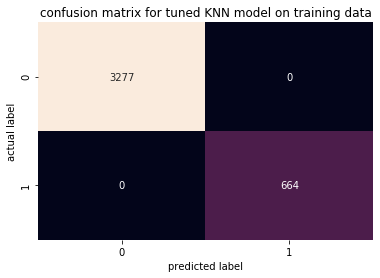

In [160]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod16), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned KNN model on training data')

Text(0.5, 1, 'confusion matrix for tuned KNN model on testing data')

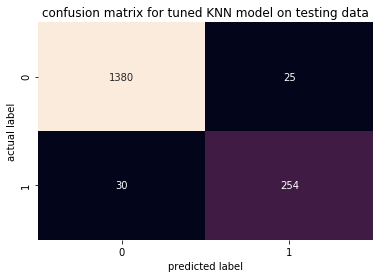

In [161]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod16), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned KNN model on testing data')

### (i)Model Score for Tuned KNN Model

In [262]:
# trianing dataset
mod16.score(x_train , y_train)

1.0

In [263]:
# testing dataset
mod16.score(x_test, y_test)

0.9674363528715216

### (j)ROC-AUC Score for Tuned KNN Model

the auc score for mod16 on training dataset is: 1.000


Text(0.5, 1.0, 'ROC curve for tuned KNN model on training data')

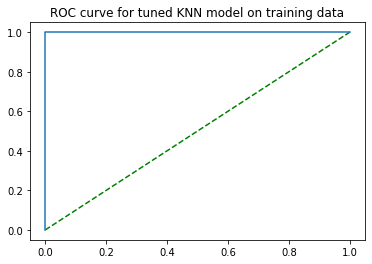

In [144]:
# training dataset
probs31 = mod16.predict_proba(x_train)
probs31 = probs31[:,1]

auc_score_mod16_train = roc_auc_score(y_train, probs31)
print('the auc score for mod16 on training dataset is: %.3f' %auc_score_mod16_train)

train_tpr_mod16, train_fpr_mod16, train_thresholds_mod16 = roc_curve(y_train, probs31)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod16, train_fpr_mod16)
plt.title('ROC curve for tuned KNN model on training data')

the auc score for mod16 on testing dataset is: 0.958


Text(0.5, 1.0, 'ROC curve for tuned KNN model on testing data')

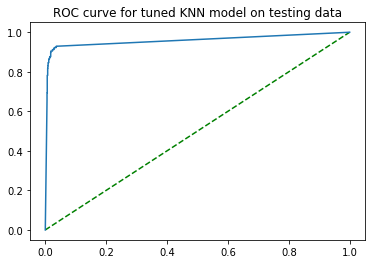

In [145]:
# testing dataset
probs32 = mod16.predict_proba(x_test)
probs32 = probs32[:,1]

auc_score_mod16_test = roc_auc_score(y_test, probs32)
print('the auc score for mod16 on testing dataset is: %.3f' %auc_score_mod16_test)

test_tpr_mod16, test_fpr_mod16, test_thresholds_mod16 = roc_curve(y_test, probs32)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod16, test_fpr_mod16)
plt.title('ROC curve for tuned KNN model on testing data')

# 11. XGBoost Model

## (a)Base XGBoost Model

In [146]:
import xgboost as xgb

mod17=xgb.XGBClassifier(random_state=1, use_label_encoder=False)
mod17.fit(x_train, y_train)

[16:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [147]:
mod17.get_booster().get_score(importance_type='weight')

{'Tenure': 230,
 'Complain': 88,
 'NumberOfAddress': 186,
 'DaySinceLastOrder': 169,
 'WarehouseToHome': 326,
 'PreferredPaymentMode_COD': 47,
 'NumberOfDeviceRegistered': 95,
 'OrderAmountHikeFromlastYear': 281,
 'PAM_clust': 13,
 'PreferredPaymentMode_UPI': 33,
 'CashbackAmount': 521,
 'MaritalStatus_Single': 77,
 'SatisfactionScore': 200,
 'OrderCount': 74,
 'CityTier': 87,
 'PreferedOrderCat_Laptop': 45,
 'PreferredPaymentMode_DD': 69,
 'PreferredLoginDevice_Phone': 69,
 'MaritalStatus_Married': 31,
 'Gender_Male': 75,
 'CouponUsed': 47,
 'K_Means_clust': 27,
 'PreferedOrderCat_Mobile': 10,
 'HourSpendOnApp': 58,
 'PreferedOrderCat_Others': 17,
 'PreferedOrderCat_Grocery': 1}

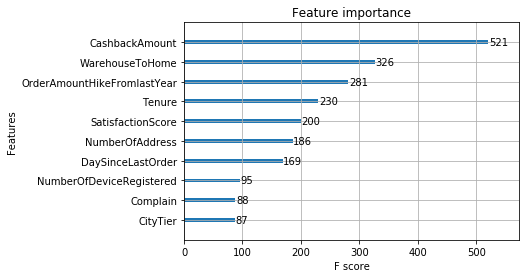

In [148]:
from xgboost import plot_importance
plot_importance(mod17, max_num_features=10)

In [149]:
train_pred_mod17 = mod17.predict(x_train)
test_pred_mod17 = mod17.predict(x_test)

### (b)Classification Report for Base XGBoost Model

In [268]:
#training dataset
print(classification_report(y_train, train_pred_mod17))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [269]:
#testing dataset
print(classification_report(y_test, test_pred_mod17))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1405
         1.0       0.94      0.88      0.91       284

    accuracy                           0.97      1689
   macro avg       0.96      0.94      0.95      1689
weighted avg       0.97      0.97      0.97      1689



### (c)Confusion Matrix for Base XGBoost Model

Text(0.5, 1, 'confusion matrix for base XGBoost model on training data')

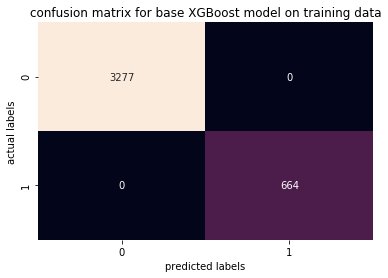

In [164]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod17), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base XGBoost model on training data')

Text(0.5, 1, 'confusion matrix for base XGBoost model on testing data')

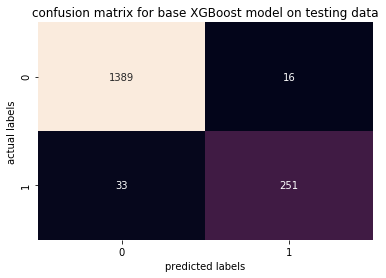

In [165]:
# testing data
sns.heatmap(confusion_matrix(y_test, test_pred_mod17), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base XGBoost model on testing data')

### (d)Model Score for base XGBoost Model

In [272]:
# training data
mod17.score(x_train, y_train)

1.0

In [273]:
# testing data
mod17.score(x_test, y_test)

0.9709887507400828

### (e)ROC-AUC Score for Base XGBoost Model

the auc score for mod17 on training dataset is: 1.000


Text(0.5, 1.0, 'ROC curve for base XGBoost model on training data')

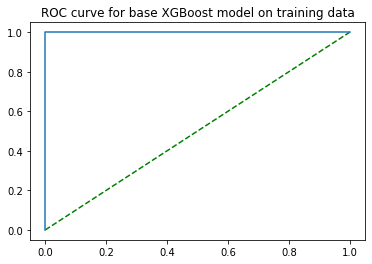

In [150]:
# training dataset
probs33 = mod17.predict_proba(x_train)
probs33 = probs33[:,1]

auc_score_mod17_train = roc_auc_score(y_train, probs33)
print('the auc score for mod17 on training dataset is: %.3f' %auc_score_mod17_train)

train_tpr_mod17, train_fpr_mod17, train_thresholds_mod17 = roc_curve(y_train,probs33)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod17, train_fpr_mod17)
plt.title('ROC curve for base XGBoost model on training data')

the auc score for mod17 on testing dataset is: 0.992


Text(0.5, 1.0, 'ROC curve for base XGBoost model on testing data')

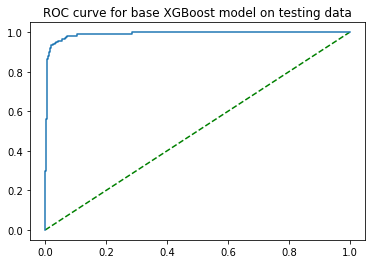

In [151]:
# testing dataset
probs34 = mod17.predict_proba(x_test)
probs34 = probs34[:,1]

auc_score_mod17_test = roc_auc_score(y_test, probs34)
print('the auc score for mod17 on testing dataset is: %.3f' %auc_score_mod17_test)

test_tpr_mod17, test_fpr_mod17, test_thresholds_mod17 = roc_curve(y_test,probs34)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod17, test_fpr_mod17)
plt.title('ROC curve for base XGBoost model on testing data')

## (f)Tuned XGBoost Model

In [279]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = {
    'colsample_bytree': [0.5, 0.7],  #0.3
    'learning_rate': [0.2,0.1,],      #0.01
    'max_depth': [7,8,9,10],         
    'min_child_weight' : [1,2,3,5],
    'n_estimators' : [1000,1100 ,1200, 1300],
    'subsample': [0.3,0.5, 0.7],
    
    }
   
xgb =  xgb.XGBClassifier(random_state = 1, use_label_encoder=False, booster='gbtree', eval_metric='logloss')
grid = GridSearchCV(estimator = xgb, param_grid=params, cv=5, scoring='recall', verbose=3)

In [280]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.4s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.0s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.4s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   2.9s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.0s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1000, subsample=0.5; total time=   3.4s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimat

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   4.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   2.9s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   2.7s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   2.9s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   2.7s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   3.0s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.5; total time=   3.2s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   3.8s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   4.0s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   2.7s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   3.0s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   2.7s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   2.8s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   2.6s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   4.0s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   4.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   4.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.7s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.8s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.5s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.6s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   3.7s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   4.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   4.0s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   3.6s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.0s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   2.8s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.2s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   4.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   4.0s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   4.3s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   4.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   4.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   2.7s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   3.0s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1300, subsample=0.5; total time=   4.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   4.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   4.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   4.0s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   3.9s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   4.0s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   2.9s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1300, subsample=0.5; total time=   3.9s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1300, subsample=0.5; total time=   4.0s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   3.9s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   4.0s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   3.9s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   3.9s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   4.1s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1300, subsample=0.5; total time=   3.7s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1300, subsample=0.5; total time=   4.0s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1300, subsample=0.5; total time=   3.6s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   4.0s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   3.9s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   3.7s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   3.8s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1300, subsample=0.5; total time=   4.4s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1300, subsample=0.5; total time=   4.4s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1300, subsample=0.5; total time=   4.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1300, subsample=0.5; total time=   4.0s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   4.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   4.4s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   4.4s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1300, subsample=0.5; total time=   4.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1300, subsample=0.5; total time=   3.9s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1300, subsample=0.5; total time=   3.8s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1300, subsample=0.5; total time=   4.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1300, subsample=0.5; total time=   3.9s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   3.9s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   4.1s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1300, subsample=0.3; total time=   3.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1300, subsample=0.5; total time=   3.8s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1300, subsample=0.5; total time=   3.9s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1300, subsample=0.5; total time=   3.8s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1300, subsample=0.5; total time=   3.9s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1300, subsample=0.5; total time=   3.9s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   3.8s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1300, subsample=0.3; total time=   3.5s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1300, subsample=0.3; total time=   3.7s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1300, subsample=0.5; total time=   4.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1300, subsample=0.5; total time=   3.8s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1300, subsample=0.5; total time=   3.6s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1300, subsample=0.5; total time=   3.8s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1300, subsample=0.5; total time=   3.9s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1300, subsample=0.3; total time=   3.7s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1300, subsample=0.3; total time=   3.7s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1300, subsample=0.3; total time=   3.5s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1300, subsample=0.5; total time=   4.4s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1300, subsample=0.5; total time=   4.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1300, subsample=0.5; total time=   4.0s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1300, subsample=0.5; total time=   4.1s
[CV 5/5] END 

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1300, subsample=0.3; total time=   3.6s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1300, subsample=0.3; total time=   3.6s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1300, subsample=0.3; total time=   3.5s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1300, subsample=0.3; total time=   3.7s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1300, subsample=0.5; total time=   3.8s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1300, subsample=0.5; total time=   4.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1300, subsample=0.5; total time=   4.1s
[CV 4/5] END 

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.3; total time=   3.5s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.3; total time=   3.6s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.3; total time=   3.5s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.3; total time=   3.3s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.3; total time=   3.5s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.5; total time=   4.0s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.5; total time=   3.8s
[CV 3/5] END 

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   3.7s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.3; total time=   3.4s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.3; total time=   3.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.3; total time=   3.5s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.3; total time=   3.3s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.3; total time=   3.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.5; total time=   3.8s
[CV 2/5] END 

[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=   4.6s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=   4.6s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1300, subsample=0.3; total time=   4.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1300, subsample=0.3; total time=   4.3s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1300, subsample=0.3; total time=   4.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1300, subsample=0.3; total time=   4.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1300, subsample=0.3; total time=   4.2s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1200, subsample=0.7; total time=   4.4s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1200, subsample=0.7; total time=   4.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1200, subsample=0.7; total time=   4.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1300, subsample=0.3; total time=   4.0s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1300, subsample=0.3; total time=   4.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1300, subsample=0.3; total time=   3.9s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1300, subsample=0.3; total time=   3.9s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1200, subsample=0.7; total time=   4.3s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1200, subsample=0.7; total time=   4.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1200, subsample=0.7; total time=   4.0s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1200, subsample=0.7; total time=   4.5s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1300, subsample=0.3; total time=   4.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1300, subsample=0.3; total time=   4.0s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1300, subsample=0.3; total time=   4.3s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   4.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   3.9s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   4.0s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   4.0s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   4.0s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1300, subsample=0.3; total time=   3.5s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1300, subsample=0.3; total time=   3.4s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1200, subsample=0.5; total time=   4.6s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=   4.5s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=   4.5s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=   4.8s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=   4.5s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=   4.5s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1300, subsample=0.3; total time=   4.1s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1200, subsample=0.5; total time=   4.0s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1200, subsample=0.5; total time=   4.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1200, subsample=0.7; total time=   4.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1200, subsample=0.7; total time=   4.5s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1200, subsample=0.7; total time=   4.3s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1200, subsample=0.7; total time=   4.3s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1200, subsample=0.7; total time=   4.3s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1200, subsample=0.5; total time=   4.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1200, subsample=0.5; total time=   4.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1200, subsample=0.5; total time=   3.9s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1200, subsample=0.7; total time=   4.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1200, subsample=0.7; total time=   4.6s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1200, subsample=0.7; total time=   4.6s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1200, subsample=0.7; total time=   4.4s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1200, subsample=0.5; total time=   3.8s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1200, subsample=0.5; total time=   4.0s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1200, subsample=0.5; total time=   3.7s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1200, subsample=0.5; total time=   3.8s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   4.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   4.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   4.1s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1200, subsample=0.5; total time=   4.4s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1200, subsample=0.5; total time=   4.6s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1200, subsample=0.5; total time=   4.4s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1200, subsample=0.5; total time=   4.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1200, subsample=0.5; total time=   4.4s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=   4.9s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=   4.6s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1200, subsample=0.3; total time=   3.8s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1200, subsample=0.5; total time=   4.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1200, subsample=0.5; total time=   4.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1200, subsample=0.5; total time=   4.5s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1200, subsample=0.5; total time=   4.6s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1200, subsample=0.5; total time=   4.5s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1200, subsample=0.7; total time=   4.4s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1200, subsample=0.3; total time=   3.7s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1200, subsample=0.3; total time=   3.6s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1200, subsample=0.5; total time=   4.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1200, subsample=0.5; total time=   4.3s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1200, subsample=0.5; total time=   4.4s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1200, subsample=0.5; total time=   3.9s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1200, subsample=0.5; total time=   4.0s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1200, subsample=0.3; total time=   3.3s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1200, subsample=0.3; total time=   3.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1200, subsample=0.3; total time=   3.4s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1200, subsample=0.5; total time=   3.9s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1200, subsample=0.5; total time=   4.0s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1200, subsample=0.5; total time=   4.0s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1200, subsample=0.5; total time=   3.7s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1200, subsample=0.3; total time=   4.0s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1200, subsample=0.3; total time=   3.9s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1200, subsample=0.3; total time=   3.9s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1200, subsample=0.3; total time=   3.9s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1200, subsample=0.5; total time=   4.6s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1200, subsample=0.5; total time=   4.4s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1200, subsample=0.5; total time=   4.4s
[CV 4/5] END 

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1200, subsample=0.3; total time=   3.6s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1200, subsample=0.3; total time=   3.7s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1200, subsample=0.3; total time=   3.8s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1200, subsample=0.3; total time=   3.6s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1200, subsample=0.3; total time=   3.7s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1200, subsample=0.5; total time=   4.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1200, subsample=0.5; total time=   4.3s
[CV 3/5] END 

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1100, subsample=0.7; total time=   4.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1200, subsample=0.3; total time=   3.7s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1200, subsample=0.3; total time=   3.5s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1200, subsample=0.3; total time=   3.7s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1200, subsample=0.3; total time=   3.4s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1200, subsample=0.3; total time=   3.4s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1200, subsample=0.5; total time=   4.0s
[CV 2/5] END 

[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   3.7s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   3.8s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.3; total time=   3.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.3; total time=   3.4s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.3; total time=   3.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.3; total time=   3.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.3; total time=   3.3s
[CV 1/5] END 

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1100, subsample=0.7; total time=   3.9s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1100, subsample=0.7; total time=   3.8s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1100, subsample=0.7; total time=   4.0s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1200, subsample=0.3; total time=   3.6s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1200, subsample=0.3; total time=   3.5s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1200, subsample=0.3; total time=   3.6s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=1200, subsample=0.3; total time=   3.7s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1100, subsample=0.7; total time=   3.8s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1100, subsample=0.7; total time=   3.8s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1100, subsample=0.7; total time=   3.7s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1100, subsample=0.7; total time=   3.7s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1200, subsample=0.3; total time=   3.4s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1200, subsample=0.3; total time=   3.6s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=2, n_estimators=1200, subsample=0.3; total time=   3.5s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1100, subsample=0.7; total time=   3.7s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1100, subsample=0.7; total time=   3.8s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1100, subsample=0.7; total time=   3.8s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1100, subsample=0.7; total time=   3.6s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1100, subsample=0.7; total time=   3.6s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1200, subsample=0.3; total time=   3.4s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=1200, subsample=0.3; total time=   3.6s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1100, subsample=0.5; total time=   3.5s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   3.6s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   3.6s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   3.6s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   3.6s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   3.6s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=1200, subsample=0.3; total time=   3.1s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1100, subsample=0.5; total time=   3.8s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1100, subsample=0.5; total time=   3.9s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1100, subsample=0.7; total time=   3.9s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1100, subsample=0.7; total time=   3.9s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1100, subsample=0.7; total time=   3.9s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1100, subsample=0.7; total time=   4.0s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=1100, subsample=0.7; total time=   3.9s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1100, subsample=0.5; total time=   3.8s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1100, subsample=0.5; total time=   3.5s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1100, subsample=0.5; total time=   3.6s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1100, subsample=0.7; total time=   3.9s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1100, subsample=0.7; total time=   3.8s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1100, subsample=0.7; total time=   3.8s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=1100, subsample=0.7; total time=   3.7s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1100, subsample=0.5; total time=   3.7s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1100, subsample=0.5; total time=   3.5s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1100, subsample=0.5; total time=   3.6s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1100, subsample=0.5; total time=   3.5s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1100, subsample=0.7; total time=   3.8s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1100, subsample=0.7; total time=   3.7s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1100, subsample=0.7; total time=   3.6s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1100, subsample=0.5; total time=   3.4s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1100, subsample=0.5; total time=   3.4s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1100, subsample=0.5; total time=   3.6s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1100, subsample=0.5; total time=   3.3s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1100, subsample=0.5; total time=   3.5s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   3.6s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   3.6s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1100, subsample=0.3; total time=   3.3s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1100, subsample=0.5; total time=   4.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1100, subsample=0.5; total time=   3.8s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1100, subsample=0.5; total time=   4.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1100, subsample=0.5; total time=   3.8s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1100, subsample=0.5; total time=   3.7s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=1100, subsample=0.7; total time=   3.9s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1100, subsample=0.3; total time=   3.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1100, subsample=0.3; total time=   3.0s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1100, subsample=0.5; total time=   3.8s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1100, subsample=0.5; total time=   3.7s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1100, subsample=0.5; total time=   3.6s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1100, subsample=0.5; total time=   3.7s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=1100, subsample=0.5; total time=   3.8s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1100, subsample=0.3; total time=   3.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1100, subsample=0.3; total time=   3.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1100, subsample=0.3; total time=   3.3s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1100, subsample=0.5; total time=   3.6s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1100, subsample=0.5; total time=   3.4s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1100, subsample=0.5; total time=   3.6s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1100, subsample=0.5; total time=   3.6s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1100, subsample=0.3; total time=   3.0s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1100, subsample=0.3; total time=   3.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1100, subsample=0.3; total time=   2.8s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1100, subsample=0.3; total time=   3.0s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1100, subsample=0.5; total time=   3.6s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1100, subsample=0.5; total time=   3.4s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=1100, subsample=0.5; total time=   3.4s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1100, subsample=0.3; total time=   3.4s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1100, subsample=0.3; total time=   3.5s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1100, subsample=0.3; total time=   3.7s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1100, subsample=0.3; total time=   3.5s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1100, subsample=0.3; total time=   3.5s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1100, subsample=0.5; total time=   4.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1100, subsample=0.5; total time=   3.7s
[CV 3/5] END 

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1000, subsample=0.7; total time=   3.5s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1100, subsample=0.3; total time=   3.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1100, subsample=0.3; total time=   3.3s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1100, subsample=0.3; total time=   3.3s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1100, subsample=0.3; total time=   3.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1100, subsample=0.3; total time=   3.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=1100, subsample=0.5; total time=   3.6s
[CV 2/5] END 

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   3.3s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   3.4s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1100, subsample=0.3; total time=   3.0s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1100, subsample=0.3; total time=   3.3s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1100, subsample=0.3; total time=   3.0s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1100, subsample=0.3; total time=   3.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1100, subsample=0.3; total time=   3.0s
[CV 1/5] END 

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   3.5s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   3.3s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   3.3s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.3; total time=   3.0s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.3; total time=   2.9s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.3; total time=   3.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.3; total time=   2.9s
[CV 5/5] END 

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   4.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   4.3s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   4.0s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   4.0s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1100, subsample=0.3; total time=   4.0s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1100, subsample=0.3; total time=   4.0s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1100, subsample=0.3; total time=   3.8s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.7; total time=   4.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.7; total time=   4.0s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.7; total time=   3.9s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.7; total time=   4.0s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1000, subsample=0.7; total time=   3.9s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1100, subsample=0.3; total time=   3.4s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=1100, subsample=0.3; total time=   3.6s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.5; total time=   3.5s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   3.9s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   3.8s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   3.8s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   3.8s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   3.7s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1100, subsample=0.3; total time=   3.7s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.5; total time=   3.3s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.5; total time=   3.5s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   3.7s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   3.7s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   3.7s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   3.5s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   3.9s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, subsample=0.5; total time=   4.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, subsample=0.5; total time=   4.4s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, subsample=0.5; total time=   4.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   4.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   4.3s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   4.5s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   4.3s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1000, subsample=0.5; total time=   3.8s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1000, subsample=0.5; total time=   4.0s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1000, subsample=0.5; total time=   3.9s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1000, subsample=0.5; total time=   3.8s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1000, subsample=0.7; total time=   4.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1000, subsample=0.7; total time=   4.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=1000, subsample=0.7; total time=   4.1s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, subsample=0.5; total time=   3.9s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, subsample=0.5; total time=   3.8s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, subsample=0.5; total time=   3.8s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, subsample=0.5; total time=   3.8s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, subsample=0.5; total time=   3.7s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   4.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   4.0s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.9s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, subsample=0.5; total time=   3.6s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, subsample=0.5; total time=   3.7s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, subsample=0.5; total time=   3.6s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, subsample=0.5; total time=   3.6s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, subsample=0.5; total time=   3.5s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   4.0s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.6s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.8s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1000, subsample=0.5; total time=   4.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1000, subsample=0.5; total time=   4.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1000, subsample=0.5; total time=   4.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1000, subsample=0.5; total time=   4.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=1000, subsample=0.5; total time=   4.2s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   3.6s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   3.4s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   3.4s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1000, subsample=0.5; total time=   3.9s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1000, subsample=0.5; total time=   4.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1000, subsample=0.5; total time=   3.9s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=1000, subsample=0.5; total time=   3.9s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   3.4s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   3.3s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   3.3s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   3.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.5; total time=   3.9s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.5; total time=   3.7s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.5; total time=   3.6s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.8s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.9s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.8s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   3.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.8s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1000, subsample=0.5; total time=   3.4s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1000, subsample=0.5; total time=   3.5s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   4.8s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.6s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.4s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.5s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.6s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1000, subsample=0.3; total time=   3.6s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1000, subsample=0.5; total time=   4.5s
[CV 2/5] END c

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   5.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1300, subsample=0.7; total time=   5.4s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   3.3s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   3.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   3.4s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   3.4s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1000, subsample=0.3; total time=   3.4s
[CV 1/5] END 

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   4.9s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   5.0s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1300, subsample=0.7; total time=   4.9s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   3.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   3.0s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   3.5s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1000, subsample=0.3; total time=   2.9s
[CV 5/5] END 

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   5.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   5.3s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   5.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=1300, subsample=0.7; total time=   5.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.8s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   3.0s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1000, subsample=0.3; total time=   2.8s
[CV 4/5] END 

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   4.6s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   4.6s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   4.7s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   4.6s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=1300, subsample=0.7; total time=   4.6s


In [281]:
print('the algo takes {} time to calculate output'.format(end-start))

the algo takes 14966.230211019516 time to calculate output


In [282]:
grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 2,
 'n_estimators': 1100,
 'subsample': 0.7}

In [283]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=1100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [152]:
import xgboost as xgb

mod18 = xgb.XGBClassifier(colsample_bytree= 0.7,learning_rate = 0.1, max_depth = 9,
min_child_weight = 2,n_estimators =  1100, subsample=0.7,random_state = 1,
use_label_encoder=False, booster='gbtree', eval_metric='logloss')

mod18.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=1100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [153]:
mod18.get_booster().get_score(importance_type='weight')

{'Complain': 393,
 'DaySinceLastOrder': 1071,
 'MaritalStatus_Single': 404,
 'WarehouseToHome': 2003,
 'SatisfactionScore': 1023,
 'OrderAmountHikeFromlastYear': 1507,
 'PreferredLoginDevice_Phone': 325,
 'Gender_Male': 396,
 'PreferredPaymentMode_COD': 109,
 'PreferedOrderCat_Mobile': 123,
 'NumberOfAddress': 985,
 'NumberOfDeviceRegistered': 455,
 'HourSpendOnApp': 315,
 'MaritalStatus_Married': 355,
 'PreferedOrderCat_Laptop': 168,
 'PreferredPaymentMode_DD': 408,
 'K_Means_clust': 156,
 'OrderCount': 415,
 'PreferredPaymentMode_UPI': 155,
 'CashbackAmount': 3359,
 'CityTier': 482,
 'Tenure': 1247,
 'CouponUsed': 436,
 'PAM_clust': 150,
 'PreferedOrderCat_Others': 26,
 'PreferedOrderCat_Grocery': 3}

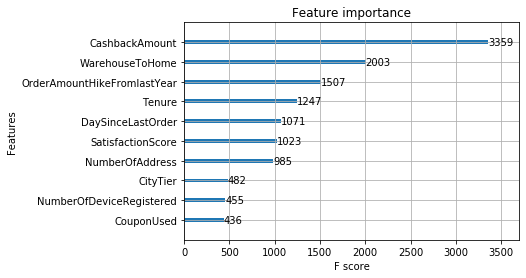

In [154]:
from xgboost import plot_importance
plot_importance(mod18, max_num_features=10)

In [155]:
train_pred_mod18 = mod18.predict(x_train)
test_pred_mod18 = mod18.predict(x_test)

### (g)Classification Report for Tuned XGBoost Model

In [332]:
# training data
print(classification_report(y_train, train_pred_mod18))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [333]:
# testing data
print(classification_report(y_test, test_pred_mod18))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1405
         1.0       0.96      0.89      0.92       284

    accuracy                           0.98      1689
   macro avg       0.97      0.94      0.95      1689
weighted avg       0.97      0.98      0.97      1689



### (h)Confusion Matrix for Tuned XGBoost Model

Text(0.5, 1, 'confusion matrix for tuned XGBoost model on training data')

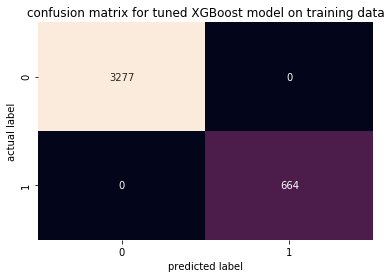

In [169]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod18), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned XGBoost model on training data')

Text(0.5, 1, 'confusion matrix for tuned XGboost model on testing data')

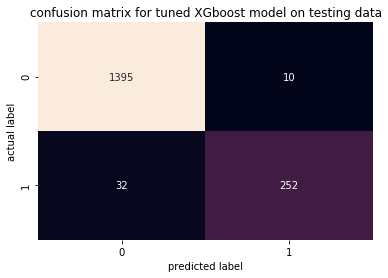

In [170]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod18), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned XGboost model on testing data')

### (i)Model Score for Tuned XGBoost Model

In [336]:
# trianing dataset
mod18.score(x_train , y_train)

1.0

In [337]:
# testing dataset
mod18.score(x_test, y_test)

0.9751332149200711

### (j)ROC-AUC Score for Tuned XGBoost Model

the auc score for mod18 on training dataset is: 1.000


Text(0.5, 1.0, 'ROC curve for tuned XGBoost model on training data')

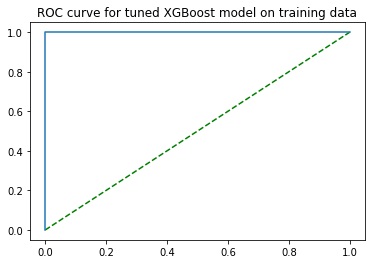

In [156]:
# training dataset
probs35 = mod18.predict_proba(x_train)
probs35 = probs35[:,1]

auc_score_mod18_train = roc_auc_score(y_train, probs35)
print('the auc score for mod18 on training dataset is: %.3f' %auc_score_mod18_train)

train_tpr_mod18, train_fpr_mod18, train_thresholds_mod18 = roc_curve(y_train, probs35)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod18, train_fpr_mod18)
plt.title('ROC curve for tuned XGBoost model on training data')

the auc score for mod18 on testing dataset is: 0.995


Text(0.5, 1.0, 'ROC curve for tuned XGBoost model on testing data')

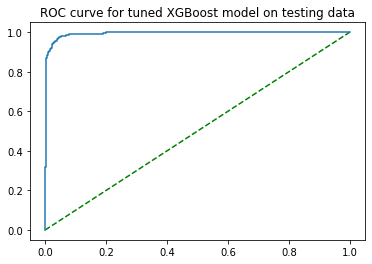

In [157]:
# testing dataset
probs36 = mod18.predict_proba(x_test)
probs36 = probs36[:,1]

auc_score_mod18_test = roc_auc_score(y_test, probs36)
print('the auc score for mod18 on testing dataset is: %.3f' %auc_score_mod18_test)

test_tpr_mod18, test_fpr_mod18, test_thresholds_mod18 = roc_curve(y_test, probs36)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod18, test_fpr_mod18)
plt.title('ROC curve for tuned XGBoost model on testing data')

# 12. Artificial Neural Network Model (scikit-learn)

## (a)Base ANN Model

In [158]:
from sklearn.neural_network import MLPClassifier

mod19 = MLPClassifier(random_state=1, max_iter=1000)
mod19.fit(x_train, y_train)

MLPClassifier(max_iter=1000, random_state=1)

In [159]:
train_pred_mod19 = mod19.predict(x_train)
test_pred_mod19 = mod19.predict(x_test)

### (b)Classification Report for Base ANN Model

In [296]:
# training dataset
print(classification_report(y_train, train_pred_mod19))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [297]:
# testing dataset
print(classification_report(y_test, test_pred_mod19))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1405
         1.0       0.96      0.90      0.93       284

    accuracy                           0.98      1689
   macro avg       0.97      0.95      0.96      1689
weighted avg       0.98      0.98      0.98      1689



### (c)Confusion Matrix for base ANN Model 

Text(0.5, 1, 'confusion matrix for base ANN model on training data')

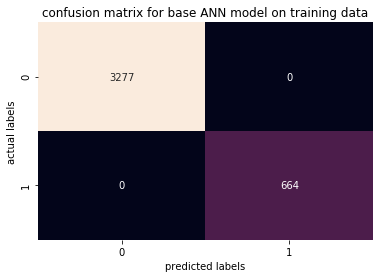

In [173]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod19), annot=True, fmt='d', cbar=False)
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base ANN model on training data')

Text(0.5, 1, 'confusion matrix for base ANN model on testing data')

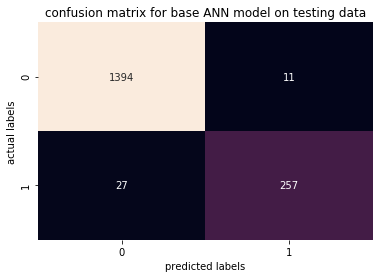

In [174]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod19), annot=True, fmt='d', cbar=False)
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base ANN model on testing data')

### (d)Model Score for base ANN Model

In [300]:
# training dataset
mod19.score(x_train, y_train)

1.0

In [301]:
# testing dataset
mod19.score(x_test, y_test)

0.9775014801657785

### (e)ROC-AUC Score for Base ANN Model

the auc score for mod19 on training dataset is: 1.000


Text(0.5, 1.0, 'ROC curve for base ANN model on training data')

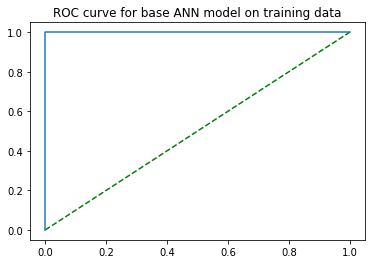

In [160]:
# training dataset
probs37 = mod19.predict_proba(x_train)
probs37 = probs37[:,1]

auc_score_mod19_train = roc_auc_score(y_train, probs37)
print('the auc score for mod19 on training dataset is: %.3f' %auc_score_mod19_train)

train_tpr_mod19, train_fpr_mod19, train_thresholds_mod19 = roc_curve(y_train, probs37)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod19, train_fpr_mod19)
plt.title('ROC curve for base ANN model on training data')

the auc score for mod19 on testing dataset is: 0.994


Text(0.5, 1.0, 'ROC curve for base ANN model on testing data')

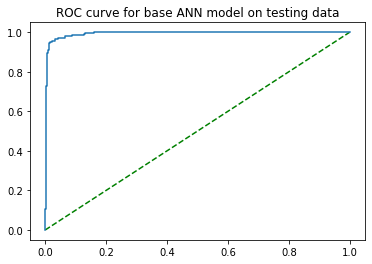

In [161]:
# testing dataset
probs38 = mod19.predict_proba(x_test)
probs38 = probs38[:,1]

auc_score_mod19_test = roc_auc_score(y_test, probs38)
print('the auc score for mod19 on testing dataset is: %.3f' %auc_score_mod19_test)

test_tpr_mod19, test_fpr_mod19, test_thresholds_mod19 = roc_curve(y_test, probs38)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod19, test_fpr_mod19)
plt.title('ROC curve for base ANN model on testing data')

## (f)Tuned ANN Model

In [304]:
from sklearn.model_selection import GridSearchCV

params = {
    'activation': ['logistic', 'relu', 'tanh', 'identity' ],
    'hidden_layer_sizes': [100, 200, 300, (100,100), (200,200), (300,300), (100, 100, 100)],
    'max_iter' : [10000]
    'solver': ['sgd', 'adam', 'lbfgs'],
    #'tol': [0.1,0.5,0.01],
    
}

ann = MLPClassifier(random_state=1)
grid = GridSearchCV(estimator=ann, param_grid=params,scoring='recall', cv=5, verbose=3)

In [305]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=sgd; total time=  11.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=sgd; total time=  12.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=sgd; total time=  13.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=sgd; total time=  11.0s
[CV 5/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=sgd; total time=  11.6s
[CV 1/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=adam; total time=  27.6s
[CV 2/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=adam; total time=  25.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=adam; total time=  25.5s
[CV 4/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=adam; total ti

[CV 1/5] END activation=logistic, hidden_layer_sizes=(300, 300), max_iter=10000, solver=sgd; total time=   3.6s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(300, 300), max_iter=10000, solver=sgd; total time=   2.6s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(300, 300), max_iter=10000, solver=sgd; total time=   2.7s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(300, 300), max_iter=10000, solver=sgd; total time=   2.8s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(300, 300), max_iter=10000, solver=sgd; total time=  16.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(300, 300), max_iter=10000, solver=adam; total time=  12.4s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(300, 300), max_iter=10000, solver=adam; total time=  16.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(300, 300), max_iter=10000, solver=adam; total time=  13.0s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(300, 300), max_iter=10000, solver=adam; total t

[CV 3/5] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=10000, solver=sgd; total time= 1.3min
[CV 4/5] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=10000, solver=sgd; total time= 1.3min
[CV 5/5] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=10000, solver=sgd; total time= 1.3min
[CV 1/5] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=10000, solver=adam; total time=   8.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=10000, solver=adam; total time=   9.1s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=10000, solver=adam; total time=   8.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=10000, solver=adam; total time=   7.5s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=10000, solver=adam; total time=   8.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=10000, solver=lbfgs; total time=   2.3s
[CV 2/5] END activati

[CV 4/5] END activation=tanh, hidden_layer_sizes=200, max_iter=10000, solver=sgd; total time=   4.6s
[CV 5/5] END activation=tanh, hidden_layer_sizes=200, max_iter=10000, solver=sgd; total time=   4.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=200, max_iter=10000, solver=adam; total time=  12.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=200, max_iter=10000, solver=adam; total time=  13.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=200, max_iter=10000, solver=adam; total time=  12.6s
[CV 4/5] END activation=tanh, hidden_layer_sizes=200, max_iter=10000, solver=adam; total time=  12.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=200, max_iter=10000, solver=adam; total time=  12.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=200, max_iter=10000, solver=lbfgs; total time=   1.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=200, max_iter=10000, solver=lbfgs; total time=   1.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=200, max_iter=10000, solver=lbfgs

[CV 1/5] END activation=tanh, hidden_layer_sizes=(100, 100, 100), max_iter=10000, solver=adam; total time=   7.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100, 100, 100), max_iter=10000, solver=adam; total time=   7.6s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100, 100, 100), max_iter=10000, solver=adam; total time=   7.6s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100, 100, 100), max_iter=10000, solver=adam; total time=   7.8s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100, 100, 100), max_iter=10000, solver=adam; total time=   7.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100, 100, 100), max_iter=10000, solver=lbfgs; total time=   2.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100, 100, 100), max_iter=10000, solver=lbfgs; total time=   2.8s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100, 100, 100), max_iter=10000, solver=lbfgs; total time=   2.7s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100, 100, 100), max_iter=10000, sol

[CV 2/5] END activation=identity, hidden_layer_sizes=(200, 200), max_iter=10000, solver=adam; total time=   2.6s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200, 200), max_iter=10000, solver=adam; total time=   2.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200, 200), max_iter=10000, solver=adam; total time=   2.4s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200, 200), max_iter=10000, solver=adam; total time=   1.6s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200, 200), max_iter=10000, solver=lbfgs; total time=   1.8s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200, 200), max_iter=10000, solver=lbfgs; total time=   1.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200, 200), max_iter=10000, solver=lbfgs; total time=   1.6s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200, 200), max_iter=10000, solver=lbfgs; total time=   1.4s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200, 200), max_iter=10000, solver=lbfg

In [306]:
print('the time for algo execution is: {}'.format(end-start))

the time for algo execution is: 8620.798880338669


In [307]:
grid.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (300, 300),
 'max_iter': 10000,
 'solver': 'adam'}

In [308]:
grid.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 300), max_iter=10000,
              random_state=1)

In [162]:
mod20 = MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 300), max_iter=10000,
              random_state=1)
mod20.fit(x_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 300), max_iter=10000,
              random_state=1)

In [163]:
train_pred_mod20 = mod20.predict(x_train)
test_pred_mod20 = mod20.predict(x_test)

### (g)Classification Report for Tuned ANN Model

In [177]:
# training data
print(classification_report(y_train, train_pred_mod20))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [178]:
# testing data
print(classification_report(y_test, test_pred_mod20))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1405
         1.0       0.99      0.95      0.97       284

    accuracy                           0.99      1689
   macro avg       0.99      0.97      0.98      1689
weighted avg       0.99      0.99      0.99      1689



### (h)Confusion Matrix for Tuned ANN Model

Text(0.5, 1, 'confusion matrix for tuned ANN model on training data')

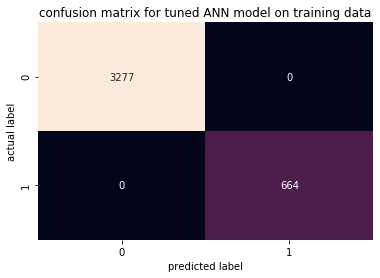

In [179]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod20), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned ANN model on training data')

Text(0.5, 1, 'confusion matrix for tuned ANN model on testing data')

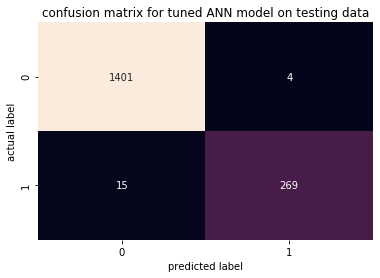

In [180]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod20), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned ANN model on testing data')

### (i)Model Score for Tuned ANN Model

In [315]:
# trianing dataset
mod20.score(x_train , y_train)

1.0

In [316]:
# testing dataset
mod20.score(x_test, y_test)

0.9887507400828893

### (j)ROC-AUC Score for Tuned ANN Model

the auc score for mod20 on training dataset is: 1.000


Text(0.5, 1.0, 'ROC curve for tuned ANN model on training data')

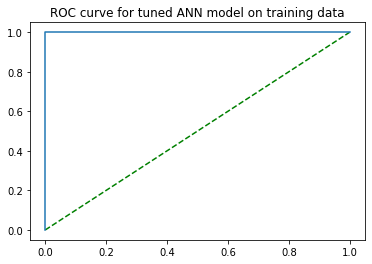

In [164]:
# training dataset
probs39 = mod20.predict_proba(x_train)
probs39 = probs39[:,1]

auc_score_mod20_train = roc_auc_score(y_train, probs39)
print('the auc score for mod20 on training dataset is: %.3f' %auc_score_mod20_train)

train_tpr_mod20, train_fpr_mod20, train_thresholds_mod20 = roc_curve(y_train, probs39)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod20, train_fpr_mod20)
plt.title('ROC curve for tuned ANN model on training data')

the auc score for mod20 on testing dataset is: 0.996


Text(0.5, 1.0, 'ROC curve for tuned ANN model on testing data')

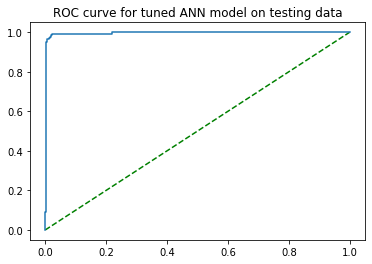

In [165]:
# testing dataset
probs40 = mod20.predict_proba(x_test)
probs40 = probs40[:,1]

auc_score_mod20_test = roc_auc_score(y_test, probs40)
print('the auc score for mod20 on testing dataset is: %.3f' %auc_score_mod20_test)

test_tpr_mod20, test_fpr_mod20, test_thresholds_mod20 = roc_curve(y_test, probs40)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod20, test_fpr_mod20)
plt.title('ROC curve for tuned ANN model on testing data')

# 13.SMOTING

In [166]:
from imblearn.over_sampling import SMOTE

sm = SMOTE (random_state=1)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

In [167]:
print(x_train_res.shape)
print(y_train_res.shape)

(6554, 26)
(6554,)


In [200]:
resampled_data = pd.Series(y_train_res)

In [203]:
resampled_data.value_counts()

1.0    3277
0.0    3277
dtype: int64

## 13.1(a)KNN Model with SMOTED Data

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

mod21 = KNeighborsClassifier(leaf_size=15, n_jobs=-1, n_neighbors=2, weights='distance')
mod21.fit(x_train_res,y_train_res)

KNeighborsClassifier(leaf_size=15, n_jobs=-1, n_neighbors=2, weights='distance')

In [169]:
train_pred_mod21 = mod21.predict(x_train_res)
test_pred_mod21 = mod21.predict(x_test)

### (b)Model Performance for KNN using SMOTED data

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00      3277

    accuracy                           1.00      6554
   macro avg       1.00      1.00      1.00      6554
weighted avg       1.00      1.00      1.00      6554



the model score for KNN on training data using Smote data is 1.000


Text(0.5, 1, 'confusion matrix for KNN Model on training data with SMOTE')

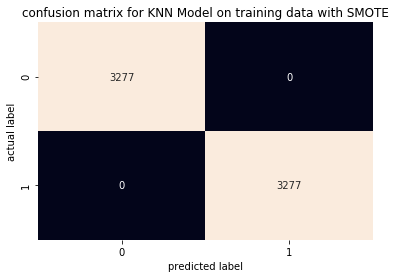

In [170]:
# training data performance
print(classification_report(y_train_res, train_pred_mod21))
print('\n')
print('the model score for KNN on training data using Smote data is %.3f'   %mod21.score(x_train_res, y_train_res))

sns.heatmap(confusion_matrix(y_train_res, train_pred_mod21), annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for KNN Model on training data with SMOTE')

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1405
         1.0       0.90      0.92      0.91       284

    accuracy                           0.97      1689
   macro avg       0.94      0.95      0.94      1689
weighted avg       0.97      0.97      0.97      1689



the model score for KNN on testing dataset using Smote data is 0.968


Text(0.5, 1, 'confusion matrix for KNN Model on testing data with SMOTE')

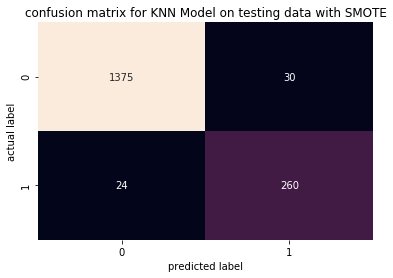

In [171]:
# testing dataset performance
print(classification_report(y_test, test_pred_mod21))
print('\n')
print('the model score for KNN on testing dataset using Smote data is %.3f' %mod21.score(x_test, y_test))

sns.heatmap(confusion_matrix(y_test, test_pred_mod21),cbar=False, annot=True, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for KNN Model on testing data with SMOTE')

## 13.2 (a)XGBoost Model with SMOTED Data

In [188]:
import xgboost as xgb

mod22 = xgb.XGBClassifier(colsample_bytree= 0.7,learning_rate = 0.1, max_depth = 9,
min_child_weight = 2,n_estimators =  1100, subsample=0.7,random_state = 1,
use_label_encoder=False, booster='gbtree', eval_metric='logloss')

mod22.fit(x_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=1100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [189]:
train_pred_mod22 = mod22.predict(x_train_res)
test_pred_mod22 = mod22.predict(x_test)

### (b)Model Performance for XGBoost using SMOTED data

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00      3277

    accuracy                           1.00      6554
   macro avg       1.00      1.00      1.00      6554
weighted avg       1.00      1.00      1.00      6554



the model score for XGBoost on training data using Smote data is 1.000


Text(0.5, 1, 'confusion matrix for XGBoost Model on training data with SMOTE')

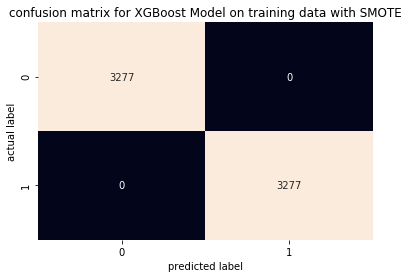

In [190]:
# training data performance
print(classification_report(y_train_res, train_pred_mod22))
print('\n')
print('the model score for XGBoost on training data using Smote data is %.3f'   %mod22.score(x_train_res, y_train_res))

sns.heatmap(confusion_matrix(y_train_res, train_pred_mod22), annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for XGBoost Model on training data with SMOTE')

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1405
         1.0       0.95      0.88      0.92       284

    accuracy                           0.97      1689
   macro avg       0.96      0.94      0.95      1689
weighted avg       0.97      0.97      0.97      1689



the model score for XGBoost on testing dataset using Smote data is 0.973


Text(0.5, 1, 'confusion matrix for XGBoost Model on testning data with SMOTE')

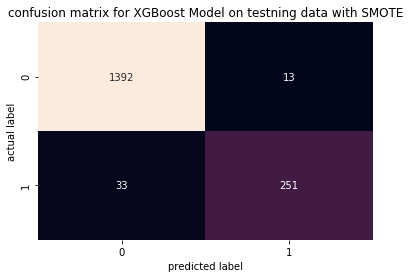

In [191]:
# testing data performance
print(classification_report(y_test, test_pred_mod22))
print('\n')
print('the model score for XGBoost on testing dataset using Smote data is %.3f' %mod22.score(x_test, y_test))

sns.heatmap(confusion_matrix(y_test, test_pred_mod22),cbar=False, annot=True, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for XGBoost Model on testning data with SMOTE')

## 13.3 (a)SVM Model with SMOTED Data

In [188]:
from sklearn import svm

mod24 = svm.SVC(C=10, gamma=0.1, probability=True, tol=0.01, verbose=True, kernel='rbf')
mod24.fit(x_train, y_train)

[LibSVM]

SVC(C=10, gamma=0.1, probability=True, tol=0.01, verbose=True)

In [189]:
train_pred_mod24 = mod24.predict(x_train_res)
test_pred_mod24 = mod24.predict(x_test)

### (b)Model Performance for SVM using SMOTED data

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00      3277

    accuracy                           1.00      6554
   macro avg       1.00      1.00      1.00      6554
weighted avg       1.00      1.00      1.00      6554



the model score for SVM on training data using Smote data is 0.999


Text(0.5, 1, 'confusion matrix for SVM Model on training data with SMOTE')

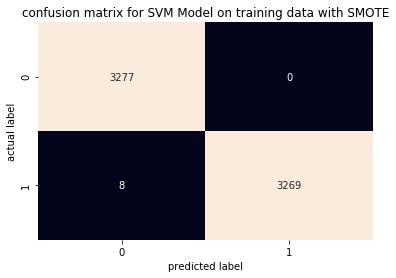

In [192]:
# training data performance
print(classification_report(y_train_res, train_pred_mod24))
print('\n')
print('the model score for SVM on training data using Smote data is %.3f'   %mod24.score(x_train_res, y_train_res))

sns.heatmap(confusion_matrix(y_train_res, train_pred_mod24), annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for SVM Model on training data with SMOTE')

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1405
         1.0       0.97      0.92      0.94       284

    accuracy                           0.98      1689
   macro avg       0.98      0.96      0.97      1689
weighted avg       0.98      0.98      0.98      1689



the model score for SVM on testing dataset using Smote data is 0.982


Text(0.5, 1, 'confusion matrix for SVM Model on training data with SMOTE')

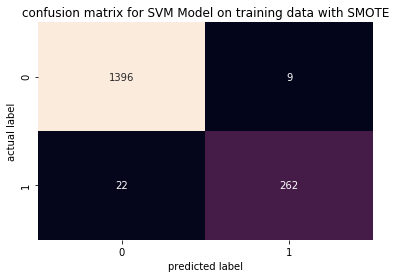

In [193]:
# testing data performance
print(classification_report(y_test, test_pred_mod24))
print('\n')
print('the model score for SVM on testing dataset using Smote data is %.3f' %mod24.score(x_test, y_test))

sns.heatmap(confusion_matrix(y_test, test_pred_mod24),cbar=False, annot=True, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for SVM Model on training data with SMOTE')

## 13.4(a)ANN Model with SMOTED Data

In [192]:
from sklearn.neural_network import MLPClassifier

mod23 =MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 300), max_iter=10000,
              random_state=1)
mod23.fit(x_train_res, y_train_res)

MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 300), max_iter=10000,
              random_state=1)

In [193]:
train_pred_mod23 = mod23.predict(x_train_res)
test_pred_mod23 = mod23.predict(x_test)

### (b)Model Performance for ANN using SMOTED data

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00      3277

    accuracy                           1.00      6554
   macro avg       1.00      1.00      1.00      6554
weighted avg       1.00      1.00      1.00      6554



the model score for ANN on training data using Smote data is 1.000


Text(0.5, 1, 'confusion matrix for ANN Model on training data with SMOTE')

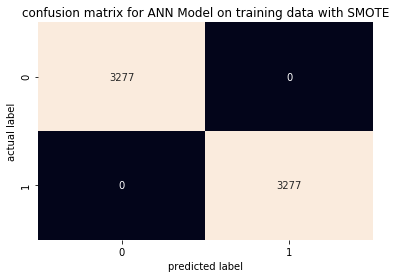

In [194]:
# training data performance
print(classification_report(y_train_res, train_pred_mod23))
print('\n')
print('the model score for ANN on training data using Smote data is %.3f'   %mod23.score(x_train_res, y_train_res))

sns.heatmap(confusion_matrix(y_train_res, train_pred_mod23), annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for ANN Model on training data with SMOTE')

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1405
         1.0       0.96      0.96      0.96       284

    accuracy                           0.99      1689
   macro avg       0.98      0.98      0.98      1689
weighted avg       0.99      0.99      0.99      1689



the model score for ANN on testing dataset using Smote data is 0.987


Text(0.5, 1, 'confusion matrix for ANN Model on testing data with SMOTE')

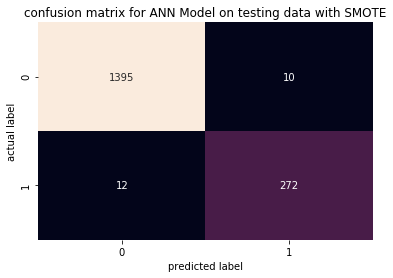

In [195]:
# testing data performance
print(classification_report(y_test, test_pred_mod23))
print('\n')
print('the model score for ANN on testing dataset using Smote data is %.3f' %mod23.score(x_test, y_test))

sns.heatmap(confusion_matrix(y_test, test_pred_mod23),cbar=False, annot=True, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for ANN Model on testing data with SMOTE')